# Installs

In [ ]:
# get_ipython().system('pip install libpysal')

In [ ]:
# # Refine!
# pip install -r requirements.txt

# Pre-process step.  
Population data has been pre-processed before loading.  The data has been downloaded (https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/lowersuperoutputareamidyearpopulationestimates/mid2022revisednov2025tomid2024/sapelsoasyoa20222024.xlsx) and for each year a sum has been created that totals females aged 0-99 and males ages 0-90 (this is a limitation of the data).  These are added in columns labelled Male XXXX, Female XXXX (where XXXX is the year).  A new table was created, which compiled these with LAD 2021 code, LAD 2021 Name, and then for each year Total XXXX, Female XXXX and Male XXXX.  This is then saved as Population.csv within eg: C:\Users\ZZZZZ\Crime\Source\Population.  

In [1]:
!pip install libpysal
!pip install spreg
!pip install geopandas 
!pip install esda
!pip install splot

import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install libpysal
!pip install spreg
!pip install geopandas 
!pip install esda
!pip install splot

import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings('ignore')rom IPython.display import Markdown
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime
import sweetviz as sv
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from libpysal import weights
from esda.moran import Moran
from splot.esda import moran_scatterplot
from spreg import ML_Lag, ML_Error
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import Pipeline

In [2]:
import warnings
warnings.filterwarnings('ignore')rom IPython.display import Markdown
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime
import sweetviz as sv
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from libpysal import weights
from esda.moran import Moran
from splot.esda import moran_scatterplot
from spreg import ML_Lag, ML_Error
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import Pipeline

# from sklearn.cluster import KMeans
# from scipy.sparse import identity as sp_identity
# from scipy.sparse.linalg import spsolve
# import shutil
# import libpysal
# from libpysal.weights import Queen, KNN


## Plot style defaults
Matplotlib and Seaborn palette.  Set default colour maps.

In [3]:
# # Matplotlib defaults 
# plt.rcParams["image.cmap"] = "cividis"  # colour-blind safe, perceptually uniform
# plt.rcParams["axes.prop_cycle"] = plt.cycler(
#     color=plt.cm.cividis(np.linspace(0, 1, 10))
# )

# # Improve readability
# plt.rcParams["axes.facecolor"] = "#FFFFFF"
# plt.rcParams["figure.facecolor"] = "#FFFFFF"
# plt.rcParams["axes.edgecolor"] = "#333333"
# plt.rcParams["grid.color"] = "#D0D0D0"

# # Seaborn defaults 
# sns.set_theme(
#     style="whitegrid",
#     palette="colorblind"   # Tol colour-blind-safe palette
# )


In [4]:
# Universal figure style
plt.rcParams.update({
    "figure.figsize": (7, 5),
    "figure.dpi": 130,
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "#444444",
    "axes.linewidth": 0.6,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "axes.grid": True,
    "grid.color": "#D3D3D3",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.frameon": False,
})

# Accessible continuous colormap (for heatmaps, maps, diagnostics)
plt.rcParams["image.cmap"] = "viridis"  # or "cividis" or "plasma"

# Accessible categorical palette
sns.set_palette("colorblind")  # Tol palette

# Seaborn global style
sns.set_theme(
    style="whitegrid",
    context="notebook",
    font_scale=1.0,
    rc={
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.grid": True,
    }
)

# For GeoPandas maps (soft borders)
map_edge = {"linewidth": 0.2, "edgecolor": "#e6e6e6"}  # use with gdf.plot(**map_edge)


# PARAMETERS

In [5]:
#Root folder of project
BASEROOT = Path(r"C:\Users\cxputte\Crime")
#Job start time
JOB_START_FORMAT = (datetime.now().strftime("%Y%m%d_%H%M%S_"))
#Define outputs file and create it
OUTPUTS_DIRNAME = f"{JOB_START_FORMAT}Outputs"
OUTPUTS_PATH = BASEROOT / OUTPUTS_DIRNAME
OUTPUTS_PATH.mkdir(parents=True, exist_ok=True)
#Data folder
ROOT = Path(r"C:\Users\cxputte\Crime\Source")
CRIME_YEARS_DIRNAME = "Crime_Years"
#LSOA data
LSOA_MSOA_LAD_DIRNAME = "LSOA_MSOA_LAD"
LSOA_MSOA_LAD_FILENAME = "PCD_OA21_LSOA21_MSOA21_LAD_NOV24_UK_LU.csv"
#Population data
POPULATION_DIRNAME = "Population"
POPULATION_FILENAME = "Population.csv"
#Census data
CENSUS_DIRNAME = "Census"
CENSUS_FILENAMES = ["census2021-ts067-lsoa.csv", "census2021-ts044-lsoa.csv"]
#Crime years
CRIME_YEARS = ROOT / CRIME_YEARS_DIRNAME
STREET_DIRNAME = "street_files" 
OUTCOMES_DIRNAME = "outcomes_files"
STREET_DIR = ROOT / CRIME_YEARS_DIRNAME/ STREET_DIRNAME
OUTCOMES_DIR = ROOT / CRIME_YEARS_DIRNAME/ OUTCOMES_DIRNAME
#Filepaths
LSOA_MSOA_LAD_FILEPATH = ROOT/LSOA_MSOA_LAD_DIRNAME/LSOA_MSOA_LAD_FILENAME
POPULATION_FILEPATH = ROOT/POPULATION_DIRNAME/POPULATION_FILENAME
CENSUS_DIR = ROOT / CENSUS_DIRNAME

In [6]:
# Old params:
# CENSUS_FILEPATH = ROOT/CENSUS_DIRNAME/CENSUS_FILENAMES
# TARGET_DIRS = [STREET_DIR, OUTCOMES_DIR] #Only used within the file moving section
# DRY_RUN = False  # set True to preview actions without copying
# STREET_SUFFIX = "-street.csv" #Only used within the file moving section
# OUTCOMES_SUFFIX = "-outcomes.csv"#Only used within the file moving section

# OUTPUTS_PATH= OUTPUTS_PATH / (datetime.now().strftime("%Y%m%d_%H%M%S_"))


## Create LSOA mapping table for ones we are interested in

As the dataset is huge (50,460,858 street level crimes), decision made to look at Hampshire and its closest stat-neighbour Wiltshire as a comparison.  Optional expansion to top 5 statistical neighbours if time allows.

In [7]:
print(OUTPUTS_PATH / (datetime.now().strftime("%Y%m%d_%H%M%S_")))

C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_193303_


In [8]:
# Columns to keep
keep_cols = ["lsoa21cd", "msoa21cd", "ladcd", "lsoa21nm", "msoa21nm", "ladnm", "ladnmw"]
# Load CSV
df_LSOA_MSOA_LAD = pd.read_csv(LSOA_MSOA_LAD_FILEPATH, low_memory=False, encoding="cp1252")

# Keep only required columns
df_LSOA_MSOA_LAD = df_LSOA_MSOA_LAD[keep_cols]

#Drop duplicates
distinct_all = df_LSOA_MSOA_LAD.drop_duplicates()
print(distinct_all)

output_path_pairs = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_distinct_all.csv"
distinct_all.to_csv(output_path_pairs, index=False)
print(f"Saved LSOA code name pairs to: {output_path_pairs}")

          lsoa21cd   msoa21cd      ladcd    lsoa21nm   msoa21nm  \
0              NaN        NaN  S12000033         NaN        NaN   
3              NaN        NaN  S12000034         NaN        NaN   
3555           NaN        NaN        NaN         NaN        NaN   
14676          NaN        NaN  S12000041         NaN        NaN   
16551          NaN        NaN  S12000020         NaN        NaN   
...            ...        ...        ...         ...        ...   
2708364  E01027895  E02005815  E06000065  Selby 007E  Selby 007   
2708519  E01027881  E02005814  E06000065  Selby 006A  Selby 006   
2708559  E01027880  E02005815  E06000065  Selby 007B  Selby 007   
2708606  E01027893  E02005817  E06000065  Selby 009C  Selby 009   
2708901        NaN        NaN  S12000027         NaN        NaN   

                    ladnm ladnmw  
0           Aberdeen City    NaN  
3           Aberdeenshire    NaN  
3555                  NaN    NaN  
14676               Angus    NaN  
16551               

In [9]:
# LAD codes to filter
lad_codes = [
                #0
            "E07000084",                         # Basingstoke and Deane (Hampshire)
            "E07000085",                         # East Hampshire (Hampshire)
            "E07000086",                         # Eastleigh (Hampshire)
            "E07000087",                         # Fareham (Hampshire)
            "E07000088",                         # Gosport (Hampshire)
            "E07000089",                         # Hart (Hampshire)
            "E07000090",                         # Havant (Hampshire)
            "E07000091",                         # New Forest (Hampshire)
            "E07000092",                         # Rushmoor (Hampshire)
            "E07000093",                         # Test Valley (Hampshire)
            "E07000094",                         # Winchester (Hampshire)

            "E06000044",                         # Portsmouth Unitary (Hampshire)
            "E06000045",                         # Southampton Unitary (Hampshire)

                #1
            "E06000054",                          # Wiltshire (Wiltshire)

            "E06000030",                         # Swindon Unitary (Wiltshire)

                #2
            # Unitary authority - disregard "E06000024",                         # North Somerset (Somerset)
                #3
            "E07000078",                         # Cheltenham (Gloucestershire)
            "E07000079",                         # Cotswold (Gloucestershire)
            "E07000080",                         # Forest of Dean (Gloucestershire)
            "E07000081",                         # Gloucester (Gloucestershire)
            "E07000082",                         # Stroud (Gloucestershire)
            "E07000083",                         # Tewkesbury (Gloucestershire)

            "E06000025",                         # South Gloucester Unitary (Gloucestershire)
       
                #4
            "E07000223",                         # Adur (West Sussex)
            "E07000224",                         # Arun (West Sussex)
            "E07000225",                         # Chichester (West Sussex)
            "E07000226",                         # Crawley (West Sussex)
            "E07000227",                         # Horsham (West Sussex)
            "E07000228",                         # Mid Sussex (West Sussex)
            "E07000229"#,                        # Worthing (West Sussex)
#                 #5
#             # Unitary authority - disregard "E06000037",                         # West Berkshire (Berkshire)
#                 #6
#             # Unitary authority - disregard "E06000036",                         # Bracknell Forest (Berkshire)
#                 #7
#             # Unitary authority - disregard "E06000025",                         # South Gloucestershire (Gloucestershire)
#                 #8
#             "E07000218",                         # North Warwickshire (Warwickshire)
#             "E07000219",                         # Nuneaton and Bedworth (Warwickshire)
#             "E07000220",                         # Rugby (Warwickshire)
#             "E07000221",                         # Stratford-on-Avon (Warwickshire)
#             "E07000222",                         # Warwick (Warwickshire)
#                 #9
#             "E07000177",                         # Cherwell (Oxfordshire)
#             "E07000178",                         # Oxford (Oxfordshire)
#             "E07000179",                         # South Oxfordshire (Oxfordshire)
#             "E07000180",                         # Vale of White Horse (Oxfordshire)
#             "E07000181",                         # West Oxfordshire (Oxfordshire)
#                 #10
#             "E07000129",                         # Blaby (Leicestershire)
#             "E07000130",                         # Charnwood (Leicestershire)
#             "E07000131",                         # Harborough (Leicestershire)
#             "E07000132",                         # Hinckley and Bosworth (Leicestershire)
#             "E06000016",                         # Leicester (Leicestershire)
#             "E07000133",                         # Melton (Leicestershire)
#             "E07000134",                         # North West Leicestershire (Leicestershire)
#             "E07000135"                          # Oadby and Wigston (Leicestershire)
 ]

# Load CSV
df_LSOA_MSOA_LAD = pd.read_csv(LSOA_MSOA_LAD_FILEPATH, low_memory=False, encoding="cp1252")
# Check result
print("Initial DataFrame shape:", df_LSOA_MSOA_LAD.shape)

# Keep only required columns
df_LSOA_MSOA_LAD = df_LSOA_MSOA_LAD[keep_cols]

# Filter rows where ladcd is in the specified codes
df_LSOA_MSOA_LAD = df_LSOA_MSOA_LAD[df_LSOA_MSOA_LAD["ladcd"].isin(lad_codes)]

#Distinct list of LSOA codes
valid_lsoa_codes = set(df_LSOA_MSOA_LAD["lsoa21cd"].unique())

# Check result
print("Filtered DataFrame shape:", df_LSOA_MSOA_LAD.shape)

output_path_LML = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_filtered_LSOA_MSOA_LAD.csv"
df_LSOA_MSOA_LAD.to_csv(output_path_LML, index=False)
print(f"Saved filtered LSOA MSOA LAD file to: {output_path_LML}")

Initial DataFrame shape: (2709658, 14)
Filtered DataFrame shape: (202212, 7)
Saved filtered LSOA MSOA LAD file to: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_193320_filtered_LSOA_MSOA_LAD.csv


In [10]:
# Ensure that LSOA were fitlered correctly
unique_lad_codes = df_LSOA_MSOA_LAD["ladcd"].unique().tolist()
unique_lad_names = df_LSOA_MSOA_LAD["ladnm"].unique().tolist()

print("Unique LAD names in filtered data:", unique_lad_names)

# Compare with lad_codes list
missing_codes= set(lad_codes) - set(unique_lad_codes)
extra_codes = set(unique_lad_codes) - set(lad_codes)
print("Missing LAD codes from filter:", missing_codes)
print("Unexpected LAD codes in filtered data:", extra_codes)

# Validate row count per LAD code
print("\nRow count per LAD code:")
print(df_LSOA_MSOA_LAD["ladcd"].value_counts())

# Validate LSOA names sample
print("\nSample LSOA names:")
print(df_LSOA_MSOA_LAD["lsoa21nm"].head().tolist())

Unique LAD names in filtered data: ['Wiltshire', 'South Gloucestershire', 'New Forest', 'Mid Sussex', 'Worthing', 'Horsham', 'Arun', 'Adur', 'Chichester', 'Gloucester', 'Stroud', 'Cotswold', 'Forest of Dean', 'Tewkesbury', 'Cheltenham', 'East Hampshire', 'Hart', 'Rushmoor', 'Winchester', 'Basingstoke and Deane', 'Portsmouth', 'Havant', 'Gosport', 'Fareham', 'Test Valley', 'Crawley', 'Swindon', 'Southampton', 'Eastleigh']
Missing LAD codes from filter: set()
Unexpected LAD codes in filtered data: set()

Row count per LAD code:
ladcd
E06000054    22743
E06000045    14359
E06000025    13620
E07000091    10782
E06000030     9271
E07000084     8712
E07000086     7767
E07000225     7383
E07000228     6723
E07000224     6711
E07000227     6703
E06000044     6539
E07000093     6332
E07000094     6278
E07000078     5753
E07000089     5678
E07000085     5647
E07000081     5375
E07000087     5337
E07000082     5285
E07000079     4602
E07000229     4547
E07000226     4464
E07000090     4301
E07000

## Load and combine census data

In [11]:
# Location of files
p_ts067 = CENSUS_DIR / CENSUS_FILENAMES[0]
p_ts044 = CENSUS_DIR / CENSUS_FILENAMES[1]

# Read files
df_ts067 = pd.read_csv(p_ts067, low_memory=False, encoding="cp1252")
df_ts044 = pd.read_csv(p_ts044, low_memory=False, encoding="cp1252")

key_cols = list(set(df_ts067.columns) & set(df_ts044.columns))

print("Common columns:", key_cols)
print("df_ts067 original shape:", df_ts067.shape)
print("df_ts044 original shape:", df_ts044.shape)

# Normalise headers to avoid stray whitespace/BOM;
df_ts067.columns = [c.strip().replace("\ufeff", "") for c in df_ts067.columns]
df_ts044.columns = [c.strip().replace("\ufeff", "") for c in df_ts044.columns]

# Non-key values
nonkey_067 = [c for c in df_ts067.columns if c not in key_cols]
nonkey_044 = [c for c in df_ts044.columns if c not in key_cols]

df_ts067 = df_ts067[key_cols + nonkey_067]
df_ts044 = df_ts044[key_cols + nonkey_044]

# Merge dataframes into one
df_census = pd.merge(
    df_ts067,
    df_ts044,
    on=key_cols,
    how="outer",
    suffixes=("_ts067", "_ts044")
)

print("df_census original shape:", df_census.shape)
print("Key columns:", key_cols)
print("Sample columns:", df_census.columns.tolist()[:12])

print("Sample df_census:")
print(df_census.head())

Common columns: ['date', 'geography', 'geography code']
df_ts067 original shape: (35672, 11)
df_ts044 original shape: (35672, 12)
df_census original shape: (35672, 20)
Key columns: ['date', 'geography', 'geography code']
Sample columns: ['date', 'geography', 'geography code', 'Highest level of qualification: Total: All usual residents aged 16 years and over', 'Highest level of qualification: No qualifications', 'Highest level of qualification: Level 1 and entry level qualifications', 'Highest level of qualification: Level 2 qualifications', 'Highest level of qualification: Apprenticeship', 'Highest level of qualification: Level 3 qualifications', 'Highest level of qualification: Level 4 qualifications and above', 'Highest level of qualification: Other qualifications', 'Accommodation type: Total: All households']
Sample df_census:
   date  geography geography code  \
0  2021  Adur 001A      E01031349   
1  2021  Adur 001B      E01031350   
2  2021  Adur 001C      E01031351   
3  2021  A

## Filter census to selected LSOAs

In [12]:
# Filter census to LSOAs
df_census = df_census[df_census["geography code"].isin(valid_lsoa_codes)]

print("df_census shape after filtering:", df_census.shape)

output_path_c = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_census_combined.csv"
df_census.to_csv(output_path_c, index=False)
print(f"Saved merged census file to: {output_path_c}")

df_census shape after filtering: (2689, 20)
Saved merged census file to: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_193320_census_combined.csv


## Load population

In [13]:
# Load CSV
df_population = pd.read_csv(POPULATION_FILEPATH, low_memory=False, encoding="cp1252")
print("df_population original shape:", df_population.shape)

df_population original shape: (35672, 28)


In [14]:
# Filter census to LSOAs
df_population = df_population[df_population["LSOA 2021 Code"].isin(valid_lsoa_codes)]
print("df_population shape after filtering:", df_population.shape)

output_path_pf = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_population_filtered.csv"
df_population.to_csv(output_path_pf, index=False)
print(f"Saved fitlered population file to: {output_path_pf}")

df_population shape after filtering: (2689, 28)
Saved fitlered population file to: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_193321_population_filtered.csv


## Merge population and census

In [15]:
df_population.shape

(2689, 28)

In [16]:
df_population.columns

Index(['ï»¿LAD 2021 Code', 'LAD 2021 Name', 'LSOA 2021 Code', 'LSOA 2021 Name',
       'Total 2015', 'Female 2015', 'Male 2015', 'Total 2016', 'Female 2016',
       'Male 2016', 'Total 2017', 'Female 2017', 'Male 2017', 'Total 2018',
       'Female 2018', 'Male 2018', 'Total 2019', 'Female 2019', 'Male 2019',
       'Total 2020', 'Female 2020', 'Male 2020', 'Total 2021', 'Female 2021',
       'Male 2021', 'Total 2022', 'Female 2022', 'Male 2022'],
      dtype='object')

In [17]:
df_census.shape

(2689, 20)

In [18]:
df_census.columns

Index(['date', 'geography', 'geography code',
       'Highest level of qualification: Total: All usual residents aged 16 years and over',
       'Highest level of qualification: No qualifications',
       'Highest level of qualification: Level 1 and entry level qualifications',
       'Highest level of qualification: Level 2 qualifications',
       'Highest level of qualification: Apprenticeship',
       'Highest level of qualification: Level 3 qualifications',
       'Highest level of qualification: Level 4 qualifications and above',
       'Highest level of qualification: Other qualifications',
       'Accommodation type: Total: All households',
       'Accommodation type: Detached', 'Accommodation type: Semi-detached',
       'Accommodation type: Terraced',
       'Accommodation type: In a purpose-built block of flats or tenement',
       'Accommodation type: Part of a converted or shared house, including bedsits',
       'Accommodation type: Part of another converted building, for 

In [19]:
# Columns to bring from population
all_cols = df_population.columns.tolist()

pop_cols = ['Total 2015', 'Total 2016', 'Total 2017', 'Total 2018',
       'Total 2019', 'Total 2020', 'Total 2021', 'Total 2022']

# Normalise join keys (trim, make string to preserve leading zeros) 
df_population['LSOA 2021 Code'] = (df_population['LSOA 2021 Code'].astype(str).str.strip())
df_census['geography code'] = (df_census['geography code'].astype(str).str.strip())

df_population_agg = df_population[['LSOA 2021 Code'] + [c for c in pop_cols if c in df_population.columns]]

# Left join population onto census 
df_census_with_pop = pd.merge(
    df_census,
    df_population_agg,
    left_on='geography code',
    right_on='LSOA 2021 Code',
    how='left',
    validate='one_to_one'  # change to 'one_to_many' if census has duplicates by geography code
)

# Quick validation 
total_rows = len(df_census)
matched_rows = df_census_with_pop[pop_cols].notna().any(axis=1).sum()
print(f"Rows in df_census: {total_rows}")
print(f"Rows with at least one population value matched: {matched_rows}")
missing_keys = df_census.loc[~df_census['geography code'].isin(df_population_agg['LSOA 2021 Code']), 'geography code'].unique()
print(f"Distinct census geography codes with no population match: {len(missing_keys)}")

# Peek at result
display(df_census_with_pop.head())

output_path_cwp = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_census_with_population.csv"
df_census_with_pop.to_csv(output_path_cwp, index=False)
print(f"Saved census with population file to: {output_path_cwp}")

Rows in df_census: 2689
Rows with at least one population value matched: 2689
Distinct census geography codes with no population match: 0


,date,geography,geography code,Highest level of qualification: Total: All usual residents aged 16 years and over,Highest level of qualification: No qualifications,Highest level of qualification: Level 1 and entry level qualifications,Highest level of qualification: Level 2 qualifications,Highest level of qualification: Apprenticeship,Highest level of qualification: Level 3 qualifications,Highest level of qualification: Level 4 qualifications and above,...,Accommodation type: A caravan or other mobile or temporary structure,LSOA 2021 Code,Total 2015,Total 2016,Total 2017,Total 2018,Total 2019,Total 2020,Total 2021,Total 2022
0,2021,Adur 001A,E01031349,1155,209,134,191,96,188,302,...,0,E01031349,1386,1294,1319,1303,1312,1321,1381,1386
1,2021,Adur 001B,E01031350,1069,251,135,162,62,187,246,...,0,E01031350,1358,1240,1258,1263,1296,1283,1329,1358
2,2021,Adur 001C,E01031351,1323,286,153,215,102,234,302,...,0,E01031351,1567,1593,1592,1574,1589,1609,1609,1567
3,2021,Adur 001D,E01031352,1299,297,176,194,105,216,276,...,1,E01031352,1560,1554,1586,1599,1552,1583,1557,1560
4,2021,Adur 001E,E01031370,1207,257,154,219,85,211,247,...,0,E01031370,1507,1476,1487,1507,1524,1513,1509,1507


Saved census with population file to: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_193321_census_with_population.csv


## Alter census data

In [20]:
# Calculate Under 16 population
df_census_with_pop["Under 16 (2021)"] = (
    df_census_with_pop["Total 2021"]
    - df_census_with_pop["Highest level of qualification: Total: All usual residents aged 16 years and over"]
)

# Replace any negative results (from data issues) with 0
df_census_with_pop["Under 16 (2021)"] = df_census_with_pop["Under 16 (2021)"].clip(lower=0)

# Quick validation checks
rows_missing_inputs = df_census_with_pop[["Total 2021", "Highest level of qualification: Total: All usual residents aged 16 years and over"]].isna().any(axis=1).sum()
rows_negative_before_clip = (df_census_with_pop["Total 2021"] - df_census_with_pop["Highest level of qualification: Total: All usual residents aged 16 years and over"] < 0).sum()

print(f"Computed 'Under 16 (2021)' for {df_census_with_pop.shape[0] - rows_missing_inputs} rows/ {df_census_with_pop.shape[0]} rows.")
print(f"Rows with missing input values: {rows_missing_inputs}")
print(f"Rows that would be negative prior to clipping: {rows_negative_before_clip}")

# Preview
display(df_census_with_pop[["geography code", "Total 2021",
                   "Highest level of qualification: Total: All usual residents aged 16 years and over",
                   "Under 16 (2021)"]].head())

# Qualification per 10k rates:
qual_cols = [
    'Highest level of qualification: Total: All usual residents aged 16 years and over',
    'Highest level of qualification: No qualifications',
    'Highest level of qualification: Level 1 and entry level qualifications',
    'Highest level of qualification: Level 2 qualifications',
    'Highest level of qualification: Apprenticeship',
    'Highest level of qualification: Level 3 qualifications',
    'Highest level of qualification: Level 4 qualifications and above',
    'Highest level of qualification: Other qualifications'
]

base_pop_qual = 'Highest level of qualification: Total: All usual residents aged 16 years and over'

for col in qual_cols[1:]:  # skip the first because it's the base
    rate_col = f"{col} (per 10k - 2021)"
    df_census_with_pop[rate_col] = ((df_census_with_pop[col] / df_census_with_pop[base_pop_qual]) * 10000).round(2)

qual_rate_cols = [f"{col} (per 10k - 2021)" for col in qual_cols[1:]]

print("Added qual rate columns:", qual_rate_cols)
display(df_census_with_pop[['geography code'] + qual_rate_cols].head())

# Accomodation per 10k rates:
# Need to convert households to households per 10k, then use other cols to calculate the per 10k rate.
base_pop_accom = "Total 2021"

accom_cols = [
    'Accommodation type: Total: All households',
    'Accommodation type: Detached', 
    'Accommodation type: Semi-detached',
    'Accommodation type: Terraced',
    'Accommodation type: In a purpose-built block of flats or tenement',
    'Accommodation type: Part of a converted or shared house, including bedsits',
    'Accommodation type: Part of another converted building, for example, former school, church or warehouse',
    'Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop',
    'Accommodation type: A caravan or other mobile or temporary structure']

for col in accom_cols:
    rate_col = f"{col} (per 10k - 2021)"
    df_census_with_pop[rate_col] = ((df_census_with_pop[col] / df_census_with_pop[base_pop_accom]) * 10000).round(2)

accom_rate_cols = [f"{col} (per 10k - 2021)" for col in accom_cols]

print("Added accom rate columns:", accom_rate_cols)
display(df_census_with_pop[['geography code'] + accom_rate_cols].head())

# Drop old versions now we have the rates
cols_to_drop = [
       'Highest level of qualification: Total: All usual residents aged 16 years and over',
       'Highest level of qualification: No qualifications',
       'Highest level of qualification: Level 1 and entry level qualifications',
       'Highest level of qualification: Level 2 qualifications',
       'Highest level of qualification: Apprenticeship',
       'Highest level of qualification: Level 3 qualifications',
       'Highest level of qualification: Level 4 qualifications and above',
       'Highest level of qualification: Other qualifications',
       'Accommodation type: Total: All households',
       'Accommodation type: Detached', 'Accommodation type: Semi-detached',
       'Accommodation type: Terraced',
       'Accommodation type: In a purpose-built block of flats or tenement',
       'Accommodation type: Part of a converted or shared house, including bedsits',
       'Accommodation type: Part of another converted building, for example, former school, church or warehouse',
       'Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop',
       'Accommodation type: A caravan or other mobile or temporary structure',
       'LSOA 2021 Code'
]

print("df_census_with_pop before dropping:", df_census_with_pop.shape)
df_census_with_pop.drop(columns=cols_to_drop, inplace=True)
print("df_census_with_pop after dropping:", df_census_with_pop.shape)

output_path_cwpa = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_census_with_population_altered.csv"
df_census_with_pop.to_csv(output_path_cwpa, index=False)
print(f"Saved census with population file to: {output_path_cwpa}")

Computed 'Under 16 (2021)' for 2689 rows/ 2689 rows.
Rows with missing input values: 0
Rows that would be negative prior to clipping: 1


,geography code,Total 2021,Highest level of qualification: Total: All usual residents aged 16 years and over,Under 16 (2021)
0,E01031349,1381,1155,226
1,E01031350,1329,1069,260
2,E01031351,1609,1323,286
3,E01031352,1557,1299,258
4,E01031370,1509,1207,302


Added qual rate columns: ['Highest level of qualification: No qualifications (per 10k - 2021)', 'Highest level of qualification: Level 1 and entry level qualifications (per 10k - 2021)', 'Highest level of qualification: Level 2 qualifications (per 10k - 2021)', 'Highest level of qualification: Apprenticeship (per 10k - 2021)', 'Highest level of qualification: Level 3 qualifications (per 10k - 2021)', 'Highest level of qualification: Level 4 qualifications and above (per 10k - 2021)', 'Highest level of qualification: Other qualifications (per 10k - 2021)']


,geography code,Highest level of qualification: No qualifications (per 10k - 2021),Highest level of qualification: Level 1 and entry level qualifications (per 10k - 2021),Highest level of qualification: Level 2 qualifications (per 10k - 2021),Highest level of qualification: Apprenticeship (per 10k - 2021),Highest level of qualification: Level 3 qualifications (per 10k - 2021),Highest level of qualification: Level 4 qualifications and above (per 10k - 2021),Highest level of qualification: Other qualifications (per 10k - 2021)
0,E01031349,1809.52,1160.17,1653.68,831.17,1627.71,2614.72,303.03
1,E01031350,2347.99,1262.86,1515.43,579.98,1749.30,2301.22,243.22
2,E01031351,2161.75,1156.46,1625.09,770.98,1768.71,2282.69,234.32
3,E01031352,2286.37,1354.89,1493.46,808.31,1662.82,2124.71,269.44
4,E01031370,2129.25,1275.89,1814.42,704.23,1748.14,2046.40,281.69


Added accom rate columns: ['Accommodation type: Total: All households (per 10k - 2021)', 'Accommodation type: Detached (per 10k - 2021)', 'Accommodation type: Semi-detached (per 10k - 2021)', 'Accommodation type: Terraced (per 10k - 2021)', 'Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021)', 'Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021)', 'Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021)', 'Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021)', 'Accommodation type: A caravan or other mobile or temporary structure (per 10k - 2021)']


,geography code,Accommodation type: Total: All households (per 10k - 2021),Accommodation type: Detached (per 10k - 2021),Accommodation type: Semi-detached (per 10k - 2021),Accommodation type: Terraced (per 10k - 2021),Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021),"Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021)","Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021)","Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021)",Accommodation type: A caravan or other mobile or temporary structure (per 10k - 2021)
0,E01031349,4004.34,463.43,2910.93,543.08,36.21,36.21,0.00,14.48,0.00
1,E01031350,3709.56,210.68,2272.39,654.63,278.40,278.40,15.05,0.00,0.00
2,E01031351,4021.13,702.30,2995.65,236.17,37.29,12.43,0.00,37.29,0.00
3,E01031352,4155.43,2087.35,1483.62,173.41,340.40,12.85,6.42,44.96,6.42
4,E01031370,3764.08,271.70,3214.05,178.93,26.51,53.02,6.63,13.25,0.00


df_census_with_pop before dropping: (2689, 46)
df_census_with_pop after dropping: (2689, 28)
Saved census with population file to: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_193321_census_with_population_altered.csv


## Move crime files
Run once to move all objects

In [21]:
# # Validate root exists to avoid accidental creation of a wrong path
# if not ROOT.exists():
#     raise FileNotFoundError(
#         f"Root folder not found: {ROOT}\n"
#         "Check the path spelling and that the drive/user exists."
#     )

# street_target = ROOT / STREET_DIRNAME
# outcomes_target = ROOT / OUTCOMES_DIRNAME

# # Create target folders (parents=True avoids WinError 3 if intermediate dirs are missing)
# street_target.mkdir(parents=True, exist_ok=True)
# outcomes_target.mkdir(parents=True, exist_ok=True)

# def resolve_collision(target_dir: Path, filename: str) -> Path:
#     """Return a non-colliding path by appending _n before the extension."""
#     p = target_dir / filename
#     if not p.exists():
#         return p
#     stem = p.stem
#     suffix = p.suffix
#     n = 1
#     while True:
#         candidate = target_dir / f"{stem}_{n}{suffix}"
#         if not candidate.exists():
#             return candidate
#         n += 1

# def copy_grouped_files():
#     copied = {"street": 0, "outcomes": 0, "skipped": 0}
#     # Search all CSVs in subfolders, skip files already in the target folders
#     for path in ROOT.rglob("*.csv"):
#         if street_target in path.parents or outcomes_target in path.parents:
#             continue
#         name_lower = path.name.lower()

#         if name_lower.endswith(STREET_SUFFIX):
#             target_dir = street_target
#             group = "street"
#         elif name_lower.endswith(OUTCOMES_SUFFIX):
#             target_dir = outcomes_target
#             group = "outcomes"
#         else:
#             copied["skipped"] += 1
#             continue

#         dest = resolve_collision(target_dir, path.name)

#         if DRY_RUN:
#             print(f"[DRY RUN] Copy: {path}  ->  {dest}")
#         else:
#             shutil.copy2(path, dest)
#         copied[group] += 1

#     return copied

# stats = copy_grouped_files()
# print("Completed.")
# print(f"Copied street:   {stats['street']}")
# print(f"Copied outcomes: {stats['outcomes']}")
# print(f"Skipped other:   {stats['skipped']}")

## Add filename column

In [22]:
# # Add a "file name" column (base filename without .csv) to every CSV
# # Processes both central folders: street_files and outcomes_files
# # Safe write: creates a temporary file, then replaces the original

# def add_filename_column(csv_path: Path):
#     # Value to write: yyyy-mm-police-authority-name-suffix (no extension)
#     base = csv_path.stem
#     # Read CSV; low_memory=False avoids dtype inference issues on large files
#     df = pd.read_csv(csv_path, low_memory=False)
#     df["file name"] = base
#     tmp = csv_path.with_suffix(".tmp.csv")
#     df.to_csv(tmp, index=False)
#     tmp.replace(csv_path)

# for d in TARGET_DIRS:
#     if not d.exists():
#         raise FileNotFoundError(f"Folder not found: {d}")
#     for csv_path in d.glob("*.csv"):
#         add_filename_column(csv_path)

## Create crime dataframes

In [23]:
# Folder roots (use Path objects) 

# def read_csv_robust(p: Path) -> pd.DataFrame:
#     """
#     Read a CSV with robust defaults and add a 'file name' column if missing.
#     """
#     try:
#         df = pd.read_csv(p, low_memory=False)
#     except UnicodeDecodeError:
#         df = pd.read_csv(p, low_memory=False, encoding="cp1252")
#     if "file name" not in df.columns:
#         df["file name"] = p.stem
#     return df


In [24]:
def concat_folder_chunks(folder: Path, chunksize: int = 200_000) -> pd.DataFrame:
    """
    Looks for defined folder, safe error if not found.
    Checks for csv files only.
    For each csv, appends file name as new column if not already there.
    Loads all into the dataframe
    """
    if not folder.exists():
        raise FileNotFoundError(f"Folder not found: {folder}")
    csvs = sorted(folder.glob("*.csv"))
    if not csvs:
        return pd.DataFrame()
    frames = []
    for p in csvs:
        for chunk in pd.read_csv(p, chunksize=chunksize, low_memory=False, encoding="cp1252"):
            if "file name" not in chunk.columns:
                chunk["file name"] = p.stem
            frames.append(chunk)
    return pd.concat(frames, ignore_index=True, sort=False)

## Build from CSV files

In [25]:
%%time
def load_and_downcast(path):
    """
    Normalise column names to avoid hidden whitespace issues.
    Downcast integers.
    Downcast floats.
    """   
    df = concat_folder_chunks(path)
    # normalise column names to avoid hidden whitespace issues
    df.columns = df.columns.str.strip()

    # downcast integers
    int_cols = df.select_dtypes(include=["int", "int64", "Int64"]).columns
    df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast="integer")

    # downcast floats
    float_cols = df.select_dtypes(include=["float", "float64"]).columns
    df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast="float")
    return df

df_street_crime   = load_and_downcast(STREET_DIR)
df_outcomes_crime = load_and_downcast(OUTCOMES_DIR)

print("df_street_crime:", df_street_crime.shape, "from", STREET_DIR)
print("df_outcomes_crime:", df_outcomes_crime.shape, "from", OUTCOMES_DIR)


df_street_crime: (50460858, 13) from C:\Users\cxputte\Crime\Source\Crime_Years\street_files
df_outcomes_crime: (36017593, 11) from C:\Users\cxputte\Crime\Source\Crime_Years\outcomes_files
CPU times: total: 5min 29s
Wall time: 8min 51s


## Filter out non-relevant LSOA datafields

In [26]:
# Filter street to LSOAs
df_street_crime = df_street_crime[df_street_crime["LSOA code"].isin(valid_lsoa_codes)]
print("df_street_crime after filtering:", df_street_crime.shape)

# Filter outcomes to LSOAs
df_outcomes_crime = df_outcomes_crime[df_outcomes_crime["LSOA code"].isin(valid_lsoa_codes)]
print("df_outcomes_crime shape after filtering:", df_outcomes_crime.shape)

df_street_crime after filtering: (2750391, 13)
df_outcomes_crime shape after filtering: (1986919, 11)


## Creates fall-backs

In [27]:
# Fall backs to avoid having to re-do large job if rolling back during dev.
output_path_of = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_outcomes_filtered.csv"
df_outcomes_crime.to_csv(output_path_of, index=False)
print(f"Saved filtered outcomes crime file to: {output_path_of}")

output_path_cf = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_street_filtered.csv"
df_street_crime.to_csv(output_path_cf, index=False)
print(f"Saved filtered street crime file to: {output_path_cf}")

Saved filtered outcomes crime file to: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_194228_outcomes_filtered.csv
Saved filtered street crime file to: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_194240_street_filtered.csv


# Short cut to avoid re-merging all the files

In [150]:
#Avoid above steps if re-running by using fall-backs
df_street_crime = pd.read_csv(output_path_cf, low_memory=False, encoding="cp1252")
print("df_street_crime after filtering:", df_street_crime.shape)

df_outcomes_crime = pd.read_csv(output_path_of, low_memory=False, encoding="cp1252")
print("df_outcomes_crime shape after filtering:", df_outcomes_crime.shape)

df_street_crime after filtering: (2750391, 13)
df_outcomes_crime shape after filtering: (1986919, 11)


## Clean & standardise Crime ID in both datasets

In [151]:
for df in (df_street_crime, df_outcomes_crime):
    df["Crime ID"] = (
        df["Crime ID"]
        .astype("string")
        .str.strip()
        .replace({"": pd.NA})
    )

## Move STREET rows with no Crime ID → no‑ref dataframe


In [152]:
# To add back in later
df_street_no_ref = df_street_crime[df_street_crime["Crime ID"].isna()].copy()
df_street_no_ref["Note"] = "No Crime ID"

df_street_crime = df_street_crime[df_street_crime["Crime ID"].notna()].copy()
print("Street (after removing no-ID):", df_street_crime.shape)


Street (after removing no-ID): (2037636, 13)


## Clean OUTCOMES with no Crime ID or no Outcome type - these were duplicating rows

In [153]:
# Data cleansing
df_outcomes_crime["Outcome type"] = (
    df_outcomes_crime["Outcome type"]
    .astype("string")
    .str.strip()
    .replace({"": pd.NA})
)

df_outcomes_crime = df_outcomes_crime.dropna(subset=["Crime ID", "Outcome type"]).copy()
print("Outcome (after removing empty):", df_outcomes_crime.shape)

Outcome (after removing empty): (1986919, 11)


## Aggregate multiple outcomes per Crime ID


In [154]:
%%time
# Removes issue where multiple outcomes bloat stree crime
def join_unique(s):
    vals = pd.unique(s.dropna())
    return ", ".join(vals)

df_outcome_agg = (
    df_outcomes_crime.groupby("Crime ID", as_index=False)
              .agg({"Outcome type": join_unique})
)
print("Outcome aggregated:", df_outcome_agg.shape)


Outcome aggregated: (1820976, 2)
CPU times: total: 3min 29s
Wall time: 3min 33s


## Remove duplicate Crime IDs from STREET


In [155]:
# Duplicate data cleansing
mask_dup_by_id = df_street_crime["Crime ID"].duplicated(keep="first")

df_street_dup = df_street_crime[mask_dup_by_id].copy()
df_street_dup["Note"] = "Duplicate Crime ID — removed"

df_street_no_ref = pd.concat([df_street_no_ref, df_street_dup], ignore_index=True)

df_street_crime = df_street_crime[~mask_dup_by_id].copy()
print("Street (deduplicated):", df_street_crime.shape)


Street (deduplicated): (2036182, 13)


## Build df_crime_combined via LEFT JOIN

In [156]:
# Combine dfs via 1:1 left join (avoids inner filtering)
df_crime_combined = pd.merge(
    df_street_crime,
    df_outcome_agg,
    on="Crime ID",
    how="left",
    validate="one_to_one" #this means it breaks when there isn';t a 1:1 - which I want!
)

df_crime_combined["Outcome type"] = df_crime_combined["Outcome type"].fillna("No outcome matched")
print("Combined:", df_crime_combined.shape)

Combined: (2036182, 14)


## Add back in outcomes that had no matching street crime

In [157]:
# re-attach outcomes with no street crime with available columns
df_unmatched_outcomes = df_outcome_agg[
    ~df_outcome_agg["Crime ID"].isin(df_street_crime["Crime ID"])
].copy()

df_unmatched_outcomes["Note"] = "Outcome with no matching street record"
df_unmatched_outcomes["Crime type"] = "Unknown — no street record"

df_street_no_ref = pd.concat([df_street_no_ref, df_unmatched_outcomes], ignore_index=True)
print("No-ref dataset:", df_street_no_ref.shape)


No-ref dataset: (735661, 15)


## Schema check

In [158]:
# Define the full expected schema is present for df_crime_combined
expected_cols = [
    # core street crime columns
    "Crime ID", "Month", "Reported by", "Falls within", "Longitude", "Latitude",
    "Location", "LSOA code", "LSOA name", "Crime type", "Last outcome category",
    "Context", "file name",
    # outcome column
    "Outcome type",
    # optional note field
    "Note"
]

# Identify missing / unexpected columns
missing_cols = [c for c in expected_cols if c not in df_crime_combined.columns]
extra_cols   = [c for c in df_crime_combined.columns if c not in expected_cols]

print(" SCHEMA VALIDATION ")
print(f"Total columns in df_crime_combined: {len(df_crime_combined.columns)}")

if missing_cols:
    print("\n Missing expected columns:")
    for c in missing_cols:
        print("  -", c)
else:
    print("\n No missing expected columns")

if extra_cols:
    print("\n Unexpected columns found:")
    for c in extra_cols:
        print("  -", c)
else:
    print("\n No unexpected columns")

print("\nFinal column order:")
print(df_crime_combined.columns.tolist())

 SCHEMA VALIDATION 
Total columns in df_crime_combined: 14

 Missing expected columns:
  - Note

 No unexpected columns

Final column order:
['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type', 'Last outcome category', 'Context', 'file name', 'Outcome type']


## UNION: df_crime_combined + df_street_no_ref

In [159]:
# Ensure both DataFrames have the same columns in the same order
union_cols = expected_cols  # from schema block above

# Add any missing columns to df_street_no_ref as empty
for col in union_cols:
    if col not in df_street_no_ref.columns:
        df_street_no_ref[col] = pd.NA

# Reindex to ensure perfect alignment
df_street_no_ref = df_street_no_ref.reindex(columns=union_cols)
df_crime_combined = df_crime_combined.reindex(columns=union_cols)

# Create final union
df_crime_final = pd.concat(
    [df_crime_combined, df_street_no_ref],
    ignore_index=True,
    sort=False
)

print(" FINAL UNION COMPLETE ")
print("df_crime_combined:", df_crime_combined.shape)
print("df_street_no_ref:", df_street_no_ref.shape)
print("df_crime_final:", df_crime_final.shape)

# Save
output_path_final = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_crime_final.csv"
df_crime_final.to_csv(output_path_final, index=False)
print(f"Saved final unified crime dataset to:\n{output_path_final}")


 FINAL UNION COMPLETE 
df_crime_combined: (2036182, 15)
df_street_no_ref: (735661, 15)
df_crime_final: (2771843, 15)
Saved final unified crime dataset to:
C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_202854_crime_final.csv


## Aggregate df_crime_final by Year (from Month), LSOA code - optional easy add for Crime type, Outcome type, counting rows


In [160]:
# Aggregate df_crime_final by Year (from Month), LSOA code, Crime type, Outcome type, counting rows

# Ensure required columns exist and are clean
df_crime_agg = df_crime_final.copy()

# Derive Year from 'Month' (format like '2015-01'); coerce errors to NaT then to year
df_crime_agg["Month"] = pd.to_datetime(df_crime_agg["Month"], format="%Y-%m", errors="coerce")
df_crime_agg["Year"] = df_crime_agg["Month"].dt.year.astype("Int64")

# Standardise Outcome type: fill missing with a label to keep them visible in counts
df_crime_agg["Outcome type"] = df_crime_agg["Outcome type"].fillna("No outcome matched")

# Group and count
group_cols = ["Year", "LSOA code"#, "Crime type", "Outcome type"
             ]
df_crime_agg = (
    df_crime_agg.groupby(group_cols, dropna=False)
      .size()
      .reset_index(name="count")
      .sort_values(group_cols)
      .reset_index(drop=True)
)

# Preview and save
print("Aggregated shape:", df_crime_agg.shape)
display(df_crime_agg.head())

output_path = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_crime_aggregated.csv"
df_crime_agg.to_csv(output_path, index=False)
print(f"Saved aggregated file to: {output_path}")

Aggregated shape: (19892, 3)


,Year,LSOA code,count
0,2015,E01014861,838
1,2015,E01014862,87
2,2015,E01014863,59
3,2015,E01014864,51
4,2015,E01014865,114


Saved aggregated file to: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_202913_crime_aggregated.csv


# Crime rate per 10k

In [161]:
# Crime dataframe 
crime = df_crime_agg.copy()
crime["Year"] = pd.to_numeric(crime["Year"], errors="coerce").astype("Int64")
census = df_census_with_pop.copy()

# Rename population columns BEFORE loop
rename_map = {
    "Total 2015": "Population 2015",
    "Total 2016": "Population 2016",
    "Total 2017": "Population 2017",
    "Total 2018": "Population 2018",
    "Total 2019": "Population 2019",
    "Total 2020": "Population 2020",
    "Total 2021": "Population 2021",
    "Total 2022": "Population 2022",
}
census = census.rename(columns=rename_map)

years = sorted(int(y) for y in crime["Year"].dropna().unique())
years = [yr for yr in years if f"Population {yr}" in census.columns]  # only years we have a denominator for

out = census.copy()

for yr in years:
    # aggregate counts for that year
    cyr = (
        crime.loc[crime["Year"] == yr]
             .groupby("LSOA code", as_index=False)["count"]
             .sum()
             .rename(columns={"count": f"crime_count_{yr}"})
    )

    # ensure the right frame has both columns (even if empty)
    if cyr.empty:
        cyr = pd.DataFrame({"LSOA code": pd.Series(dtype=str),
                            f"crime_count_{yr}": pd.Series(dtype="Int64")})

    # merge
    out = out.merge(
        cyr,
        left_on="geography code",
        right_on="LSOA code",
        how="left",
        validate="one_to_one"
    ).drop(columns=["LSOA code"])

    #  coalesce any suffix variants to the canonical name 
    base = f"crime_count_{yr}"
    # find any columns that match base or its suffixed variants
    candidates = [c for c in out.columns if c == base or c.startswith(base + "_")]

    if len(candidates) == 0:
        # create if still missing
        out[base] = pd.Series(0, index=out.index, dtype="Int64")
    elif len(candidates) == 1:
        # normalise dtype and fill
        out[base] = (
            pd.to_numeric(out[candidates[0]], errors="coerce")
              .fillna(0)
              .astype("Int64")
        )
        if candidates[0] != base:
            out.drop(columns=[candidates[0]], inplace=True)
    else:
        # two columns like _x/_y; prefer right one if exists, else left
        # heuristic: take max after coercion (since one may be NaN)
        vals = None
        for c in candidates:
            series = pd.to_numeric(out[c], errors="coerce")
            vals = series if vals is None else vals.fillna(series)
        out[base] = vals.fillna(0).astype("Int64")
        # drop all candidate columns except the canonical
        out.drop(columns=[c for c in candidates if c != base], inplace=True)

    # denominator (year-matched pop if present, else 2021)
    pop_col = f"Population {yr}" if f"Population {yr}" in out.columns else "Population 2021"

    # rate per 10k (safe numeric)
    out[f"crime_rate_{yr}_per_10k"] = (
        (out[base] / pd.to_numeric(out[pop_col], errors="coerce")) * 10000
    ).replace([np.inf, -np.inf], np.nan).round(2)

print("Added crime count columns:", [c for c in out.columns if c.startswith("crime_count_")])
print("Added crime rate columns:",  [c for c in out.columns if c.startswith("crime_rate_")])

df_census_with_crime_rates = out

output_path = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_census_with_crime_rates.csv"
out.to_csv(output_path, index=False)
print(f"Saved: {output_path}")

Added crime count columns: ['crime_count_2015', 'crime_count_2016', 'crime_count_2017', 'crime_count_2018', 'crime_count_2019', 'crime_count_2020', 'crime_count_2021', 'crime_count_2022']
Added crime rate columns: ['crime_rate_2015_per_10k', 'crime_rate_2016_per_10k', 'crime_rate_2017_per_10k', 'crime_rate_2018_per_10k', 'crime_rate_2019_per_10k', 'crime_rate_2020_per_10k', 'crime_rate_2021_per_10k', 'crime_rate_2022_per_10k']
Saved: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_202913_census_with_crime_rates.csv


## Create dfs tuple
Used to allow for repeatability of common tasks across multiple dfs, eg EDA.  

In [162]:
dfs = {
    "LSOA, MSOA, LAD mappings" :df_LSOA_MSOA_LAD,
    "Census merged with population": df_census_with_pop,
    "Crime agg": df_crime_agg,
    "Census and Crime Rates" : df_census_with_crime_rates
}

## Check dfs


In [163]:
print(dfs.items())

dict_items([('LSOA, MSOA, LAD mappings',           lsoa21cd   msoa21cd      ladcd                    lsoa21nm  \
113799   E01032059  E02006681  E06000054              Wiltshire 023B   
115764   E01014870  E02003113  E06000025  South Gloucestershire 024C   
115769   E01014869  E02003113  E06000025  South Gloucestershire 024B   
115820   E01014869  E02003113  E06000025  South Gloucestershire 024B   
115821   E01014869  E02003113  E06000025  South Gloucestershire 024B   
...            ...        ...        ...                         ...   
2635661  E01022182  E02004615  E07000079               Cotswold 001B   
2635662  E01022182  E02004615  E07000079               Cotswold 001B   
2635896  E01022270  E02004626  E07000080         Forest of Dean 001D   
2635901  E01022270  E02004626  E07000080         Forest of Dean 001D   
2642915  E01022462  E02004667  E07000083             Tewkesbury 002G   

                          msoa21nm                  ladnm ladnmw  
113799               Wiltsh

In [164]:
for name, df in dfs.items():
    num_cols = df.select_dtypes(include=["number"]).columns.tolist()
    print(num_cols)

[]
['date', 'Total 2015', 'Total 2016', 'Total 2017', 'Total 2018', 'Total 2019', 'Total 2020', 'Total 2021', 'Total 2022', 'Under 16 (2021)', 'Highest level of qualification: No qualifications (per 10k - 2021)', 'Highest level of qualification: Level 1 and entry level qualifications (per 10k - 2021)', 'Highest level of qualification: Level 2 qualifications (per 10k - 2021)', 'Highest level of qualification: Apprenticeship (per 10k - 2021)', 'Highest level of qualification: Level 3 qualifications (per 10k - 2021)', 'Highest level of qualification: Level 4 qualifications and above (per 10k - 2021)', 'Highest level of qualification: Other qualifications (per 10k - 2021)', 'Accommodation type: Total: All households (per 10k - 2021)', 'Accommodation type: Detached (per 10k - 2021)', 'Accommodation type: Semi-detached (per 10k - 2021)', 'Accommodation type: Terraced (per 10k - 2021)', 'Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021)', 'Accommodation type: 

## EDA on dfs

### EDA output

In [165]:
md_blocks = []

for name, df in dfs.items():
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    md_blocks.append(f"### {name} *EDA Started:* {timestamp}")

    # EDA: shape, memory, describe, info, numeric summary
    md_blocks.append(f"### {name} dataframe\n**Dataframe shape:** {df.shape}")
    b = df.memory_usage(deep=True).sum()
    MiB = b / (1024 * 1024)
    md_blocks.append(f"Memory usage: {MiB:.2f} MiB")
    desc = df.describe().round(1)
    md_blocks.append("**Describe details:**\n" + desc.to_markdown())
    summary = pd.DataFrame({
        "Non-Null Count": df.notnull().sum(),
        "Dtype": df.dtypes,
        "Null Count": df.isnull().sum()
    })
    summary["% Null"] = (summary["Null Count"] / len(df)).round(4)
    md_blocks.append(f"### {name} dataframe Set — Info\n" + summary.to_markdown())

    # Numeric summary
    num_cols = df.select_dtypes(include=["number"]).columns.tolist()
    if not num_cols:  # True if num_cols is empty
        md_blocks.append(f"### {name} dataframe does not contain numeric fields, numeric sumamry skipped")
    else:
        desc_num = df[num_cols].describe().T
        md_blocks.append(f"### {name} dataframe\nNumeric summary:\n" + desc_num.to_markdown())

    # Head/tail preview
    head = df.head(5).astype(object).where(~df.head(5).isna(), None)
    tail = df.tail(5).astype(object).where(~df.tail(5).isna(), None)

    md_blocks.append(f"### {name} dataframe \n**Head details:**\n{head.to_markdown()}\n**Tail details:**\n{tail.to_markdown()}")

    # Missing values
    na_counts = df.isna().sum()
    total_rows = len(df)
    missing_count = df.isna().any(axis=1).sum()
    missing_summary = (
        pd.DataFrame({"Missing": na_counts, "Dtype": df.dtypes})
        .assign(PercentMissing=lambda d: (d["Missing"] / total_rows).round(4))
        .query("Missing > 0")
        .sort_values("Missing", ascending=False)
    )
    md_blocks.append(
        f"### {name} dataframe \n**Missing values count:** <br>{missing_count}\n"
        f"**Missing values per column (with dtypes):**\n{missing_summary.to_markdown()}"
    )

    # Duplicates
    nowformat = datetime.now().strftime("%Y%m%d_%H%M%S_")

    dup_mask = df.duplicated(keep=False)
    dup_count = dup_mask.sum()
    dup_unique_count = df[dup_mask].drop_duplicates().shape[0]
    dup_per_record = dup_count / dup_unique_count if dup_count != 0 else None
    md_blocks.append(
        f"### {name} dataframe \n**Duplicate Summary:**<br>"
        f"- Duplicate row count: {dup_count}<br>"
        f"- Unique duplicate row count: {dup_unique_count}<br>"
        f"- Duplicates per record: {dup_per_record}"
    )

timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
display(Markdown(f"**EDA on each df**  \nCompleted at: {timestamp}"))

**EDA on each df**  
Completed at: 2026-01-13 20:29:14

In [166]:
display(Markdown('\n\n'.join(md_blocks)))

timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
display(Markdown(f"**EDA on each df**  \nCompleted at: {timestamp}"))

### LSOA, MSOA, LAD mappings *EDA Started:* 2026-01-13 20:29:13

### LSOA, MSOA, LAD mappings dataframe
**Dataframe shape:** (202212, 7)

Memory usage: 77.24 MiB

**Describe details:**
|        | lsoa21cd   | msoa21cd   | ladcd     | lsoa21nm        | msoa21nm    | ladnm     |   ladnmw |
|:-------|:-----------|:-----------|:----------|:----------------|:------------|:----------|---------:|
| count  | 202212     | 202212     | 202212    | 202212          | 202212      | 202212    |        0 |
| unique | 2689       | 530        | 29        | 2689            | 530         | 29        |        0 |
| top    | E01031490  | E02006578  | E06000054 | Chichester 010D | Crawley 004 | Wiltshire |      nan |
| freq   | 1127       | 1800       | 22743     | 1127            | 1800        | 22743     |      nan |

### LSOA, MSOA, LAD mappings dataframe Set — Info
|          |   Non-Null Count | Dtype   |   Null Count |   % Null |
|:---------|-----------------:|:--------|-------------:|---------:|
| lsoa21cd |           202212 | object  |            0 |        0 |
| msoa21cd |           202212 | object  |            0 |        0 |
| ladcd    |           202212 | object  |            0 |        0 |
| lsoa21nm |           202212 | object  |            0 |        0 |
| msoa21nm |           202212 | object  |            0 |        0 |
| ladnm    |           202212 | object  |            0 |        0 |
| ladnmw   |                0 | object  |       202212 |        1 |

### LSOA, MSOA, LAD mappings dataframe does not contain numeric fields, numeric sumamry skipped

### LSOA, MSOA, LAD mappings dataframe 
**Head details:**
|        | lsoa21cd   | msoa21cd   | ladcd     | lsoa21nm                   | msoa21nm                  | ladnm                 | ladnmw   |
|-------:|:-----------|:-----------|:----------|:---------------------------|:--------------------------|:----------------------|:---------|
| 113799 | E01032059  | E02006681  | E06000054 | Wiltshire 023B             | Wiltshire 023             | Wiltshire             |          |
| 115764 | E01014870  | E02003113  | E06000025 | South Gloucestershire 024C | South Gloucestershire 024 | South Gloucestershire |          |
| 115769 | E01014869  | E02003113  | E06000025 | South Gloucestershire 024B | South Gloucestershire 024 | South Gloucestershire |          |
| 115820 | E01014869  | E02003113  | E06000025 | South Gloucestershire 024B | South Gloucestershire 024 | South Gloucestershire |          |
| 115821 | E01014869  | E02003113  | E06000025 | South Gloucestershire 024B | South Gloucestershire 024 | South Gloucestershire |          |
**Tail details:**
|         | lsoa21cd   | msoa21cd   | ladcd     | lsoa21nm            | msoa21nm           | ladnm          | ladnmw   |
|--------:|:-----------|:-----------|:----------|:--------------------|:-------------------|:---------------|:---------|
| 2635661 | E01022182  | E02004615  | E07000079 | Cotswold 001B       | Cotswold 001       | Cotswold       |          |
| 2635662 | E01022182  | E02004615  | E07000079 | Cotswold 001B       | Cotswold 001       | Cotswold       |          |
| 2635896 | E01022270  | E02004626  | E07000080 | Forest of Dean 001D | Forest of Dean 001 | Forest of Dean |          |
| 2635901 | E01022270  | E02004626  | E07000080 | Forest of Dean 001D | Forest of Dean 001 | Forest of Dean |          |
| 2642915 | E01022462  | E02004667  | E07000083 | Tewkesbury 002G     | Tewkesbury 002     | Tewkesbury     |          |

### LSOA, MSOA, LAD mappings dataframe 
**Missing values count:** <br>202212
**Missing values per column (with dtypes):**
|        |   Missing | Dtype   |   PercentMissing |
|:-------|----------:|:--------|-----------------:|
| ladnmw |    202212 | object  |                1 |

### LSOA, MSOA, LAD mappings dataframe 
**Duplicate Summary:**<br>- Duplicate row count: 202212<br>- Unique duplicate row count: 2689<br>- Duplicates per record: 75.19970249163258

### Census merged with population *EDA Started:* 2026-01-13 20:29:14

### Census merged with population dataframe
**Dataframe shape:** (2689, 28)

Memory usage: 0.85 MiB

**Describe details:**
|       |   date |   Total 2015 |   Total 2016 |   Total 2017 |   Total 2018 |   Total 2019 |   Total 2020 |   Total 2021 |   Total 2022 |   Under 16 (2021) |   Highest level of qualification: No qualifications (per 10k - 2021) |   Highest level of qualification: Level 1 and entry level qualifications (per 10k - 2021) |   Highest level of qualification: Level 2 qualifications (per 10k - 2021) |   Highest level of qualification: Apprenticeship (per 10k - 2021) |   Highest level of qualification: Level 3 qualifications (per 10k - 2021) |   Highest level of qualification: Level 4 qualifications and above (per 10k - 2021) |   Highest level of qualification: Other qualifications (per 10k - 2021) |   Accommodation type: Total: All households (per 10k - 2021) |   Accommodation type: Detached (per 10k - 2021) |   Accommodation type: Semi-detached (per 10k - 2021) |   Accommodation type: Terraced (per 10k - 2021) |   Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021) |   Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021) |   Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021) |   Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021) |   Accommodation type: A caravan or other mobile or temporary structure (per 10k - 2021) |
|:------|-------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|------------------:|---------------------------------------------------------------------:|------------------------------------------------------------------------------------------:|--------------------------------------------------------------------------:|------------------------------------------------------------------:|--------------------------------------------------------------------------:|------------------------------------------------------------------------------------:|------------------------------------------------------------------------:|-------------------------------------------------------------:|------------------------------------------------:|-----------------------------------------------------:|------------------------------------------------:|-------------------------------------------------------------------------------------:|----------------------------------------------------------------------------------------------:|---------------------------------------------------------------------------------------------------------------------------:|--------------------------------------------------------------------------------------------------------------------------:|----------------------------------------------------------------------------------------:|
| count |   2689 |       2689   |       2689   |       2689   |       2689   |       2689   |       2689   |       2689   |       2689   |            2689   |                                                               2689   |                                                                                    2689   |                                                                    2689   |                                                            2689   |                                                                    2689   |                                                                              2689   |                                                                  2689   |                                                       2689   |                                          2689   |                                               2689   |                                          2689   |                                                                               2689   |                                                                                        2689   |                                                                                                                     2689   |                                                                                                                    2689   |                                                                                  2689   |
| mean  |   2021 |       1662.7 |       1597.6 |       1609.4 |       1618.3 |       1626.7 |       1633.3 |       1647.6 |       1662.7 |             297.9 |                                                               1548.3 |                                                                                    1030.5 |                                                                    1462.1 |                                                             566   |                                                                    1811.3 |                                                                              3314.7 |                                                                   267.1 |                                                       4222.9 |                                          1228   |                                               1228.5 |                                           952   |                                                                                633.5 |                                                                                          90.8 |                                                                                                                       32.1 |                                                                                                                      31.9 |                                                                                    26.1 |
| std   |      0 |        356   |        314.9 |        317   |        316.2 |        320.5 |        327.7 |        336.3 |        356   |             107.8 |                                                                561.4 |                                                                                     265.5 |                                                                     224.6 |                                                             159.8 |                                                                     396.9 |                                                                               962.7 |                                                                    85.8 |                                                        476   |                                           926.2 |                                                621.6 |                                           678.1 |                                                                                739.6 |                                                                                         198.3 |                                                                                                                       72.3 |                                                                                                                      64.7 |                                                                                    97   |
| min   |   2021 |        981   |        511   |        600   |        715   |        836   |        909   |        987   |        981   |               0   |                                                                266.9 |                                                                                     225.1 |                                                                     532.2 |                                                              42.3 |                                                                     772.6 |                                                                              1195.6 |                                                                    56.3 |                                                       1202.1 |                                             0   |                                                 24.9 |                                             0   |                                                                                  0   |                                                                                           0   |                                                                                                                        0   |                                                                                                                       0   |                                                                                     0   |
| 25%   |   2021 |       1430   |       1416   |       1418   |       1415   |       1413   |       1416   |       1429   |       1430   |             225   |                                                               1127.7 |                                                                                     846.3 |                                                                    1333.3 |                                                             456.9 |                                                                    1599.4 |                                                                              2566.3 |                                                                   211.2 |                                                       3957.9 |                                           366.7 |                                                798   |                                           436.8 |                                                                                126.5 |                                                                                          13.8 |                                                                                                                        0   |                                                                                                                       4.3 |                                                                                     0   |
| 50%   |   2021 |       1593   |       1570   |       1577   |       1578   |       1576   |       1575   |       1585   |       1593   |             283   |                                                               1466.9 |                                                                                    1020.1 |                                                                    1468.5 |                                                             553.5 |                                                                    1766.4 |                                                                              3250.2 |                                                                   260.1 |                                                       4199.1 |                                          1090.8 |                                               1171.9 |                                           797.5 |                                                                                384.6 |                                                                                          35.6 |                                                                                                                        9.3 |                                                                                                                      12.8 |                                                                                     0   |
| 75%   |   2021 |       1815   |       1748   |       1754   |       1760   |       1773   |       1781   |       1795   |       1815   |             349   |                                                               1898.4 |                                                                                    1198.6 |                                                                    1606   |                                                             671.3 |                                                                    1945.7 |                                                                              4001.6 |                                                                   313.9 |                                                       4450.5 |                                          1922.4 |                                               1559.7 |                                          1309.4 |                                                                                835.7 |                                                                                          81   |                                                                                                                       30.6 |                                                                                                                      30.4 |                                                                                     7.8 |
| max   |   2021 |       4655   |       3491   |       4350   |       4360   |       4708   |       5216   |       4811   |       4655   |             883   |                                                               3942.5 |                                                                                    2258.4 |                                                                    3150.8 |                                                            1262.5 |                                                                    6558.1 |                                                                              6677.2 |                                                                  1287.6 |                                                       6294.2 |                                          4591.7 |                                               3836.5 |                                          3708.3 |                                                                               5370.8 |                                                                                        2429.7 |                                                                                                                     1057.2 |                                                                                                                    1142.2 |                                                                                  1399.8 |

### Census merged with population dataframe Set — Info
|                                                                                                                          |   Non-Null Count | Dtype   |   Null Count |   % Null |
|:-------------------------------------------------------------------------------------------------------------------------|-----------------:|:--------|-------------:|---------:|
| date                                                                                                                     |             2689 | int64   |            0 |        0 |
| geography                                                                                                                |             2689 | object  |            0 |        0 |
| geography code                                                                                                           |             2689 | object  |            0 |        0 |
| Total 2015                                                                                                               |             2689 | int64   |            0 |        0 |
| Total 2016                                                                                                               |             2689 | int64   |            0 |        0 |
| Total 2017                                                                                                               |             2689 | int64   |            0 |        0 |
| Total 2018                                                                                                               |             2689 | int64   |            0 |        0 |
| Total 2019                                                                                                               |             2689 | int64   |            0 |        0 |
| Total 2020                                                                                                               |             2689 | int64   |            0 |        0 |
| Total 2021                                                                                                               |             2689 | int64   |            0 |        0 |
| Total 2022                                                                                                               |             2689 | int64   |            0 |        0 |
| Under 16 (2021)                                                                                                          |             2689 | int64   |            0 |        0 |
| Highest level of qualification: No qualifications (per 10k - 2021)                                                       |             2689 | float64 |            0 |        0 |
| Highest level of qualification: Level 1 and entry level qualifications (per 10k - 2021)                                  |             2689 | float64 |            0 |        0 |
| Highest level of qualification: Level 2 qualifications (per 10k - 2021)                                                  |             2689 | float64 |            0 |        0 |
| Highest level of qualification: Apprenticeship (per 10k - 2021)                                                          |             2689 | float64 |            0 |        0 |
| Highest level of qualification: Level 3 qualifications (per 10k - 2021)                                                  |             2689 | float64 |            0 |        0 |
| Highest level of qualification: Level 4 qualifications and above (per 10k - 2021)                                        |             2689 | float64 |            0 |        0 |
| Highest level of qualification: Other qualifications (per 10k - 2021)                                                    |             2689 | float64 |            0 |        0 |
| Accommodation type: Total: All households (per 10k - 2021)                                                               |             2689 | float64 |            0 |        0 |
| Accommodation type: Detached (per 10k - 2021)                                                                            |             2689 | float64 |            0 |        0 |
| Accommodation type: Semi-detached (per 10k - 2021)                                                                       |             2689 | float64 |            0 |        0 |
| Accommodation type: Terraced (per 10k - 2021)                                                                            |             2689 | float64 |            0 |        0 |
| Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021)                                       |             2689 | float64 |            0 |        0 |
| Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021)                              |             2689 | float64 |            0 |        0 |
| Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021) |             2689 | float64 |            0 |        0 |
| Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021)  |             2689 | float64 |            0 |        0 |
| Accommodation type: A caravan or other mobile or temporary structure (per 10k - 2021)                                    |             2689 | float64 |            0 |        0 |

### Census merged with population dataframe
Numeric summary:
|                                                                                                                          |   count |      mean |      std |     min |     25% |     50% |     75% |     max |
|:-------------------------------------------------------------------------------------------------------------------------|--------:|----------:|---------:|--------:|--------:|--------:|--------:|--------:|
| date                                                                                                                     |    2689 | 2021      |   0      | 2021    | 2021    | 2021    | 2021    | 2021    |
| Total 2015                                                                                                               |    2689 | 1662.66   | 355.965  |  981    | 1430    | 1593    | 1815    | 4655    |
| Total 2016                                                                                                               |    2689 | 1597.61   | 314.939  |  511    | 1416    | 1570    | 1748    | 3491    |
| Total 2017                                                                                                               |    2689 | 1609.42   | 317.015  |  600    | 1418    | 1577    | 1754    | 4350    |
| Total 2018                                                                                                               |    2689 | 1618.33   | 316.196  |  715    | 1415    | 1578    | 1760    | 4360    |
| Total 2019                                                                                                               |    2689 | 1626.67   | 320.48   |  836    | 1413    | 1576    | 1773    | 4708    |
| Total 2020                                                                                                               |    2689 | 1633.27   | 327.696  |  909    | 1416    | 1575    | 1781    | 5216    |
| Total 2021                                                                                                               |    2689 | 1647.57   | 336.286  |  987    | 1429    | 1585    | 1795    | 4811    |
| Total 2022                                                                                                               |    2689 | 1662.66   | 355.965  |  981    | 1430    | 1593    | 1815    | 4655    |
| Under 16 (2021)                                                                                                          |    2689 |  297.874  | 107.769  |    0    |  225    |  283    |  349    |  883    |
| Highest level of qualification: No qualifications (per 10k - 2021)                                                       |    2689 | 1548.29   | 561.448  |  266.88 | 1127.66 | 1466.89 | 1898.37 | 3942.46 |
| Highest level of qualification: Level 1 and entry level qualifications (per 10k - 2021)                                  |    2689 | 1030.52   | 265.48   |  225.13 |  846.27 | 1020.11 | 1198.56 | 2258.39 |
| Highest level of qualification: Level 2 qualifications (per 10k - 2021)                                                  |    2689 | 1462.05   | 224.594  |  532.21 | 1333.33 | 1468.53 | 1606.01 | 3150.83 |
| Highest level of qualification: Apprenticeship (per 10k - 2021)                                                          |    2689 |  566.038  | 159.836  |   42.33 |  456.93 |  553.51 |  671.34 | 1262.53 |
| Highest level of qualification: Level 3 qualifications (per 10k - 2021)                                                  |    2689 | 1811.31   | 396.945  |  772.58 | 1599.43 | 1766.36 | 1945.7  | 6558.08 |
| Highest level of qualification: Level 4 qualifications and above (per 10k - 2021)                                        |    2689 | 3314.71   | 962.698  | 1195.65 | 2566.31 | 3250.24 | 4001.55 | 6677.25 |
| Highest level of qualification: Other qualifications (per 10k - 2021)                                                    |    2689 |  267.079  |  85.7878 |   56.29 |  211.22 |  260.12 |  313.9  | 1287.64 |
| Accommodation type: Total: All households (per 10k - 2021)                                                               |    2689 | 4222.87   | 475.961  | 1202.06 | 3957.92 | 4199.06 | 4450.51 | 6294.16 |
| Accommodation type: Detached (per 10k - 2021)                                                                            |    2689 | 1228.02   | 926.199  |    0    |  366.67 | 1090.79 | 1922.44 | 4591.72 |
| Accommodation type: Semi-detached (per 10k - 2021)                                                                       |    2689 | 1228.53   | 621.606  |   24.94 |  798.02 | 1171.88 | 1559.69 | 3836.48 |
| Accommodation type: Terraced (per 10k - 2021)                                                                            |    2689 |  951.981  | 678.061  |    0    |  436.75 |  797.52 | 1309.44 | 3708.27 |
| Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021)                                       |    2689 |  633.494  | 739.595  |    0    |  126.48 |  384.62 |  835.71 | 5370.8  |
| Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021)                              |    2689 |   90.7527 | 198.308  |    0    |   13.81 |   35.64 |   81.05 | 2429.7  |
| Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021) |    2689 |   32.0583 |  72.3094 |    0    |    0    |    9.28 |   30.64 | 1057.17 |
| Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021)  |    2689 |   31.9387 |  64.7143 |    0    |    4.29 |   12.76 |   30.4  | 1142.15 |
| Accommodation type: A caravan or other mobile or temporary structure (per 10k - 2021)                                    |    2689 |   26.0992 |  97.0343 |    0    |    0    |    0    |    7.76 | 1399.82 |

### Census merged with population dataframe 
**Head details:**
|    |   date | geography   | geography code   |   Total 2015 |   Total 2016 |   Total 2017 |   Total 2018 |   Total 2019 |   Total 2020 |   Total 2021 |   Total 2022 |   Under 16 (2021) |   Highest level of qualification: No qualifications (per 10k - 2021) |   Highest level of qualification: Level 1 and entry level qualifications (per 10k - 2021) |   Highest level of qualification: Level 2 qualifications (per 10k - 2021) |   Highest level of qualification: Apprenticeship (per 10k - 2021) |   Highest level of qualification: Level 3 qualifications (per 10k - 2021) |   Highest level of qualification: Level 4 qualifications and above (per 10k - 2021) |   Highest level of qualification: Other qualifications (per 10k - 2021) |   Accommodation type: Total: All households (per 10k - 2021) |   Accommodation type: Detached (per 10k - 2021) |   Accommodation type: Semi-detached (per 10k - 2021) |   Accommodation type: Terraced (per 10k - 2021) |   Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021) |   Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021) |   Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021) |   Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021) |   Accommodation type: A caravan or other mobile or temporary structure (per 10k - 2021) |
|---:|-------:|:------------|:-----------------|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|------------------:|---------------------------------------------------------------------:|------------------------------------------------------------------------------------------:|--------------------------------------------------------------------------:|------------------------------------------------------------------:|--------------------------------------------------------------------------:|------------------------------------------------------------------------------------:|------------------------------------------------------------------------:|-------------------------------------------------------------:|------------------------------------------------:|-----------------------------------------------------:|------------------------------------------------:|-------------------------------------------------------------------------------------:|----------------------------------------------------------------------------------------------:|---------------------------------------------------------------------------------------------------------------------------:|--------------------------------------------------------------------------------------------------------------------------:|----------------------------------------------------------------------------------------:|
|  0 |   2021 | Adur 001A   | E01031349        |         1386 |         1294 |         1319 |         1303 |         1312 |         1321 |         1381 |         1386 |               226 |                                                              1809.52 |                                                                                   1160.17 |                                                                   1653.68 |                                                            831.17 |                                                                   1627.71 |                                                                             2614.72 |                                                                  303.03 |                                                      4004.34 |                                          463.43 |                                              2910.93 |                                          543.08 |                                                                                36.21 |                                                                                         36.21 |                                                                                                                       0    |                                                                                                                     14.48 |                                                                                    0    |
|  1 |   2021 | Adur 001B   | E01031350        |         1358 |         1240 |         1258 |         1263 |         1296 |         1283 |         1329 |         1358 |               260 |                                                              2347.99 |                                                                                   1262.86 |                                                                   1515.43 |                                                            579.98 |                                                                   1749.3  |                                                                             2301.22 |                                                                  243.22 |                                                      3709.56 |                                          210.68 |                                              2272.39 |                                          654.63 |                                                                               278.4  |                                                                                        278.4  |                                                                                                                      15.05 |                                                                                                                      0    |                                                                                    0    |
|  2 |   2021 | Adur 001C   | E01031351        |         1567 |         1593 |         1592 |         1574 |         1589 |         1609 |         1609 |         1567 |               286 |                                                              2161.75 |                                                                                   1156.46 |                                                                   1625.09 |                                                            770.98 |                                                                   1768.71 |                                                                             2282.69 |                                                                  234.32 |                                                      4021.13 |                                          702.3  |                                              2995.65 |                                          236.17 |                                                                                37.29 |                                                                                         12.43 |                                                                                                                       0    |                                                                                                                     37.29 |                                                                                    0    |
|  3 |   2021 | Adur 001D   | E01031352        |         1560 |         1554 |         1586 |         1599 |         1552 |         1583 |         1557 |         1560 |               258 |                                                              2286.37 |                                                                                   1354.89 |                                                                   1493.46 |                                                            808.31 |                                                                   1662.82 |                                                                             2124.71 |                                                                  269.44 |                                                      4155.43 |                                         2087.35 |                                              1483.62 |                                          173.41 |                                                                               340.4  |                                                                                         12.85 |                                                                                                                       6.42 |                                                                                                                     44.96 |                                                                                    6.42 |
|  4 |   2021 | Adur 001E   | E01031370        |         1507 |         1476 |         1487 |         1507 |         1524 |         1513 |         1509 |         1507 |               302 |                                                              2129.25 |                                                                                   1275.89 |                                                                   1814.42 |                                                            704.23 |                                                                   1748.14 |                                                                             2046.4  |                                                                  281.69 |                                                      3764.08 |                                          271.7  |                                              3214.05 |                                          178.93 |                                                                                26.51 |                                                                                         53.02 |                                                                                                                       6.63 |                                                                                                                     13.25 |                                                                                    0    |
**Tail details:**
|      |   date | geography     | geography code   |   Total 2015 |   Total 2016 |   Total 2017 |   Total 2018 |   Total 2019 |   Total 2020 |   Total 2021 |   Total 2022 |   Under 16 (2021) |   Highest level of qualification: No qualifications (per 10k - 2021) |   Highest level of qualification: Level 1 and entry level qualifications (per 10k - 2021) |   Highest level of qualification: Level 2 qualifications (per 10k - 2021) |   Highest level of qualification: Apprenticeship (per 10k - 2021) |   Highest level of qualification: Level 3 qualifications (per 10k - 2021) |   Highest level of qualification: Level 4 qualifications and above (per 10k - 2021) |   Highest level of qualification: Other qualifications (per 10k - 2021) |   Accommodation type: Total: All households (per 10k - 2021) |   Accommodation type: Detached (per 10k - 2021) |   Accommodation type: Semi-detached (per 10k - 2021) |   Accommodation type: Terraced (per 10k - 2021) |   Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021) |   Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021) |   Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021) |   Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021) |   Accommodation type: A caravan or other mobile or temporary structure (per 10k - 2021) |
|-----:|-------:|:--------------|:-----------------|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|------------------:|---------------------------------------------------------------------:|------------------------------------------------------------------------------------------:|--------------------------------------------------------------------------:|------------------------------------------------------------------:|--------------------------------------------------------------------------:|------------------------------------------------------------------------------------:|------------------------------------------------------------------------:|-------------------------------------------------------------:|------------------------------------------------:|-----------------------------------------------------:|------------------------------------------------:|-------------------------------------------------------------------------------------:|----------------------------------------------------------------------------------------------:|---------------------------------------------------------------------------------------------------------------------------:|--------------------------------------------------------------------------------------------------------------------------:|----------------------------------------------------------------------------------------:|
| 2684 |   2021 | Worthing 013A | E01031802        |         1675 |         1635 |         1636 |         1620 |         1640 |         1656 |         1644 |         1675 |               142 |                                                              2130.49 |                                                                                   1238.35 |                                                                   1511.32 |                                                            645.81 |                                                                   1431.42 |                                                                             2609.85 |                                                                  432.76 |                                                      5310.22 |                                         3071.78 |                                               541.36 |                                          371.05 |                                                                              1204.38 |                                                                                         66.91 |                                                                                                                       6.08 |                                                                                                                     48.66 |                                                                                       0 |
| 2685 |   2021 | Worthing 013B | E01031803        |         1569 |         1524 |         1506 |         1515 |         1538 |         1524 |         1565 |         1569 |               208 |                                                              1098.01 |                                                                                    766.4  |                                                                   1473.84 |                                                            582.17 |                                                                   1849.67 |                                                                             3964.63 |                                                                  265.29 |                                                      4178.91 |                                         3092.65 |                                               690.1  |                                           70.29 |                                                                               255.59 |                                                                                         44.73 |                                                                                                                      12.78 |                                                                                                                     12.78 |                                                                                       0 |
| 2686 |   2021 | Worthing 013C | E01031804        |         1754 |         1743 |         1748 |         1716 |         1731 |         1686 |         1760 |         1754 |               277 |                                                              1867.84 |                                                                                    964.26 |                                                                   1577.88 |                                                            559.68 |                                                                   1469.99 |                                                                             3290.63 |                                                                  269.72 |                                                      4193.18 |                                         2664.77 |                                               818.18 |                                           85.23 |                                                                               426.14 |                                                                                        198.86 |                                                                                                                       0    |                                                                                                                      0    |                                                                                       0 |
| 2687 |   2021 | Worthing 013D | E01031805        |         1651 |         1648 |         1602 |         1555 |         1590 |         1638 |         1660 |         1651 |               193 |                                                              1670.07 |                                                                                    947.51 |                                                                   1574.64 |                                                            545.33 |                                                                   1772.32 |                                                                             3210.63 |                                                                  279.48 |                                                      4951.81 |                                         2602.41 |                                               807.23 |                                          216.87 |                                                                              1144.58 |                                                                                        114.46 |                                                                                                                      12.05 |                                                                                                                     54.22 |                                                                                       0 |
| 2688 |   2021 | Worthing 013E | E01031806        |         1775 |         1697 |         1687 |         1725 |         1707 |         1741 |         1783 |         1775 |               350 |                                                              1486.39 |                                                                                   1158.41 |                                                                   1912.07 |                                                            537.33 |                                                                   1946.96 |                                                                             2651.78 |                                                                  307.05 |                                                      4212    |                                          280.43 |                                              1559.17 |                                         1160.96 |                                                                               942.23 |                                                                                         95.34 |                                                                                                                      11.22 |                                                                                                                    162.65 |                                                                                       0 |

### Census merged with population dataframe 
**Missing values count:** <br>0
**Missing values per column (with dtypes):**
| Missing   | Dtype   | PercentMissing   |
|-----------|---------|------------------|

### Census merged with population dataframe 
**Duplicate Summary:**<br>- Duplicate row count: 0<br>- Unique duplicate row count: 0<br>- Duplicates per record: None

### Crime agg *EDA Started:* 2026-01-13 20:29:14

### Crime agg dataframe
**Dataframe shape:** (19892, 3)

Memory usage: 1.42 MiB

**Describe details:**
|       |    Year |   count |
|:------|--------:|--------:|
| count | 19891   | 19892   |
| mean  |  2018.5 |   139.3 |
| std   |     2.3 |   218.7 |
| min   |  2015   |     1   |
| 25%   |  2017   |    62   |
| 50%   |  2019   |    99   |
| 75%   |  2021   |   161   |
| max   |  2022   | 21452   |

### Crime agg dataframe Set — Info
|           |   Non-Null Count | Dtype   |   Null Count |   % Null |
|:----------|-----------------:|:--------|-------------:|---------:|
| Year      |            19891 | Int64   |            1 |   0.0001 |
| LSOA code |            19891 | object  |            1 |   0.0001 |
| count     |            19892 | int64   |            0 |   0      |

### Crime agg dataframe
Numeric summary:
|       |   count |     mean |       std |   min |   25% |   50% |   75% |   max |
|:------|--------:|---------:|----------:|------:|------:|------:|------:|------:|
| Year  |   19891 | 2018.53  |   2.30424 |  2015 |  2017 |  2019 |  2021 |  2022 |
| count |   19892 |  139.345 | 218.693   |     1 |    62 |    99 |   161 | 21452 |

### Crime agg dataframe 
**Head details:**
|    |   Year | LSOA code   |   count |
|---:|-------:|:------------|--------:|
|  0 |   2015 | E01014861   |     838 |
|  1 |   2015 | E01014862   |      87 |
|  2 |   2015 | E01014863   |      59 |
|  3 |   2015 | E01014864   |      51 |
|  4 |   2015 | E01014865   |     114 |
**Tail details:**
|       |   Year | LSOA code   |   count |
|------:|-------:|:------------|--------:|
| 19887 |   2022 | E01035458   |       3 |
| 19888 |   2022 | E01035460   |       2 |
| 19889 |   2022 | E01035461   |       1 |
| 19890 |   2022 | E01035462   |       5 |
| 19891 |        |             |   21452 |

### Crime agg dataframe 
**Missing values count:** <br>1
**Missing values per column (with dtypes):**
|           |   Missing | Dtype   |   PercentMissing |
|:----------|----------:|:--------|-----------------:|
| Year      |         1 | Int64   |           0.0001 |
| LSOA code |         1 | object  |           0.0001 |

### Crime agg dataframe 
**Duplicate Summary:**<br>- Duplicate row count: 0<br>- Unique duplicate row count: 0<br>- Duplicates per record: None

### Census and Crime Rates *EDA Started:* 2026-01-13 20:29:14

### Census and Crime Rates dataframe
**Dataframe shape:** (2689, 44)

Memory usage: 1.22 MiB

**Describe details:**
|       |   date |   Population 2015 |   Population 2016 |   Population 2017 |   Population 2018 |   Population 2019 |   Population 2020 |   Population 2021 |   Population 2022 |   Under 16 (2021) |   Highest level of qualification: No qualifications (per 10k - 2021) |   Highest level of qualification: Level 1 and entry level qualifications (per 10k - 2021) |   Highest level of qualification: Level 2 qualifications (per 10k - 2021) |   Highest level of qualification: Apprenticeship (per 10k - 2021) |   Highest level of qualification: Level 3 qualifications (per 10k - 2021) |   Highest level of qualification: Level 4 qualifications and above (per 10k - 2021) |   Highest level of qualification: Other qualifications (per 10k - 2021) |   Accommodation type: Total: All households (per 10k - 2021) |   Accommodation type: Detached (per 10k - 2021) |   Accommodation type: Semi-detached (per 10k - 2021) |   Accommodation type: Terraced (per 10k - 2021) |   Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021) |   Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021) |   Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021) |   Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021) |   Accommodation type: A caravan or other mobile or temporary structure (per 10k - 2021) |   crime_count_2015 |   crime_rate_2015_per_10k |   crime_count_2016 |   crime_rate_2016_per_10k |   crime_count_2017 |   crime_rate_2017_per_10k |   crime_count_2018 |   crime_rate_2018_per_10k |   crime_count_2019 |   crime_rate_2019_per_10k |   crime_count_2020 |   crime_rate_2020_per_10k |   crime_count_2021 |   crime_rate_2021_per_10k |   crime_count_2022 |   crime_rate_2022_per_10k |
|:------|-------:|------------------:|------------------:|------------------:|------------------:|------------------:|------------------:|------------------:|------------------:|------------------:|---------------------------------------------------------------------:|------------------------------------------------------------------------------------------:|--------------------------------------------------------------------------:|------------------------------------------------------------------:|--------------------------------------------------------------------------:|------------------------------------------------------------------------------------:|------------------------------------------------------------------------:|-------------------------------------------------------------:|------------------------------------------------:|-----------------------------------------------------:|------------------------------------------------:|-------------------------------------------------------------------------------------:|----------------------------------------------------------------------------------------------:|---------------------------------------------------------------------------------------------------------------------------:|--------------------------------------------------------------------------------------------------------------------------:|----------------------------------------------------------------------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|
| count |   2689 |            2689   |            2689   |            2689   |            2689   |            2689   |            2689   |            2689   |            2689   |            2689   |                                                               2689   |                                                                                    2689   |                                                                    2689   |                                                            2689   |                                                                    2689   |                                                                              2689   |                                                                  2689   |                                                       2689   |                                          2689   |                                               2689   |                                          2689   |                                                                               2689   |                                                                                        2689   |                                                                                                                     2689   |                                                                                                                    2689   |                                                                                  2689   |             2689   |                    2689   |             2689   |                    2689   |             2689   |                    2689   |             2689   |                    2689   |             2689   |                    2689   |             2689   |                    2689   |             2689   |                    2689   |             2689   |                    2689   |
| mean  |   2021 |            1662.7 |            1597.6 |            1609.4 |            1618.3 |            1626.7 |            1633.3 |            1647.6 |            1662.7 |             297.9 |                                                               1548.3 |                                                                                    1030.5 |                                                                    1462.1 |                                                             566   |                                                                    1811.3 |                                                                              3314.7 |                                                                   267.1 |                                                       4222.9 |                                          1228   |                                               1228.5 |                                           952   |                                                                                633.5 |                                                                                          90.8 |                                                                                                                       32.1 |                                                                                                                      31.9 |                                                                                    26.1 |              120.7 |                     714.4 |              123.6 |                     744.4 |              136   |                     812.3 |              123.9 |                     738.2 |              128.9 |                     768.6 |              127.2 |                     760.2 |              130.8 |                     779.9 |              131.8 |                     777.2 |
| std   |      0 |             356   |             314.9 |             317   |             316.2 |             320.5 |             327.7 |             336.3 |             356   |             107.8 |                                                                561.4 |                                                                                     265.5 |                                                                     224.6 |                                                             159.8 |                                                                     396.9 |                                                                               962.7 |                                                                    85.8 |                                                        476   |                                           926.2 |                                                621.6 |                                           678.1 |                                                                                739.6 |                                                                                         198.3 |                                                                                                                       72.3 |                                                                                                                      64.7 |                                                                                    97   |              154   |                     810.5 |              159.5 |                     935.3 |              178.2 |                     984.9 |              158.4 |                     863.1 |              164.4 |                     901.1 |              133.3 |                     724.5 |              141.2 |                     763.7 |              157   |                     820.1 |
| min   |   2021 |             981   |             511   |             600   |             715   |             836   |             909   |             987   |             981   |               0   |                                                                266.9 |                                                                                     225.1 |                                                                     532.2 |                                                              42.3 |                                                                     772.6 |                                                                              1195.6 |                                                                    56.3 |                                                       1202.1 |                                             0   |                                                 24.9 |                                             0   |                                                                                  0   |                                                                                           0   |                                                                                                                        0   |                                                                                                                       0   |                                                                                     0   |                0   |                       0   |                0   |                       0   |                0   |                       0   |                0   |                       0   |                0   |                       0   |                0   |                       0   |                0   |                       0   |                0   |                       0   |
| 25%   |   2021 |            1430   |            1416   |            1418   |            1415   |            1413   |            1416   |            1429   |            1430   |             225   |                                                               1127.7 |                                                                                     846.3 |                                                                    1333.3 |                                                             456.9 |                                                                    1599.4 |                                                                              2566.3 |                                                                   211.2 |                                                       3957.9 |                                           366.7 |                                                798   |                                           436.8 |                                                                                126.5 |                                                                                          13.8 |                                                                                                                        0   |                                                                                                                       4.3 |                                                                                     0   |               51   |                     318.7 |               51   |                     330.4 |               56   |                     361.9 |               52   |                     330.5 |               54   |                     350.8 |               57   |                     373.8 |               57   |                     360.2 |               55   |                     353.7 |
| 50%   |   2021 |            1593   |            1570   |            1577   |            1578   |            1576   |            1575   |            1585   |            1593   |             283   |                                                               1466.9 |                                                                                    1020.1 |                                                                    1468.5 |                                                             553.5 |                                                                    1766.4 |                                                                              3250.2 |                                                                   260.1 |                                                       4199.1 |                                          1090.8 |                                               1171.9 |                                           797.5 |                                                                                384.6 |                                                                                          35.6 |                                                                                                                        9.3 |                                                                                                                      12.8 |                                                                                     0   |               84   |                     513.2 |               85   |                     535.2 |               95   |                     585.1 |               89   |                     547.5 |               93   |                     566.8 |               97   |                     589.9 |               96   |                     592.5 |               94   |                     568.6 |
| 75%   |   2021 |            1815   |            1748   |            1754   |            1760   |            1773   |            1781   |            1795   |            1815   |             349   |                                                               1898.4 |                                                                                    1198.6 |                                                                    1606   |                                                             671.3 |                                                                    1945.7 |                                                                              4001.6 |                                                                   313.9 |                                                       4450.5 |                                          1922.4 |                                               1559.7 |                                          1309.4 |                                                                                835.7 |                                                                                          81   |                                                                                                                       30.6 |                                                                                                                      30.4 |                                                                                     7.8 |              146   |                     867.4 |              150   |                     895.2 |              158   |                     957   |              149   |                     885   |              153   |                     935.4 |              156   |                     965   |              164   |                     971   |              162   |                     955.6 |
| max   |   2021 |            4655   |            3491   |            4350   |            4360   |            4708   |            5216   |            4811   |            4655   |             883   |                                                               3942.5 |                                                                                    2258.4 |                                                                    3150.8 |                                                            1262.5 |                                                                    6558.1 |                                                                              6677.2 |                                                                  1287.6 |                                                       6294.2 |                                          4591.7 |                                               3836.5 |                                          3708.3 |                                                                               5370.8 |                                                                                        2429.7 |                                                                                                                     1057.2 |                                                                                                                    1142.2 |                                                                                  1399.8 |             2979   |                   18388.9 |             2993   |                   24674.4 |             3375   |                   23834.4 |             2680   |                   19894.3 |             2819   |                   20457.2 |             2241   |                   15010   |             2244   |                   15060.4 |             2873   |                   17734.6 |

### Census and Crime Rates dataframe Set — Info
|                                                                                                                          |   Non-Null Count | Dtype   |   Null Count |   % Null |
|:-------------------------------------------------------------------------------------------------------------------------|-----------------:|:--------|-------------:|---------:|
| date                                                                                                                     |             2689 | int64   |            0 |        0 |
| geography                                                                                                                |             2689 | object  |            0 |        0 |
| geography code                                                                                                           |             2689 | object  |            0 |        0 |
| Population 2015                                                                                                          |             2689 | int64   |            0 |        0 |
| Population 2016                                                                                                          |             2689 | int64   |            0 |        0 |
| Population 2017                                                                                                          |             2689 | int64   |            0 |        0 |
| Population 2018                                                                                                          |             2689 | int64   |            0 |        0 |
| Population 2019                                                                                                          |             2689 | int64   |            0 |        0 |
| Population 2020                                                                                                          |             2689 | int64   |            0 |        0 |
| Population 2021                                                                                                          |             2689 | int64   |            0 |        0 |
| Population 2022                                                                                                          |             2689 | int64   |            0 |        0 |
| Under 16 (2021)                                                                                                          |             2689 | int64   |            0 |        0 |
| Highest level of qualification: No qualifications (per 10k - 2021)                                                       |             2689 | float64 |            0 |        0 |
| Highest level of qualification: Level 1 and entry level qualifications (per 10k - 2021)                                  |             2689 | float64 |            0 |        0 |
| Highest level of qualification: Level 2 qualifications (per 10k - 2021)                                                  |             2689 | float64 |            0 |        0 |
| Highest level of qualification: Apprenticeship (per 10k - 2021)                                                          |             2689 | float64 |            0 |        0 |
| Highest level of qualification: Level 3 qualifications (per 10k - 2021)                                                  |             2689 | float64 |            0 |        0 |
| Highest level of qualification: Level 4 qualifications and above (per 10k - 2021)                                        |             2689 | float64 |            0 |        0 |
| Highest level of qualification: Other qualifications (per 10k - 2021)                                                    |             2689 | float64 |            0 |        0 |
| Accommodation type: Total: All households (per 10k - 2021)                                                               |             2689 | float64 |            0 |        0 |
| Accommodation type: Detached (per 10k - 2021)                                                                            |             2689 | float64 |            0 |        0 |
| Accommodation type: Semi-detached (per 10k - 2021)                                                                       |             2689 | float64 |            0 |        0 |
| Accommodation type: Terraced (per 10k - 2021)                                                                            |             2689 | float64 |            0 |        0 |
| Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021)                                       |             2689 | float64 |            0 |        0 |
| Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021)                              |             2689 | float64 |            0 |        0 |
| Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021) |             2689 | float64 |            0 |        0 |
| Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021)  |             2689 | float64 |            0 |        0 |
| Accommodation type: A caravan or other mobile or temporary structure (per 10k - 2021)                                    |             2689 | float64 |            0 |        0 |
| crime_count_2015                                                                                                         |             2689 | Int64   |            0 |        0 |
| crime_rate_2015_per_10k                                                                                                  |             2689 | Float64 |            0 |        0 |
| crime_count_2016                                                                                                         |             2689 | Int64   |            0 |        0 |
| crime_rate_2016_per_10k                                                                                                  |             2689 | Float64 |            0 |        0 |
| crime_count_2017                                                                                                         |             2689 | Int64   |            0 |        0 |
| crime_rate_2017_per_10k                                                                                                  |             2689 | Float64 |            0 |        0 |
| crime_count_2018                                                                                                         |             2689 | Int64   |            0 |        0 |
| crime_rate_2018_per_10k                                                                                                  |             2689 | Float64 |            0 |        0 |
| crime_count_2019                                                                                                         |             2689 | Int64   |            0 |        0 |
| crime_rate_2019_per_10k                                                                                                  |             2689 | Float64 |            0 |        0 |
| crime_count_2020                                                                                                         |             2689 | Int64   |            0 |        0 |
| crime_rate_2020_per_10k                                                                                                  |             2689 | Float64 |            0 |        0 |
| crime_count_2021                                                                                                         |             2689 | Int64   |            0 |        0 |
| crime_rate_2021_per_10k                                                                                                  |             2689 | Float64 |            0 |        0 |
| crime_count_2022                                                                                                         |             2689 | Int64   |            0 |        0 |
| crime_rate_2022_per_10k                                                                                                  |             2689 | Float64 |            0 |        0 |

### Census and Crime Rates dataframe
Numeric summary:
|                                                                                                                          |   count |      mean |      std |     min |     25% |     50% |     75% |      max |
|:-------------------------------------------------------------------------------------------------------------------------|--------:|----------:|---------:|--------:|--------:|--------:|--------:|---------:|
| date                                                                                                                     |    2689 | 2021      |   0      | 2021    | 2021    | 2021    | 2021    |  2021    |
| Population 2015                                                                                                          |    2689 | 1662.66   | 355.965  |  981    | 1430    | 1593    | 1815    |  4655    |
| Population 2016                                                                                                          |    2689 | 1597.61   | 314.939  |  511    | 1416    | 1570    | 1748    |  3491    |
| Population 2017                                                                                                          |    2689 | 1609.42   | 317.015  |  600    | 1418    | 1577    | 1754    |  4350    |
| Population 2018                                                                                                          |    2689 | 1618.33   | 316.196  |  715    | 1415    | 1578    | 1760    |  4360    |
| Population 2019                                                                                                          |    2689 | 1626.67   | 320.48   |  836    | 1413    | 1576    | 1773    |  4708    |
| Population 2020                                                                                                          |    2689 | 1633.27   | 327.696  |  909    | 1416    | 1575    | 1781    |  5216    |
| Population 2021                                                                                                          |    2689 | 1647.57   | 336.286  |  987    | 1429    | 1585    | 1795    |  4811    |
| Population 2022                                                                                                          |    2689 | 1662.66   | 355.965  |  981    | 1430    | 1593    | 1815    |  4655    |
| Under 16 (2021)                                                                                                          |    2689 |  297.874  | 107.769  |    0    |  225    |  283    |  349    |   883    |
| Highest level of qualification: No qualifications (per 10k - 2021)                                                       |    2689 | 1548.29   | 561.448  |  266.88 | 1127.66 | 1466.89 | 1898.37 |  3942.46 |
| Highest level of qualification: Level 1 and entry level qualifications (per 10k - 2021)                                  |    2689 | 1030.52   | 265.48   |  225.13 |  846.27 | 1020.11 | 1198.56 |  2258.39 |
| Highest level of qualification: Level 2 qualifications (per 10k - 2021)                                                  |    2689 | 1462.05   | 224.594  |  532.21 | 1333.33 | 1468.53 | 1606.01 |  3150.83 |
| Highest level of qualification: Apprenticeship (per 10k - 2021)                                                          |    2689 |  566.038  | 159.836  |   42.33 |  456.93 |  553.51 |  671.34 |  1262.53 |
| Highest level of qualification: Level 3 qualifications (per 10k - 2021)                                                  |    2689 | 1811.31   | 396.945  |  772.58 | 1599.43 | 1766.36 | 1945.7  |  6558.08 |
| Highest level of qualification: Level 4 qualifications and above (per 10k - 2021)                                        |    2689 | 3314.71   | 962.698  | 1195.65 | 2566.31 | 3250.24 | 4001.55 |  6677.25 |
| Highest level of qualification: Other qualifications (per 10k - 2021)                                                    |    2689 |  267.079  |  85.7878 |   56.29 |  211.22 |  260.12 |  313.9  |  1287.64 |
| Accommodation type: Total: All households (per 10k - 2021)                                                               |    2689 | 4222.87   | 475.961  | 1202.06 | 3957.92 | 4199.06 | 4450.51 |  6294.16 |
| Accommodation type: Detached (per 10k - 2021)                                                                            |    2689 | 1228.02   | 926.199  |    0    |  366.67 | 1090.79 | 1922.44 |  4591.72 |
| Accommodation type: Semi-detached (per 10k - 2021)                                                                       |    2689 | 1228.53   | 621.606  |   24.94 |  798.02 | 1171.88 | 1559.69 |  3836.48 |
| Accommodation type: Terraced (per 10k - 2021)                                                                            |    2689 |  951.981  | 678.061  |    0    |  436.75 |  797.52 | 1309.44 |  3708.27 |
| Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021)                                       |    2689 |  633.494  | 739.595  |    0    |  126.48 |  384.62 |  835.71 |  5370.8  |
| Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021)                              |    2689 |   90.7527 | 198.308  |    0    |   13.81 |   35.64 |   81.05 |  2429.7  |
| Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021) |    2689 |   32.0583 |  72.3094 |    0    |    0    |    9.28 |   30.64 |  1057.17 |
| Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021)  |    2689 |   31.9387 |  64.7143 |    0    |    4.29 |   12.76 |   30.4  |  1142.15 |
| Accommodation type: A caravan or other mobile or temporary structure (per 10k - 2021)                                    |    2689 |   26.0992 |  97.0343 |    0    |    0    |    0    |    7.76 |  1399.82 |
| crime_count_2015                                                                                                         |    2689 |  120.684  | 153.98   |    0    |   51    |   84    |  146    |  2979    |
| crime_rate_2015_per_10k                                                                                                  |    2689 |  714.398  | 810.486  |    0    |  318.69 |  513.23 |  867.44 | 18388.9  |
| crime_count_2016                                                                                                         |    2689 |  123.587  | 159.541  |    0    |   51    |   85    |  150    |  2993    |
| crime_rate_2016_per_10k                                                                                                  |    2689 |  744.426  | 935.291  |    0    |  330.4  |  535.19 |  895.15 | 24674.4  |
| crime_count_2017                                                                                                         |    2689 |  135.987  | 178.232  |    0    |   56    |   95    |  158    |  3375    |
| crime_rate_2017_per_10k                                                                                                  |    2689 |  812.29   | 984.941  |    0    |  361.9  |  585.13 |  957.04 | 23834.4  |
| crime_count_2018                                                                                                         |    2689 |  123.916  | 158.377  |    0    |   52    |   89    |  149    |  2680    |
| crime_rate_2018_per_10k                                                                                                  |    2689 |  738.151  | 863.069  |    0    |  330.47 |  547.48 |  884.96 | 19894.3  |
| crime_count_2019                                                                                                         |    2689 |  128.897  | 164.379  |    0    |   54    |   93    |  153    |  2819    |
| crime_rate_2019_per_10k                                                                                                  |    2689 |  768.556  | 901.078  |    0    |  350.77 |  566.78 |  935.37 | 20457.2  |
| crime_count_2020                                                                                                         |    2689 |  127.179  | 133.328  |    0    |   57    |   97    |  156    |  2241    |
| crime_rate_2020_per_10k                                                                                                  |    2689 |  760.16   | 724.516  |    0    |  373.75 |  589.89 |  964.97 | 15010    |
| crime_count_2021                                                                                                         |    2689 |  130.814  | 141.223  |    0    |   57    |   96    |  164    |  2244    |
| crime_rate_2021_per_10k                                                                                                  |    2689 |  779.907  | 763.739  |    0    |  360.24 |  592.54 |  971    | 15060.4  |
| crime_count_2022                                                                                                         |    2689 |  131.766  | 157.006  |    0    |   55    |   94    |  162    |  2873    |
| crime_rate_2022_per_10k                                                                                                  |    2689 |  777.232  | 820.129  |    0    |  353.74 |  568.65 |  955.58 | 17734.6  |

### Census and Crime Rates dataframe 
**Head details:**
|    |   date | geography   | geography code   |   Population 2015 |   Population 2016 |   Population 2017 |   Population 2018 |   Population 2019 |   Population 2020 |   Population 2021 |   Population 2022 |   Under 16 (2021) |   Highest level of qualification: No qualifications (per 10k - 2021) |   Highest level of qualification: Level 1 and entry level qualifications (per 10k - 2021) |   Highest level of qualification: Level 2 qualifications (per 10k - 2021) |   Highest level of qualification: Apprenticeship (per 10k - 2021) |   Highest level of qualification: Level 3 qualifications (per 10k - 2021) |   Highest level of qualification: Level 4 qualifications and above (per 10k - 2021) |   Highest level of qualification: Other qualifications (per 10k - 2021) |   Accommodation type: Total: All households (per 10k - 2021) |   Accommodation type: Detached (per 10k - 2021) |   Accommodation type: Semi-detached (per 10k - 2021) |   Accommodation type: Terraced (per 10k - 2021) |   Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021) |   Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021) |   Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021) |   Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021) |   Accommodation type: A caravan or other mobile or temporary structure (per 10k - 2021) |   crime_count_2015 |   crime_rate_2015_per_10k |   crime_count_2016 |   crime_rate_2016_per_10k |   crime_count_2017 |   crime_rate_2017_per_10k |   crime_count_2018 |   crime_rate_2018_per_10k |   crime_count_2019 |   crime_rate_2019_per_10k |   crime_count_2020 |   crime_rate_2020_per_10k |   crime_count_2021 |   crime_rate_2021_per_10k |   crime_count_2022 |   crime_rate_2022_per_10k |
|---:|-------:|:------------|:-----------------|------------------:|------------------:|------------------:|------------------:|------------------:|------------------:|------------------:|------------------:|------------------:|---------------------------------------------------------------------:|------------------------------------------------------------------------------------------:|--------------------------------------------------------------------------:|------------------------------------------------------------------:|--------------------------------------------------------------------------:|------------------------------------------------------------------------------------:|------------------------------------------------------------------------:|-------------------------------------------------------------:|------------------------------------------------:|-----------------------------------------------------:|------------------------------------------------:|-------------------------------------------------------------------------------------:|----------------------------------------------------------------------------------------------:|---------------------------------------------------------------------------------------------------------------------------:|--------------------------------------------------------------------------------------------------------------------------:|----------------------------------------------------------------------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|
|  0 |   2021 | Adur 001A   | E01031349        |              1386 |              1294 |              1319 |              1303 |              1312 |              1321 |              1381 |              1386 |               226 |                                                              1809.52 |                                                                                   1160.17 |                                                                   1653.68 |                                                            831.17 |                                                                   1627.71 |                                                                             2614.72 |                                                                  303.03 |                                                      4004.34 |                                          463.43 |                                              2910.93 |                                          543.08 |                                                                                36.21 |                                                                                         36.21 |                                                                                                                       0    |                                                                                                                     14.48 |                                                                                    0    |                 47 |                    339.11 |                 53 |                    409.58 |                 72 |                    545.87 |                 52 |                    399.08 |                 58 |                    442.07 |                 59 |                    446.63 |                 56 |                    405.5  |                 46 |                    331.89 |
|  1 |   2021 | Adur 001B   | E01031350        |              1358 |              1240 |              1258 |              1263 |              1296 |              1283 |              1329 |              1358 |               260 |                                                              2347.99 |                                                                                   1262.86 |                                                                   1515.43 |                                                            579.98 |                                                                   1749.3  |                                                                             2301.22 |                                                                  243.22 |                                                      3709.56 |                                          210.68 |                                              2272.39 |                                          654.63 |                                                                               278.4  |                                                                                        278.4  |                                                                                                                      15.05 |                                                                                                                      0    |                                                                                    0    |                 81 |                    596.47 |                 82 |                    661.29 |                 94 |                    747.22 |                 77 |                    609.66 |                121 |                    933.64 |                142 |                   1106.78 |                133 |                   1000.75 |                 92 |                    677.47 |
|  2 |   2021 | Adur 001C   | E01031351        |              1567 |              1593 |              1592 |              1574 |              1589 |              1609 |              1609 |              1567 |               286 |                                                              2161.75 |                                                                                   1156.46 |                                                                   1625.09 |                                                            770.98 |                                                                   1768.71 |                                                                             2282.69 |                                                                  234.32 |                                                      4021.13 |                                          702.3  |                                              2995.65 |                                          236.17 |                                                                                37.29 |                                                                                         12.43 |                                                                                                                       0    |                                                                                                                     37.29 |                                                                                    0    |                185 |                   1180.6  |                141 |                    885.12 |                166 |                   1042.71 |                149 |                    946.63 |                161 |                   1013.22 |                183 |                   1137.35 |                178 |                   1106.28 |                162 |                   1033.82 |
|  3 |   2021 | Adur 001D   | E01031352        |              1560 |              1554 |              1586 |              1599 |              1552 |              1583 |              1557 |              1560 |               258 |                                                              2286.37 |                                                                                   1354.89 |                                                                   1493.46 |                                                            808.31 |                                                                   1662.82 |                                                                             2124.71 |                                                                  269.44 |                                                      4155.43 |                                         2087.35 |                                              1483.62 |                                          173.41 |                                                                               340.4  |                                                                                         12.85 |                                                                                                                       6.42 |                                                                                                                     44.96 |                                                                                    6.42 |                101 |                    647.44 |                 98 |                    630.63 |                 73 |                    460.28 |                 75 |                    469.04 |                 79 |                    509.02 |                100 |                    631.71 |                 78 |                    500.96 |                 68 |                    435.9  |
|  4 |   2021 | Adur 001E   | E01031370        |              1507 |              1476 |              1487 |              1507 |              1524 |              1513 |              1509 |              1507 |               302 |                                                              2129.25 |                                                                                   1275.89 |                                                                   1814.42 |                                                            704.23 |                                                                   1748.14 |                                                                             2046.4  |                                                                  281.69 |                                                      3764.08 |                                          271.7  |                                              3214.05 |                                          178.93 |                                                                                26.51 |                                                                                         53.02 |                                                                                                                       6.63 |                                                                                                                     13.25 |                                                                                    0    |                110 |                    729.93 |                 91 |                    616.53 |                103 |                    692.67 |                 88 |                    583.94 |                 81 |                    531.5  |                121 |                    799.74 |                100 |                    662.69 |                149 |                    988.72 |
**Tail details:**
|      |   date | geography     | geography code   |   Population 2015 |   Population 2016 |   Population 2017 |   Population 2018 |   Population 2019 |   Population 2020 |   Population 2021 |   Population 2022 |   Under 16 (2021) |   Highest level of qualification: No qualifications (per 10k - 2021) |   Highest level of qualification: Level 1 and entry level qualifications (per 10k - 2021) |   Highest level of qualification: Level 2 qualifications (per 10k - 2021) |   Highest level of qualification: Apprenticeship (per 10k - 2021) |   Highest level of qualification: Level 3 qualifications (per 10k - 2021) |   Highest level of qualification: Level 4 qualifications and above (per 10k - 2021) |   Highest level of qualification: Other qualifications (per 10k - 2021) |   Accommodation type: Total: All households (per 10k - 2021) |   Accommodation type: Detached (per 10k - 2021) |   Accommodation type: Semi-detached (per 10k - 2021) |   Accommodation type: Terraced (per 10k - 2021) |   Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021) |   Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021) |   Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021) |   Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021) |   Accommodation type: A caravan or other mobile or temporary structure (per 10k - 2021) |   crime_count_2015 |   crime_rate_2015_per_10k |   crime_count_2016 |   crime_rate_2016_per_10k |   crime_count_2017 |   crime_rate_2017_per_10k |   crime_count_2018 |   crime_rate_2018_per_10k |   crime_count_2019 |   crime_rate_2019_per_10k |   crime_count_2020 |   crime_rate_2020_per_10k |   crime_count_2021 |   crime_rate_2021_per_10k |   crime_count_2022 |   crime_rate_2022_per_10k |
|-----:|-------:|:--------------|:-----------------|------------------:|------------------:|------------------:|------------------:|------------------:|------------------:|------------------:|------------------:|------------------:|---------------------------------------------------------------------:|------------------------------------------------------------------------------------------:|--------------------------------------------------------------------------:|------------------------------------------------------------------:|--------------------------------------------------------------------------:|------------------------------------------------------------------------------------:|------------------------------------------------------------------------:|-------------------------------------------------------------:|------------------------------------------------:|-----------------------------------------------------:|------------------------------------------------:|-------------------------------------------------------------------------------------:|----------------------------------------------------------------------------------------------:|---------------------------------------------------------------------------------------------------------------------------:|--------------------------------------------------------------------------------------------------------------------------:|----------------------------------------------------------------------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|-------------------:|--------------------------:|
| 2684 |   2021 | Worthing 013A | E01031802        |              1675 |              1635 |              1636 |              1620 |              1640 |              1656 |              1644 |              1675 |               142 |                                                              2130.49 |                                                                                   1238.35 |                                                                   1511.32 |                                                            645.81 |                                                                   1431.42 |                                                                             2609.85 |                                                                  432.76 |                                                      5310.22 |                                         3071.78 |                                               541.36 |                                          371.05 |                                                                              1204.38 |                                                                                         66.91 |                                                                                                                       6.08 |                                                                                                                     48.66 |                                                                                       0 |                 81 |                    483.58 |                105 |                    642.2  |                 98 |                    599.02 |                 98 |                    604.94 |                114 |                    695.12 |                109 |                    658.21 |                133 |                    809    |                 89 |                    531.34 |
| 2685 |   2021 | Worthing 013B | E01031803        |              1569 |              1524 |              1506 |              1515 |              1538 |              1524 |              1565 |              1569 |               208 |                                                              1098.01 |                                                                                    766.4  |                                                                   1473.84 |                                                            582.17 |                                                                   1849.67 |                                                                             3964.63 |                                                                  265.29 |                                                      4178.91 |                                         3092.65 |                                               690.1  |                                           70.29 |                                                                               255.59 |                                                                                         44.73 |                                                                                                                      12.78 |                                                                                                                     12.78 |                                                                                       0 |                 63 |                    401.53 |                 56 |                    367.45 |                 57 |                    378.49 |                 59 |                    389.44 |                 60 |                    390.12 |                 81 |                    531.5  |                 69 |                    440.89 |                 47 |                    299.55 |
| 2686 |   2021 | Worthing 013C | E01031804        |              1754 |              1743 |              1748 |              1716 |              1731 |              1686 |              1760 |              1754 |               277 |                                                              1867.84 |                                                                                    964.26 |                                                                   1577.88 |                                                            559.68 |                                                                   1469.99 |                                                                             3290.63 |                                                                  269.72 |                                                      4193.18 |                                         2664.77 |                                               818.18 |                                           85.23 |                                                                               426.14 |                                                                                        198.86 |                                                                                                                       0    |                                                                                                                      0    |                                                                                       0 |                 34 |                    193.84 |                 39 |                    223.75 |                 27 |                    154.46 |                 34 |                    198.14 |                 45 |                    259.97 |                 47 |                    278.77 |                 51 |                    289.77 |                 20 |                    114.03 |
| 2687 |   2021 | Worthing 013D | E01031805        |              1651 |              1648 |              1602 |              1555 |              1590 |              1638 |              1660 |              1651 |               193 |                                                              1670.07 |                                                                                    947.51 |                                                                   1574.64 |                                                            545.33 |                                                                   1772.32 |                                                                             3210.63 |                                                                  279.48 |                                                      4951.81 |                                         2602.41 |                                               807.23 |                                          216.87 |                                                                              1144.58 |                                                                                        114.46 |                                                                                                                      12.05 |                                                                                                                     54.22 |                                                                                       0 |                 39 |                    236.22 |                 41 |                    248.79 |                 31 |                    193.51 |                 30 |                    192.93 |                 41 |                    257.86 |                 51 |                    311.36 |                 50 |                    301.2  |                 63 |                    381.59 |
| 2688 |   2021 | Worthing 013E | E01031806        |              1775 |              1697 |              1687 |              1725 |              1707 |              1741 |              1783 |              1775 |               350 |                                                              1486.39 |                                                                                   1158.41 |                                                                   1912.07 |                                                            537.33 |                                                                   1946.96 |                                                                             2651.78 |                                                                  307.05 |                                                      4212    |                                          280.43 |                                              1559.17 |                                         1160.96 |                                                                               942.23 |                                                                                         95.34 |                                                                                                                      11.22 |                                                                                                                    162.65 |                                                                                       0 |                108 |                    608.45 |                105 |                    618.74 |                128 |                    758.74 |                110 |                    637.68 |                151 |                    884.59 |                167 |                    959.22 |                182 |                   1020.75 |                142 |                    800    |

### Census and Crime Rates dataframe 
**Missing values count:** <br>0
**Missing values per column (with dtypes):**
| Missing   | Dtype   | PercentMissing   |
|-----------|---------|------------------|

### Census and Crime Rates dataframe 
**Duplicate Summary:**<br>- Duplicate row count: 0<br>- Unique duplicate row count: 0<br>- Duplicates per record: None

**EDA on each df**  
Completed at: 2026-01-13 20:29:14

## Missing Values
NA summary. Per‑column NA count and dtype.

In [167]:
# Missing values repeated...I didn't beleive it!
mod_all = df_census_with_crime_rates.copy()

summary = pd.DataFrame({
    "Non-Null Count": mod_all.notnull().sum(),
    "Dtype": mod_all.dtypes,
    "Null Count": mod_all.isnull().sum()
})

summary["% Null"] = (summary["Null Count"] / len(mod_all)).round(4)

total_missing_rows = mod_all.isnull().any(axis=1).sum()
df_cwcr_missing_summary = summary[summary["Null Count"] > 0].sort_values("Null Count", ascending=False)
                                                                                      
display(Markdown(f"**Missing values count:** <br>{total_missing_rows}"))
display(Markdown("**Missing values per column (with dtypes):**"))
display(df_cwcr_missing_summary)  

timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
display(Markdown(f"**Data quality - missing values**  \nCompleted at: {timestamp}"))

**Missing values count:** <br>0

**Missing values per column (with dtypes):**

,Non-Null Count,Dtype,Null Count,% Null


**Data quality - missing values**  
Completed at: 2026-01-13 20:29:14

In [168]:
print("Shape before dropping rows with missing values:", mod_all.shape)

# Drop rows with missing values
mod_all = mod_all.dropna(axis=0, how="any").reset_index(drop=True)

print("Shape after dropping rows with missing values:", mod_all.shape)


Shape before dropping rows with missing values: (2689, 44)
Shape after dropping rows with missing values: (2689, 44)


Detected 483 multivariate outliers (>3 SD).


,date,geography,geography code,Population 2015,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020,Population 2021,...,crime_rate_2018_per_10k,crime_count_2019,crime_rate_2019_per_10k,crime_count_2020,crime_rate_2020_per_10k,crime_count_2021,crime_rate_2021_per_10k,crime_count_2022,crime_rate_2022_per_10k,max_abs_z
4,2021,Adur 001E,E01031370,1507,1476,1487,1507,1524,1513,1509,...,583.94,81,531.5,121,799.74,100,662.69,149,988.72,3.194771
11,2021,Adur 003A,E01031345,1624,1597,1637,1620,1627,1631,1632,...,222.22,65,399.51,63,386.27,89,545.34,68,418.72,3.120498
25,2021,Adur 005C,E01031364,1879,1718,1721,1732,1801,1836,1878,...,1922.63,366,2032.2,500,2723.31,694,3695.42,943,5018.63,5.349449
35,2021,Adur 007C,E01031376,1266,1315,1297,1266,1256,1293,1277,...,402.84,78,621.02,66,510.44,55,430.7,40,315.96,7.560493
36,2021,Adur 007D,E01031378,1383,1401,1385,1402,1402,1389,1386,...,427.96,81,577.75,78,561.56,87,627.71,55,397.69,5.383024


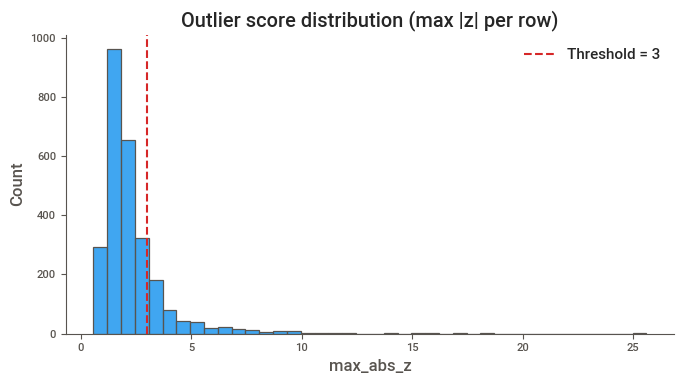

Applied winsorisation to numeric columns (capped extreme values).


In [169]:
# Outlier investigation & Winsdorisation

df_out = mod_all.copy()   # work on a copy

# Compute z-scores across numeric features
numeric_cols = df_out.select_dtypes(include=[np.number]).columns

Z = df_out[numeric_cols].apply(zscore, nan_policy="omit")

# Max |z| per row — good indicator of multivariate outliers
df_out["max_abs_z"] = Z.abs().max(axis=1)

# Investigate outliers
outliers = df_out[df_out["max_abs_z"] > 3]   # threshold = 3 SD

print(f"Detected {len(outliers)} multivariate outliers (>3 SD).")
display(outliers.head())

# Histogram of outlier severity (theme-aligned)
plt.figure(figsize=(7, 4))
sns.histplot(df_out["max_abs_z"], bins=40)
plt.axvline(3, color=sns.color_palette()[3], ls="--", label="Threshold = 3")
plt.title("Outlier score distribution (max |z| per row)")
plt.legend()
plt.tight_layout()
plt.show()

# Winsorise extreme values (suppression)
def winsorise_series(s, z_thresh=3):
    z = zscore(s, nan_policy="omit")
    upper = s[z < z_thresh].max()
    lower = s[z < z_thresh].min()
    return s.clip(lower=lower, upper=upper)

# Apply winsorisation only to numeric columns
df_out[numeric_cols] = df_out[numeric_cols].apply(winsorise_series)

print("Applied winsorisation to numeric columns (capped extreme values).")

mod_all = df_out.drop(columns=["max_abs_z"])

## NumPy workaround	
In NumPy ≥ 2.0, some internal attributes changed, and certain libraries still expect np.VisibleDeprecationWarning to exist.
This code checks if the attribute is missing and then assigns it from numpy.exceptions.VisibleDeprecationWarning.
If the import fails (older NumPy versions already have it), the except block does nothing.

In [170]:
try:
    # NumPy ≥ 2.0: provide the missing attribute for libraries expecting it
    from numpy.exceptions import VisibleDeprecationWarning as _VDW
    np.VisibleDeprecationWarning = _VDW
except Exception:
    pass  # On NumPy < 2.0 the attribute already exists
    
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
display(Markdown(f"**NumPy workaround**  \nCompleted at: {timestamp}"))

**NumPy workaround**  
Completed at: 2026-01-13 20:29:14

## Sweetviz	EDA report	
Generate HTML and notebook report.  Runs very slow on big data!

In [171]:
# Make Sweetviz safe copy and prepare for use
numeric_fill=None
cat_missing_label="Missing"

#Uses samping for speed when using large model
df_sv = mod_all

# Replace pandas.NA everywhere with np.nan (safe for numeric dtypes)
df_sv = df_sv.replace({pd.NA: np.nan})

# Identify dtype groups
num_cols  = df_sv.select_dtypes(include=["number"]).columns.tolist()
bool_cols = df_sv.select_dtypes(include=["boolean"]).columns.tolist()
# Treat plain strings, objects, and categoricals as "text-like"
text_cols = df_sv.select_dtypes(include=["string", "object", "category"]).columns.tolist()

# Numerics: median impute (avoids skew vs fill with 0)
if num_cols:
    imputer_num = SimpleImputer(strategy="median")
    df_sv[num_cols] = imputer_num.fit_transform(df_sv[num_cols])

# Booleans: fill NA as False and cast to plain bool
if bool_cols:
    df_sv[bool_cols] = df_sv[bool_cols].fillna(False).astype(bool)

# Text: fill NA with sentinel and keep as object/string
if text_cols:
    df_sv[text_cols] = df_sv[text_cols].fillna("Missing")

# Unify string dtype if needed
for c in text_cols:
    # keep 'object' to play nicely with encoders that expect object
    df_sv[c] = df_sv[c].astype("object")

timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
display(Markdown(f"**Prepare for Sweetviz**  \nCompleted at: {timestamp}"))    

**Prepare for Sweetviz**  
Completed at: 2026-01-13 20:29:14

In [172]:
# Run Sweetviz (pairwise can be heavy; turn off if needed)
import sweetviz as sv
# report = sv.analyze(df_sv, pairwise_analysis='off')
report = sv.analyze(df_sv)  # default pairwise_analysis='auto'
nowformat = datetime.now().strftime("%Y%m%d_%H%M%S_")
report.show_html(f"sweetviz_EDA_{nowformat}crime.html")

timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
display(Markdown(f"**Sweetviz EDA run**  \nCompleted at: {timestamp}"))

                                             |                                     | [  0%]   00:00 -> (? left…

Report sweetviz_EDA_20260113_202931_crime.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Sweetviz EDA run**  
Completed at: 2026-01-13 20:29:35

# Scale - standardise continuous features (z-score) before regression

In [173]:

#  Feature selection (single source of truth) 
def select_features(mod_all: pd.DataFrame) -> list[str]:
    feats = [c for c in mod_all.columns if "(per 10k - 2021)" in c]
    feats += [c for c in mod_all.columns if c.startswith("Population")]
    feats += [c for c in mod_all.columns if c.startswith("Under 16")]
    feats = [c for c in feats if not c.startswith("crime_rate_")]
    feats = [c for c in feats if not c.startswith("crime_count_")]
    feats = [c for c in feats if pd.api.types.is_numeric_dtype(mod_all[c])]
    return sorted(set(feats))

feature_cols = select_features(mod_all)

#  Prune collinearity BEFORE scaling or modelling 
def prune_collinearity(mod_all: pd.DataFrame, cols: list[str]) -> list[str]:
    X = mod_all[cols].astype(float)
    drop = []

    # Accommodation: drop total and one subcategory (avoid exact linear dependence)
    accom = [c for c in X.columns if "Accommodation type:" in c and "(per 10k - 2021)" in c]
    drop += [c for c in accom if "Total: All households" in c]
    for candidate in [
        "A caravan or other mobile or temporary structure",
        "In a commercial building",
        "Part of another converted building",
    ]:
        match = [c for c in accom if candidate in c]
        if match:
            drop += match[:1]
            break

    # Qualifications: drop any 'Total:' rate variable (use k-1 categories)
    qual = [c for c in X.columns if "Highest level of qualification:" in c and "(per 10k - 2021)" in c]
    drop += [c for c in qual if ": Total:" in c]

    # Constants and exact duplicates
    drop += [c for c in X.columns if X[c].nunique(dropna=True) <= 1]
    dup_mask = X.round(12).T.duplicated()
    drop += list(X.columns[dup_mask])

    keep = [c for c in cols if c not in set(drop)]
    return keep

FEATURE_COLS = prune_collinearity(mod_all, feature_cols)

#  VIF prune to a threshold (e.g., 10) 
def vif_iterative(X: pd.DataFrame, thresh=10.0, max_iter=20) -> list[str]:
    cols = list(X.columns)
    for _ in range(max_iter):
        Xn = X[cols].dropna()
        if Xn.shape[1] <= 1:
            break
        vifs = [variance_inflation_factor(Xn.values, i) for i in range(Xn.shape[1])]
        worst_idx = int(np.nanargmax(vifs))
        worst_vif = vifs[worst_idx]
        if not np.isfinite(worst_vif) or worst_vif < thresh:
            break
        cols.remove(cols[worst_idx])
    return cols

FEATURE_COLS = vif_iterative(mod_all[FEATURE_COLS].astype(float), thresh=10.0)

#  Now scale / model safely 
scaler = StandardScaler()
X_cont = mod_all[FEATURE_COLS].astype(float)
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_cont),
    columns=FEATURE_COLS,
    index=mod_all.index
)

## Correlation structure (redundancy / multicollinearity)
which features move together; candidates to drop or combine; inputs for VIF.

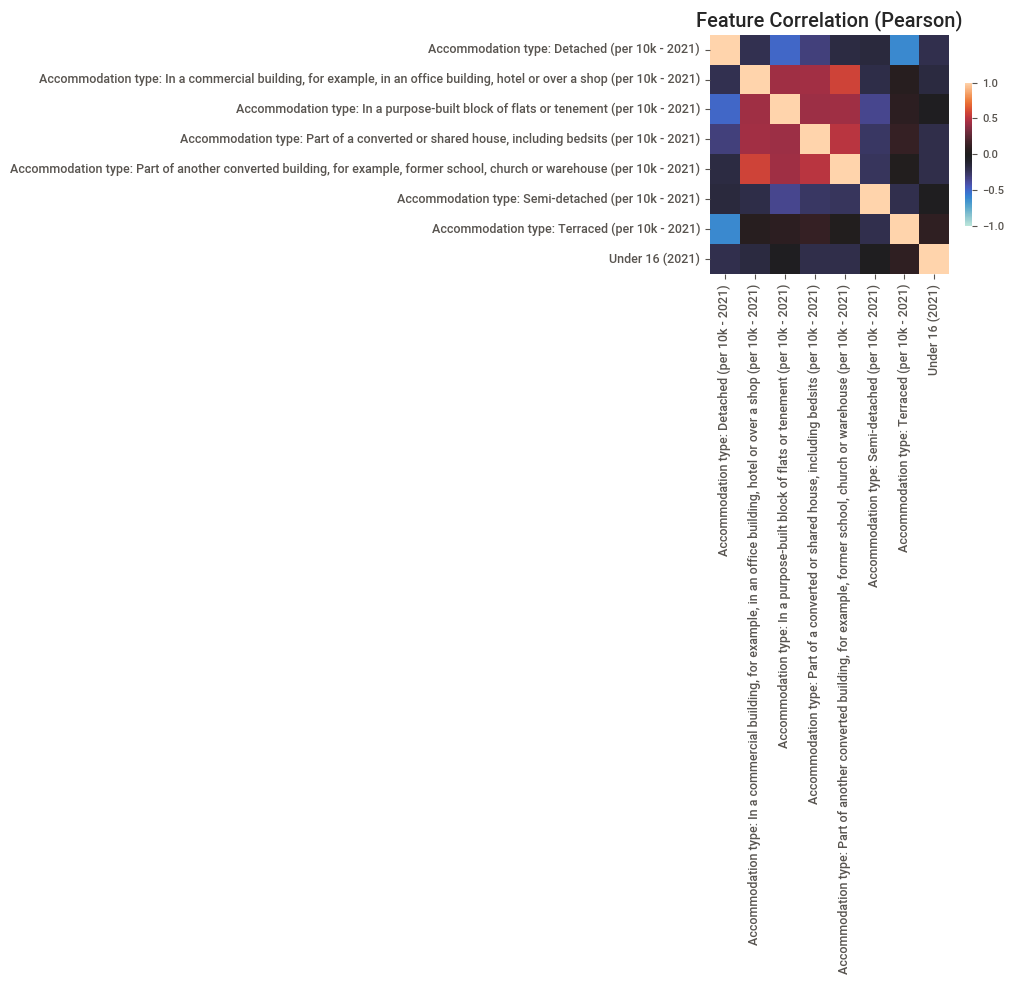

Accommodation type: Detached (per 10k - 2021)                                                                             Accommodation type: Terraced (per 10k - 2021)                                                                              -0.610503
Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021)   Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021)    0.577396
Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021)                               Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021)    0.506948
Accommodation type: Detached (per 10k - 2021)                                                                             Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021)                               

In [174]:
corr = pd.DataFrame(X_scaled, columns=X_scaled.columns).corr(method="pearson")

plt.figure(figsize=(14, 10))
ax = sns.heatmap(corr, center=0, vmin=-1, vmax=1, square=True, cbar_kws={"shrink": 0.6, "pad": 0.02})
ax.set_xticklabels(corr.columns, fontsize=9)
ax.set_yticklabels(corr.columns, fontsize=9, rotation=0)
plt.title("Feature Correlation (Pearson)")
plt.tight_layout()
plt.show()

# Top absolute correlations (feature pairs)
tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
pairs = (
    tri.stack()
       .reindex(tri.stack().abs().sort_values(ascending=False).index)
       .rename("corr")
)
display(pairs.head(20))


## PCA: structure + dimensionality
how many dimensions carry most variance; whether data lie on a lower‑dimensional manifold; quick 2D view.

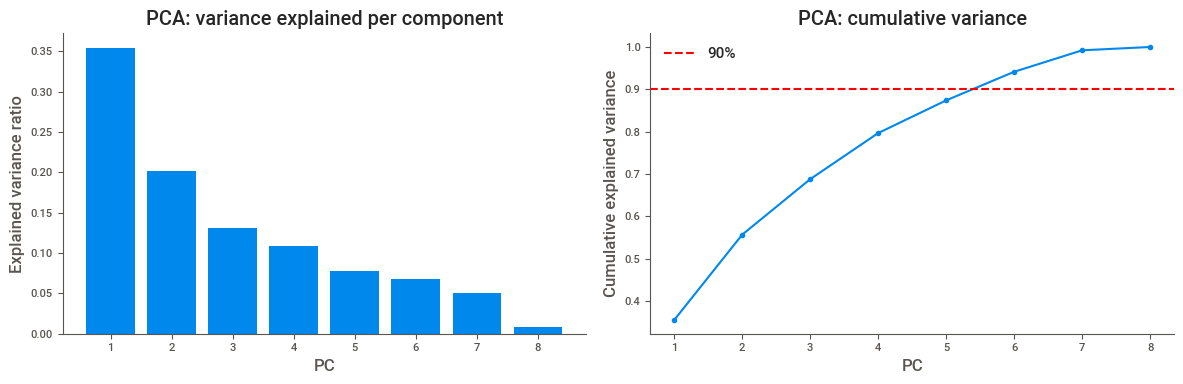

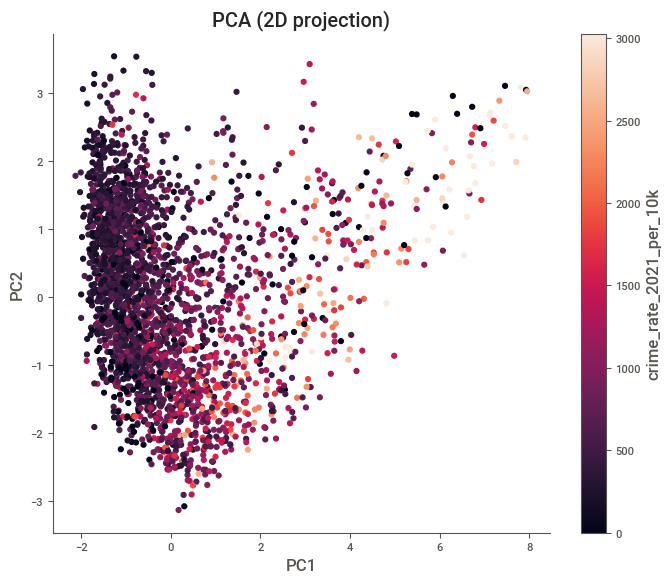

In [175]:
pca = PCA(n_components=min(20, X_scaled.shape[1])).fit(X_scaled)
evr = pca.explained_variance_ratio_
cum = np.cumsum(evr)

fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].bar(range(1, len(evr)+1), evr)
ax[0].set_title("PCA: variance explained per component")
ax[0].set_xlabel("PC")
ax[0].set_ylabel("Explained variance ratio")

ax[1].plot(range(1, len(cum)+1), cum, marker="o")
ax[1].axhline(0.90, color="red", ls="--", label="90%")
ax[1].set_title("PCA: cumulative variance")
ax[1].set_xlabel("PC")
ax[1].set_ylabel("Cumulative explained variance")
ax[1].legend()
plt.tight_layout()
plt.show()

# 2D PCA projection (optionally colour by a target if present in `mod`)
Z = PCA(n_components=2).fit_transform(X_scaled)
pc_df = pd.DataFrame(Z, columns=["PC1","PC2"], index=mod_all.index)

plt.figure(figsize=(7,6))
if "crime_rate_2021_per_10k" in mod_all.columns:
    sc = plt.scatter(pc_df["PC1"], pc_df["PC2"],
                     c=mod_all["crime_rate_2021_per_10k"], s=12)
    plt.colorbar(sc, label="crime_rate_2021_per_10k")
else:
    plt.scatter(pc_df["PC1"], pc_df["PC2"], s=12, alpha=0.7)
plt.title("PCA (2D projection)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()


## Outliers in z‑score space
rows that are extreme on any standardised feature (potential leverage points).

Outlier rows (> |z| 3): 338 out of 2689


,Accommodation type: Detached (per 10k - 2021),"Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021)",Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021),"Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021)","Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021)",Accommodation type: Semi-detached (per 10k - 2021),Accommodation type: Terraced (per 10k - 2021),Under 16 (2021)
22,-0.359350,3.035763,1.159612,1.273371,-0.021602,-0.325977,0.013877,-0.881255
25,-1.172211,4.144906,2.776472,2.396540,3.759037,-1.382229,0.536072,-0.095102
40,-0.846158,3.732503,3.308395,1.590184,0.491549,-1.005433,-0.491852,-0.123864
44,0.420437,3.146444,0.195603,1.185863,2.631614,-0.167321,-0.141241,-1.504425
59,-0.607994,-0.516420,0.216605,-0.592001,-0.583275,-0.284451,0.239713,3.068683


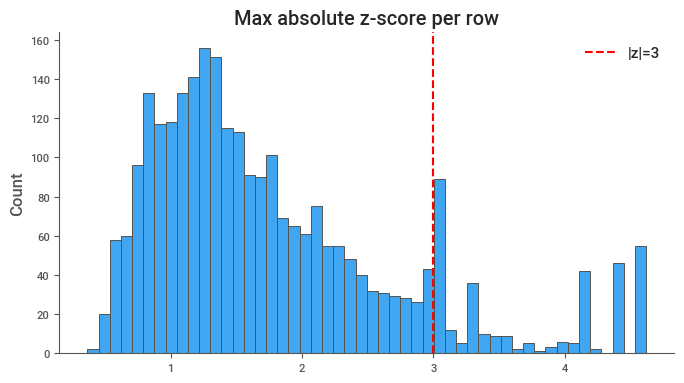

In [176]:
# Xz = pd.DataFrame(X_scaled, columns=feature_cols, index=mod_all.index)
Xz = pd.DataFrame(X_scaled, columns=FEATURE_COLS, index=mod_all.index)
keep = Xz.columns[Xz.nunique(dropna=True) > 1]

Xz = Xz[keep]
corr = Xz.corr()

row_max_abs_z = Xz.abs().max(axis=1)
outliers = Xz[row_max_abs_z > 3]   # 3-sigma rule, adjust if needed
print(f"Outlier rows (> |z| 3): {outliers.shape[0]} out of {Xz.shape[0]}")
display(outliers.head())

# Quick distribution of max |z| per row
plt.figure(figsize=(7,4))
sns.histplot(row_max_abs_z, bins=50)
plt.axvline(3, color="red", ls="--", label="|z|=3")
plt.title("Max absolute z-score per row")
plt.legend(); plt.tight_layout(); plt.show()


## Quick multicollinearity screen (VIF on unscaled or scaled—both acceptable)
features with unstable coefficients risk.

In [177]:
def compute_vif_safe(X_df, max_corr_drop=True, verbose=True):
    """
    Compute VIF robustly:
      1) Keep only numeric columns
      2) Drop columns with all-NA or constant values
      3) Drop exact duplicate columns
      4) Optionally drop perfectly correlated columns (|r| == 1 within tolerance)
      5) Add constant and compute VIF for remaining features
    Returns: (vif_table, kept_columns, dropped_columns)
    """
    dropped = []

    # numeric only
    X = X_df.select_dtypes(include=[np.number]).copy()

    # drop all-NA and constant columns
    const_cols = [c for c in X.columns if X[c].nunique(dropna=True) <= 1]
    if const_cols:
        X.drop(columns=const_cols, inplace=True)
        dropped += [(c, "constant_or_allNA") for c in const_cols]

    # drop exact duplicate columns
    # (transpose, mark duplicates, keep first)
    if X.shape[1] > 1:
        dup_mask = X.T.duplicated()
        dup_cols = X.columns[dup_mask].tolist()
        if dup_cols:
            X.drop(columns=dup_cols, inplace=True)
            dropped += [(c, "duplicate_column") for c in dup_cols]

    # drop perfectly correlated columns (|r| == 1 within tol)
    if max_corr_drop and X.shape[1] > 1:
        corr = X.corr().abs()
        # upper triangle without diagonal
        upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        # use a tight tolerance to catch numeric identity after scaling
        perfect_pairs = np.where(np.isclose(upper.values, 1.0, atol=1e-12))
        cols_to_drop = set()
        for i, j in zip(*perfect_pairs):
            # keep the first; drop the later column
            col_j = upper.columns[j]
            if col_j not in cols_to_drop:
                cols_to_drop.add(col_j)
        if cols_to_drop:
            X.drop(columns=list(cols_to_drop), inplace=True)
            dropped += [(c, "perfect_correlation") for c in cols_to_drop]

    # drop remaining columns with any NaN (VIF needs complete rows)
    X_clean = X.dropna(axis=0, how="any")
    # If dropping rows causes empty frame, bail out
    if X_clean.empty or X_clean.shape[1] == 0:
        return (pd.DataFrame(columns=["feature", "VIF"]), X.columns.tolist(), dropped)

    # add constant for VIF regression (required by statsmodels formula)
    X_exog = sm.add_constant(X_clean, has_constant="add")

    # compute VIF per predictor (skip the constant)
    vifs = []
    features = [c for c in X_exog.columns if c != "const"]

    # Ignore FP warnings here; handled exact 1.0 above.
    old_settings = np.seterr(all="ignore")
    try:
        for i, col in enumerate(X_exog.columns):
            if col == "const":
                continue
            idx = i  # position in exog matrix
            v = variance_inflation_factor(X_exog.values, idx)
            # map negative/inf/NaN to large number for readability
            if not np.isfinite(v) or v < 0:
                v = np.inf
            vifs.append((col, float(v)))
    finally:
        np.seterr(**old_settings)

    vif_table = pd.DataFrame(vifs, columns=["feature", "VIF"]).sort_values("VIF", ascending=False).reset_index(drop=True)

    if verbose:
        print("Dropped columns (reason):", dropped)
    return vif_table, features, dropped


In [178]:
# VIF as table
vif_table, kept, dropped = compute_vif_safe(X_cont, max_corr_drop=True, verbose=True)
display(vif_table.head(20))
print("Kept:", kept)
print("Dropped:", dropped[:10])  # show first few dropped with reasons

Dropped columns (reason): []


,feature,VIF
0,Accommodation type: Detached (per 10k - 2021),7.166902
1,Accommodation type: Terraced (per 10k - 2021),3.986367
2,Accommodation type: In a purpose-built block o...,3.862656
3,Accommodation type: Semi-detached (per 10k - 2...,3.357953
4,Accommodation type: Part of a converted or sha...,1.787125
5,Accommodation type: Part of another converted ...,1.784854
6,"Accommodation type: In a commercial building, ...",1.645422
7,Under 16 (2021),1.383713


Kept: ['Accommodation type: Detached (per 10k - 2021)', 'Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021)', 'Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021)', 'Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021)', 'Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021)', 'Accommodation type: Semi-detached (per 10k - 2021)', 'Accommodation type: Terraced (per 10k - 2021)', 'Under 16 (2021)']
Dropped: []


In [179]:
# Tabular highlight (top offenders only)
top_vif = vif_table.copy()
top_vif["VIF_display"] = top_vif["VIF"].replace([np.inf, -np.inf], np.nan).round(2)
top_vif = top_vif.sort_values("VIF", ascending=False)

display(top_vif.head(20))


,feature,VIF,VIF_display
0,Accommodation type: Detached (per 10k - 2021),7.166902,7.17
1,Accommodation type: Terraced (per 10k - 2021),3.986367,3.99
2,Accommodation type: In a purpose-built block o...,3.862656,3.86
3,Accommodation type: Semi-detached (per 10k - 2...,3.357953,3.36
4,Accommodation type: Part of a converted or sha...,1.787125,1.79
5,Accommodation type: Part of another converted ...,1.784854,1.78
6,"Accommodation type: In a commercial building, ...",1.645422,1.65
7,Under 16 (2021),1.383713,1.38


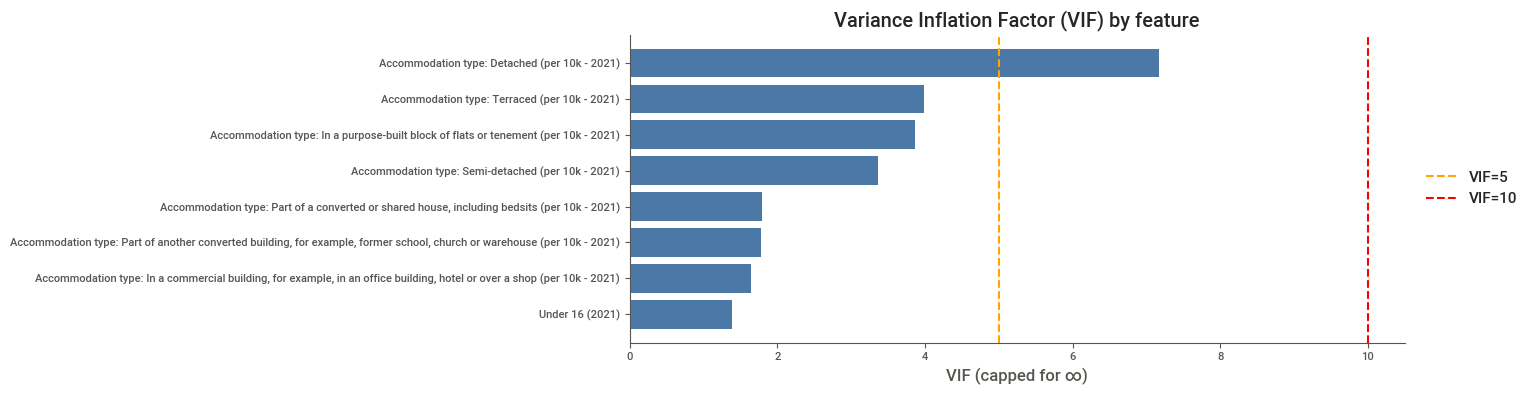

In [180]:
# Clean VIF values (map inf to a cap for plotting)
vif_plot = vif_table.copy()
vif_plot["VIF_plot"] = vif_plot["VIF"].replace([np.inf, -np.inf], np.nan)
cap = np.nanpercentile(vif_plot["VIF_plot"], 95) if np.isfinite(vif_plot["VIF_plot"]).any() else 100.0
vif_plot["VIF_plot"] = vif_plot["VIF_plot"].fillna(cap)  # cap infinities to 95th percentile (or 100)

# Sort descending
vif_plot = vif_plot.sort_values("VIF_plot", ascending=True)

plt.figure(figsize=(10, max(4, 0.35 * len(vif_plot))))
bars = plt.barh(vif_plot["feature"], vif_plot["VIF_plot"], color="#4c78a8")

# Threshold lines (common guidance)
plt.axvline(5, color="orange", ls="--", lw=1.5, label="VIF=5")
plt.axvline(10, color="red", ls="--", lw=1.5, label="VIF=10")

plt.title("Variance Inflation Factor (VIF) by feature")
plt.xlabel("VIF (capped for ∞)")
plt.legend(
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0.,
)
plt.show()

# Interpretation

# Features to scrutinise: VIF ≥ 10 (strong), 5–10 (moderate).
# Consider dropping/combining those, or using regularised models (Ridge/Lasso).

In [181]:
# Tabular highlight (top offenders only)
top_vif = vif_table.copy()
top_vif["VIF_display"] = top_vif["VIF"].replace([np.inf, -np.inf], np.nan).round(2)
top_vif = top_vif.sort_values("VIF", ascending=False)

display(top_vif.head(20))

,feature,VIF,VIF_display
0,Accommodation type: Detached (per 10k - 2021),7.166902,7.17
1,Accommodation type: Terraced (per 10k - 2021),3.986367,3.99
2,Accommodation type: In a purpose-built block o...,3.862656,3.86
3,Accommodation type: Semi-detached (per 10k - 2...,3.357953,3.36
4,Accommodation type: Part of a converted or sha...,1.787125,1.79
5,Accommodation type: Part of another converted ...,1.784854,1.78
6,"Accommodation type: In a commercial building, ...",1.645422,1.65
7,Under 16 (2021),1.383713,1.38


## Hierarchical clustering of features
Groups of near‑duplicate features.

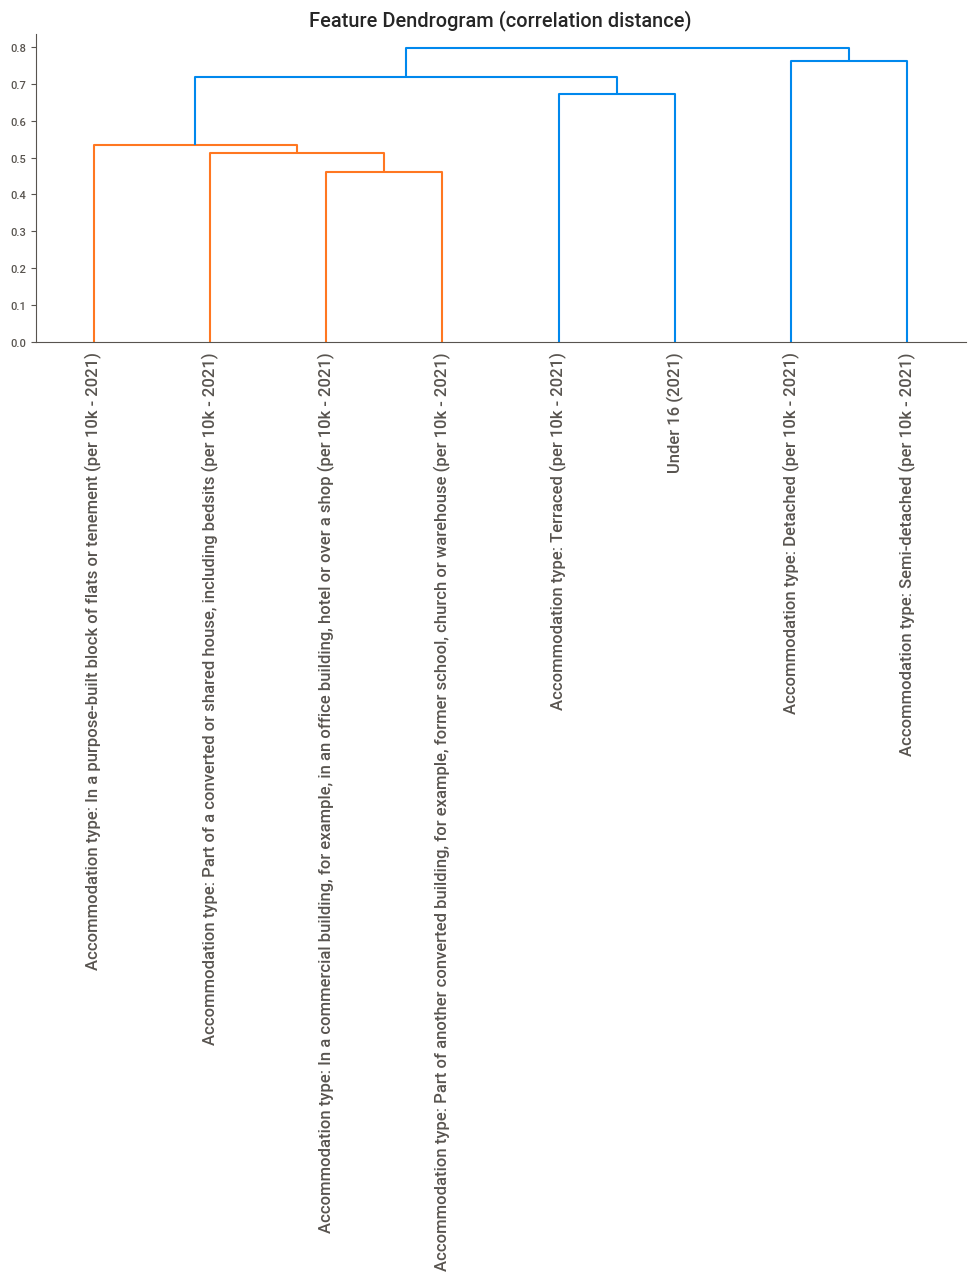

In [182]:
# Convert square -> condensed
dist_sq = ((1 - corr.fillna(0)) / 2.0)**0.5   # square matrix
dist_condensed = squareform(dist_sq.values, checks=False)  # 1-D

Z = linkage(dist_condensed, method="average")

plt.figure(figsize=(12, 4))
dendrogram(Z, labels=corr.columns, leaf_rotation=90)
plt.title("Feature Dendrogram (correlation distance)")
plt.show()

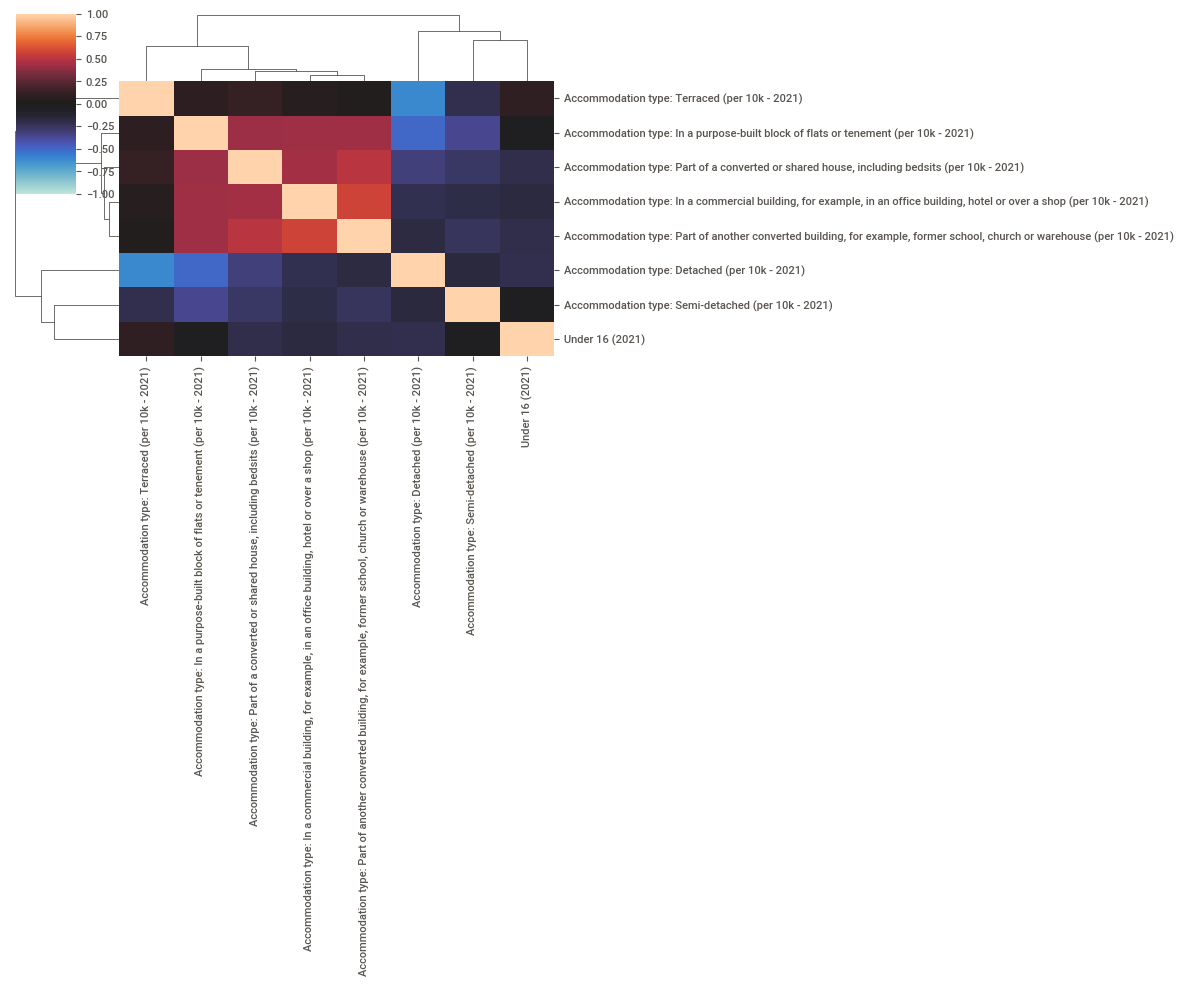

In [183]:
#Quickest path to a clustered heatmap without manual linkage:
sns.clustermap(corr, center=0, vmin=-1, vmax=1,
               method="average", metric="correlation", figsize=(12, 10))
plt.show()

## Baseline modelling (per Year or pooled)

In [184]:
y = mod_all["crime_rate_2021_per_10k"].astype(float)
X = sm.add_constant(X_scaled)  # add intercept
ols = sm.OLS(y, X, missing="drop").fit()
print(ols.summary())   # includes R^2, p-values, ANOVA (via .anova_lm if nested models)

                               OLS Regression Results                              
Dep. Variable:     crime_rate_2021_per_10k   R-squared:                       0.387
Model:                                 OLS   Adj. R-squared:                  0.385
Method:                      Least Squares   F-statistic:                     211.3
Date:                     Tue, 13 Jan 2026   Prob (F-statistic):          6.31e-278
Time:                             20:29:37   Log-Likelihood:                -20430.
No. Observations:                     2689   AIC:                         4.088e+04
Df Residuals:                         2680   BIC:                         4.093e+04
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                                                                                                               coef    std err          t      P

In [185]:
# Model diagnostics:
# Residual plots: residuals vs fitted, QQ plot.
# Assumptions: homoscedasticity (Breusch–Pagan), normality (Shapiro/QQ), independence (Durbin–Watson).
dw = sm.stats.durbin_watson(ols.resid)

print(dw)

1.3358972797951187


## Error metrics vs hold-out
Use grouped split to avoid leakage (e.g., hold out a set of LSOAs):

In [186]:
# configuration 
TARGET_COL = "crime_rate_2021_per_10k"

# Columns needed for this spec
model_cols = ["geography code", TARGET_COL] + FEATURE_COLS

# Start from the canonical table and drop rows with any NA in target or features
mod_base = df_census_with_crime_rates[model_cols].dropna(axis=0, how="any").copy()

# Attach LAD groups to the SAME rows used for modelling
lad_map = df_LSOA_MSOA_LAD[["lsoa21cd", "ladcd"]].drop_duplicates()
mod_2021 = (
    mod_base
    .merge(lad_map, left_on="geography code", right_on="lsoa21cd", how="left")
    .drop(columns=["lsoa21cd"])
    .dropna(subset=["ladcd"])           # drop rows without a group
    .reset_index(drop=True)
)

# Define X, y, groups from the SAME dataframe
X_all  = mod_2021[FEATURE_COLS].astype(float)
y_all  = mod_2021[TARGET_COL].astype(float)
groups = mod_2021["ladcd"].astype(str)

# Sanity checks
assert len(X_all) == len(y_all) == len(groups)

In [187]:
#Quick diagnostics: rank, duplicates, perfect correlation
X_df = mod_all[FEATURE_COLS].astype(float)

# Matrix rank vs number of columns
rank = np.linalg.matrix_rank(X_df.values)
print(f"X shape: {X_df.shape}, matrix rank: {rank}")

# Constant / all-NA columns
const_cols = [c for c in X_df.columns if X_df[c].nunique(dropna=True) <= 1]
print("Constant/all-NA columns:", const_cols)

# Exact duplicates (after rounding to stabilise floating noise)
dup_mask = X_df.round(12).T.duplicated()
dup_cols = X_df.columns[dup_mask].tolist()
print("Exact duplicate columns:", dup_cols)

# Perfect correlations (|r|==1 within tolerance)
corr = X_df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
perfect_pairs = [(i,j) for i in upper.columns for j in upper.columns
                 if upper.loc[i,j] >= 1 - 1e-12]
print("Perfectly correlated pairs (if any):", perfect_pairs[:10])


X shape: (2689, 8), matrix rank: 8
Constant/all-NA columns: []
Exact duplicate columns: []
Perfectly correlated pairs (if any): []


In [188]:
drop_cols = []
#Drop obvious collinearity sources (recommended rules for data)
# Drop accommodation total and one subcategory (choose a small/rare one to drop)
accom_cols = [c for c in X_df.columns if "Accommodation type:" in c and "(per 10k - 2021)" in c]
drop_cols += [c for c in accom_cols if "Total: All households" in c]
# drop one subcategory to avoid exact sum-to-total trap
for candidate in [
    "A caravan or other mobile or temporary structure",
    "In a commercial building",
    "Part of another converted building",
]:
    match = [c for c in accom_cols if candidate in c]
    if match:
        drop_cols += match[:1]
        break

# Ensure qualification block uses k-1 (skip total and one level if needed)
qual_cols = [c for c in X_df.columns if "Highest level of qualification:" in c and "(per 10k - 2021)" in c]
# (likely already excluded the base; if not, drop the 'Total:' rate)
drop_cols += [c for c in qual_cols if ": Total:" in c]  # safety

# Drop constants/duplicates found above
drop_cols += const_cols + dup_cols

drop_cols = sorted(set([c for c in drop_cols if c in X_df.columns]))
print("Dropping columns (rule-based):", drop_cols)

FEATURE_COLS = [c for c in FEATURE_COLS if c not in drop_cols]
X_df = X_df.drop(columns=drop_cols)


Dropping columns (rule-based): ['Accommodation type: In a commercial building, for example, in an office building, hotel or over a shop (per 10k - 2021)']


In [189]:
#Ensure full rank after pruning (and optionally prune by VIF)
rank = np.linalg.matrix_rank(X_df.values)
print(f"Post-prune X shape: {X_df.shape}, rank: {rank}")

# Optional: iterative VIF prune to threshold (e.g., 10)
def vif_iterative(X, thresh=10.0, max_iter=20):
    cols = list(X.columns)
    for _ in range(max_iter):
        Xn = X[cols].dropna()
        if Xn.shape[1] <= 1: break
        vifs = [variance_inflation_factor(Xn.values, i) for i in range(Xn.shape[1])]
        worst_idx = int(np.nanargmax(vifs))
        worst_vif = vifs[worst_idx]
        if worst_vif < thresh or not np.isfinite(worst_vif): break
        drop = cols[worst_idx]
        cols.remove(drop)
        print(f"Dropping by VIF: {drop} (VIF={worst_vif:.2f})")
    return cols

FEATURE_COLS = vif_iterative(X_df, thresh=10.0)
X_df = X_df[FEATURE_COLS]

# IMPORTANT: rebuild the global feature matrix AFTER pruning
X_all = mod_all[FEATURE_COLS].copy()

print("Kept features:", FEATURE_COLS)

Post-prune X shape: (2689, 7), rank: 7
Kept features: ['Accommodation type: Detached (per 10k - 2021)', 'Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021)', 'Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021)', 'Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021)', 'Accommodation type: Semi-detached (per 10k - 2021)', 'Accommodation type: Terraced (per 10k - 2021)', 'Under 16 (2021)']


# Predictive modelling

## Test/train split (80/20)

**Downcast metrics and grouped train/test split**

Completed at: 2026-01-13 20:29:37



**Train X:** (2268, 7)  <br>**Test X:** (421, 7)  <br>**Train y:** (2268,)  <br>**Test y:** (421,)



**Group integrity (LAD codes):**

- Unique LADs (train): 23

- Unique LADs (test): 6

- Overlap LADs between train/test: 0 (should be 0 for leakage-free grouped split)

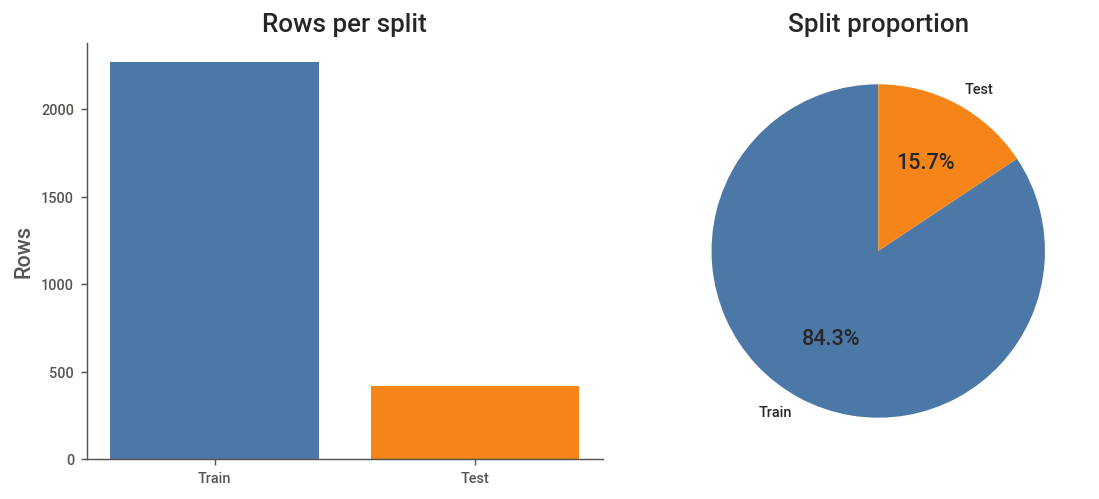

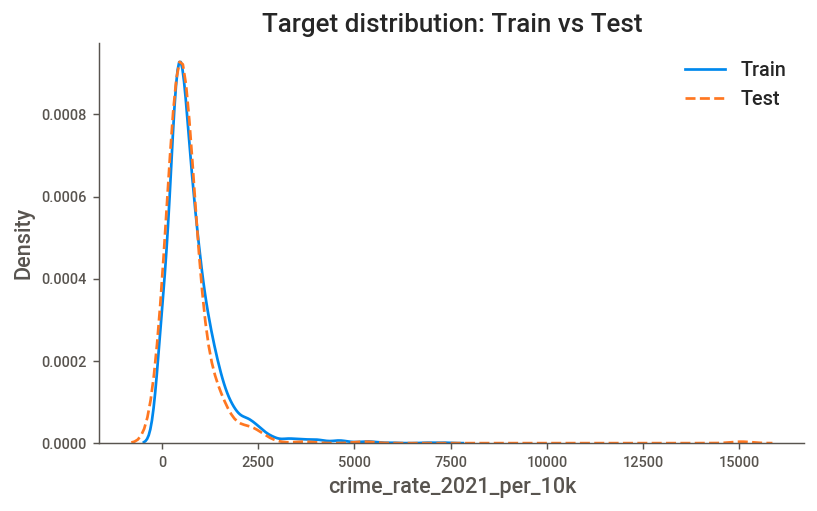

In [190]:
# Downcast numerics on X_all for memory efficiency (floats only)
num_cols = X_all.select_dtypes(include=["float64", "float32", "float16", "int64", "int32", "int16"]).columns
X_all[num_cols] = X_all[num_cols].apply(pd.to_numeric, downcast="float")

# Grouped train/test split to prevent LAD leakage (80/20)
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X_all, y_all, groups))

X_train, X_test = X_all.iloc[train_idx], X_all.iloc[test_idx]
y_train, y_test = y_all.iloc[train_idx], y_all.iloc[test_idx]
groups_train, groups_test = groups.iloc[train_idx], groups.iloc[test_idx]

# Markdown summary (shapes + group integrity)
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
md = [
    "**Downcast metrics and grouped train/test split**",
    f"Completed at: {timestamp}",
    "",
    f"**Train X:** {X_train.shape}  <br>"
    f"**Test X:** {X_test.shape}  <br>"
    f"**Train y:** {y_train.shape}  <br>"
    f"**Test y:** {y_test.shape}",
    "",
    "**Group integrity (LAD codes):**",
    f"- Unique LADs (train): {groups_train.nunique()}",
    f"- Unique LADs (test): {groups_test.nunique()}",
    f"- Overlap LADs between train/test: {len(set(groups_train) & set(groups_test))} (should be 0 for leakage-free grouped split)"
]
display(Markdown("\n\n".join(md)))

# Simple visual: bar chart of sample counts and a pie of group share
fig, axes = plt.subplots(1, 2, figsize=(9, 4), dpi=130)

# Bar: row counts
axes[0].bar(["Train", "Test"], [len(X_train), len(X_test)], color=["#4c78a8", "#f58518"])
axes[0].set_title("Rows per split")
axes[0].set_ylabel("Rows")

# Pie: share of LAD groups by count of rows (train vs test)
sizes = [len(X_train), len(X_test)]
axes[1].pie(sizes, labels=["Train", "Test"], autopct="%1.1f%%", colors=["#4c78a8", "#f58518"], startangle=90)
axes[1].set_title("Split proportion")

plt.tight_layout()
plt.show()

# Quick sanity on target distribution parity
fig, ax = plt.subplots(1, 1, figsize=(7, 4), dpi=130)
sns.kdeplot(y_train, label="Train", ax=ax)
sns.kdeplot(y_test, label="Test", ax=ax, linestyle="--")
ax.set_title("Target distribution: Train vs Test")
ax.legend()
plt.show()

CV Results (GroupKFold, grouped by LAD):
RMSE: mean=607.110, std=46.789
MAE:  mean=385.835, std=32.799
MAPE: mean=0.455, std=0.038


,Fold,RMSE,MAE,MAPE
0,1,519.533928,329.328355,0.479500
1,2,648.375201,371.787809,0.502946
2,3,642.791882,423.060434,0.399920
3,4,601.380790,407.374093,0.468879
4,5,623.469571,397.623979,0.423471


Saved OLS group CV metrics output to: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_202938_ols_group_cv_metrics_df.csv


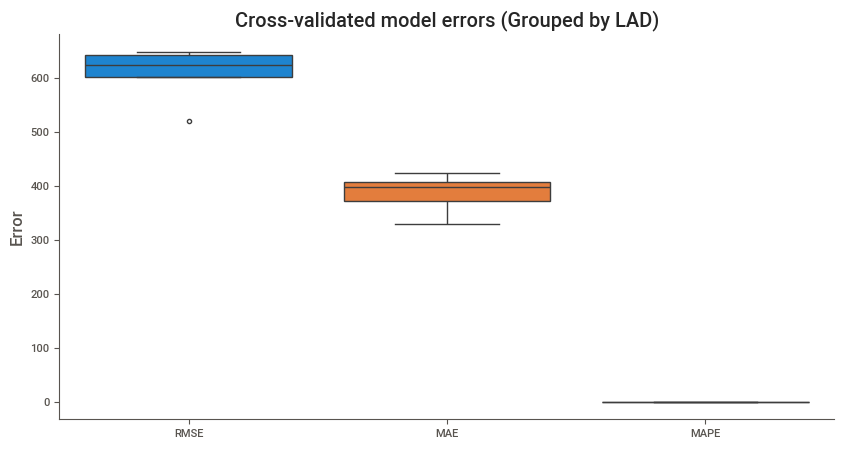

In [191]:
# GroupKFold by LAD with in-fold scaling (no leakage) on train
# creates K different train/test folds
# each fold uses different subsets of LADs
# folds exist only inside the loop
# after the loop, have no X_train/X_test stored anywhere
# the “test set” changes every fold
# the outputs kept are RMSE/MAE/MAPE per fold, not a split
n_splits = min(5, groups_train.nunique())     # ensure enough LADs for the split count
gkf = GroupKFold(n_splits=n_splits)

rmse, mae, mape = [], [], []
for tr, te in gkf.split(X_train, y_train, groups_train):
    # fit scaler ONLY on train, then transform both
    scaler = StandardScaler()
    X_tr = pd.DataFrame(scaler.fit_transform(X_train.iloc[tr]), columns=FEATURE_COLS, index=X_train.index[tr])
    X_te = pd.DataFrame(scaler.transform(X_train.iloc[te]),     columns=FEATURE_COLS, index=X_train.index[te])

    y_tr, y_te = y_train.iloc[tr], y_train.iloc[te]

    m = sm.OLS(y_tr, sm.add_constant(X_tr)).fit()
    pred = m.predict(sm.add_constant(X_te))

    rmse.append(np.sqrt(mean_squared_error(y_te, pred)))
    mae.append(mean_absolute_error(y_te, pred))
    mape.append((np.abs((y_te - pred) / y_te.replace(0, np.nan))).mean())

print("CV Results (GroupKFold, grouped by LAD):")
print(f"RMSE: mean={np.mean(rmse):.3f}, std={np.std(rmse):.3f}")
print(f"MAE:  mean={np.mean(mae):.3f}, std={np.std(mae):.3f}")
print(f"MAPE: mean={np.mean(mape):.3f}, std={np.std(mape):.3f}")

metrics_df = pd.DataFrame({"Fold": range(1, len(rmse)+1), "RMSE": rmse, "MAE": mae, "MAPE": mape})
display(metrics_df)

output_path_ols_group_cv_metrics_df = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_ols_group_cv_metrics_df.csv"
metrics_df.to_csv(output_path_ols_group_cv_metrics_df, index=False)
print(f"Saved OLS group CV metrics output to: {output_path_ols_group_cv_metrics_df}")

plt.figure(figsize=(10,5))
sns.boxplot(data=metrics_df[["RMSE","MAE","MAPE"]])
plt.title("Cross-validated model errors (Grouped by LAD)")
plt.ylabel("Error")
plt.show()

# EDA on TRAIN

In [192]:
# Fit final model on TRAIN only
scaler_final = StandardScaler().fit(X_train)
Xtr = scaler_final.transform(X_train)
Xte = scaler_final.transform(X_test)

final_pred_model = sm.OLS(y_train, sm.add_constant(Xtr)).fit()

print(final_pred_model.summary())

                               OLS Regression Results                              
Dep. Variable:     crime_rate_2021_per_10k   R-squared:                       0.348
Model:                                 OLS   Adj. R-squared:                  0.346
Method:                      Least Squares   F-statistic:                     172.4
Date:                     Tue, 13 Jan 2026   Prob (F-statistic):          1.07e-204
Time:                             20:29:38   Log-Likelihood:                -17705.
No. Observations:                     2268   AIC:                         3.543e+04
Df Residuals:                         2260   BIC:                         3.547e+04
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [193]:
#Evaluate the final model on the TEST set
pred_test = final_pred_model.predict(sm.add_constant(Xte))

rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
mae_test  = mean_absolute_error(y_test, pred_test)
mape_test = np.mean(np.abs((y_test - pred_test) / y_test.replace(0, np.nan)))

print("FINAL MODEL – Test set performance:")
print("RMSE:", rmse_test)
print("MAE :", mae_test)
print("MAPE:", mape_test)


FINAL MODEL – Test set performance:
RMSE: 804.8055127227138
MAE : 355.8700012387059
MAPE: 0.45945311898236063


In [194]:
# Add baseline Poisson/NB for counts with offset to compare specs:
y_cnt = mod_all["crime_count_2021"].astype(float)
X_nb  = sm.add_constant(mod_all[FEATURE_COLS].astype(float))
offset = np.log(mod_all["Population 2021"].clip(lower=1))
nb = sm.GLM(y_cnt, X_nb, family=sm.families.NegativeBinomial(alpha=1.0), offset=offset).fit()
print(nb.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:       crime_count_2021   No. Observations:                 2689
Model:                            GLM   Df Residuals:                     2681
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15359.
Date:                Tue, 13 Jan 2026   Deviance:                       2702.2
Time:                        20:29:38   Pearson chi2:                     989.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1769
Covariance Type:            nonrobust                                         
                                                                                                                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------

# Interpretive / Scientific modelling.

In [195]:
# OLS
ols_classic = sm.OLS(y, sm.add_constant(X_scaled)).fit()
ols_hc3    = sm.OLS(y, sm.add_constant(X_scaled)).fit(cov_type="HC3")
print(ols_hc3.summary())

final_model = ols_classic
# Provides:
# Coefficient estimates
# p‑values
# overall regression fit (R², F‑statistic)
# confidence intervals

# This is not the model to evaluate, but the model to interpret.

                               OLS Regression Results                              
Dep. Variable:     crime_rate_2021_per_10k   R-squared:                       0.387
Model:                                 OLS   Adj. R-squared:                  0.385
Method:                      Least Squares   F-statistic:                     123.6
Date:                     Tue, 13 Jan 2026   Prob (F-statistic):          1.21e-176
Time:                             20:29:38   Log-Likelihood:                -20430.
No. Observations:                     2689   AIC:                         4.088e+04
Df Residuals:                         2680   BIC:                         4.093e+04
Df Model:                                8                                         
Covariance Type:                       HC3                                         
                                                                                                                               coef    std err          z      P

## Coefficient forest with 95% CI
A compact view of effect sizes and uncertainty. 

## Coefficient forest with 95% CI
A compact view of effect sizes and uncertainty. 

## Coefficient forest with 95% CI
A compact view of effect sizes and uncertainty. 

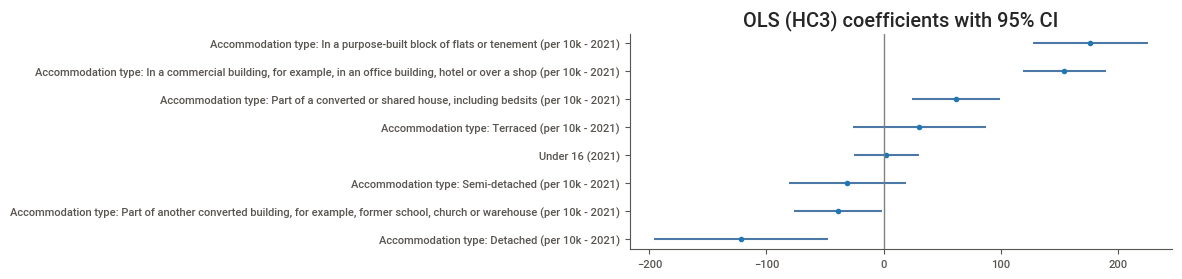

In [196]:
params = ols_hc3.params
conf   = ols_hc3.conf_int()
coef   = pd.DataFrame({"coef": params, "lo": conf[0], "hi": conf[1]})
coef = coef.drop(index="const").sort_values("coef")
plt.figure(figsize=(7, 0.35*len(coef)))
plt.hlines(y=coef.index, xmin=coef["lo"], xmax=coef["hi"], color="#4c78a8")
plt.plot(coef["coef"], coef.index, "o", color="#1f77b4")
plt.axvline(0, color="grey", lw=1)
plt.title("OLS (HC3) coefficients with 95% CI")
# plt.tight_layout();
plt.show()


## Partial Regression Plot (Added‑Variable Plot)
A Partial Regression Plot—also called an Added‑Variable Plot—shows the unique relationship between a predictor and the outcome after controlling for all other predictors in the model

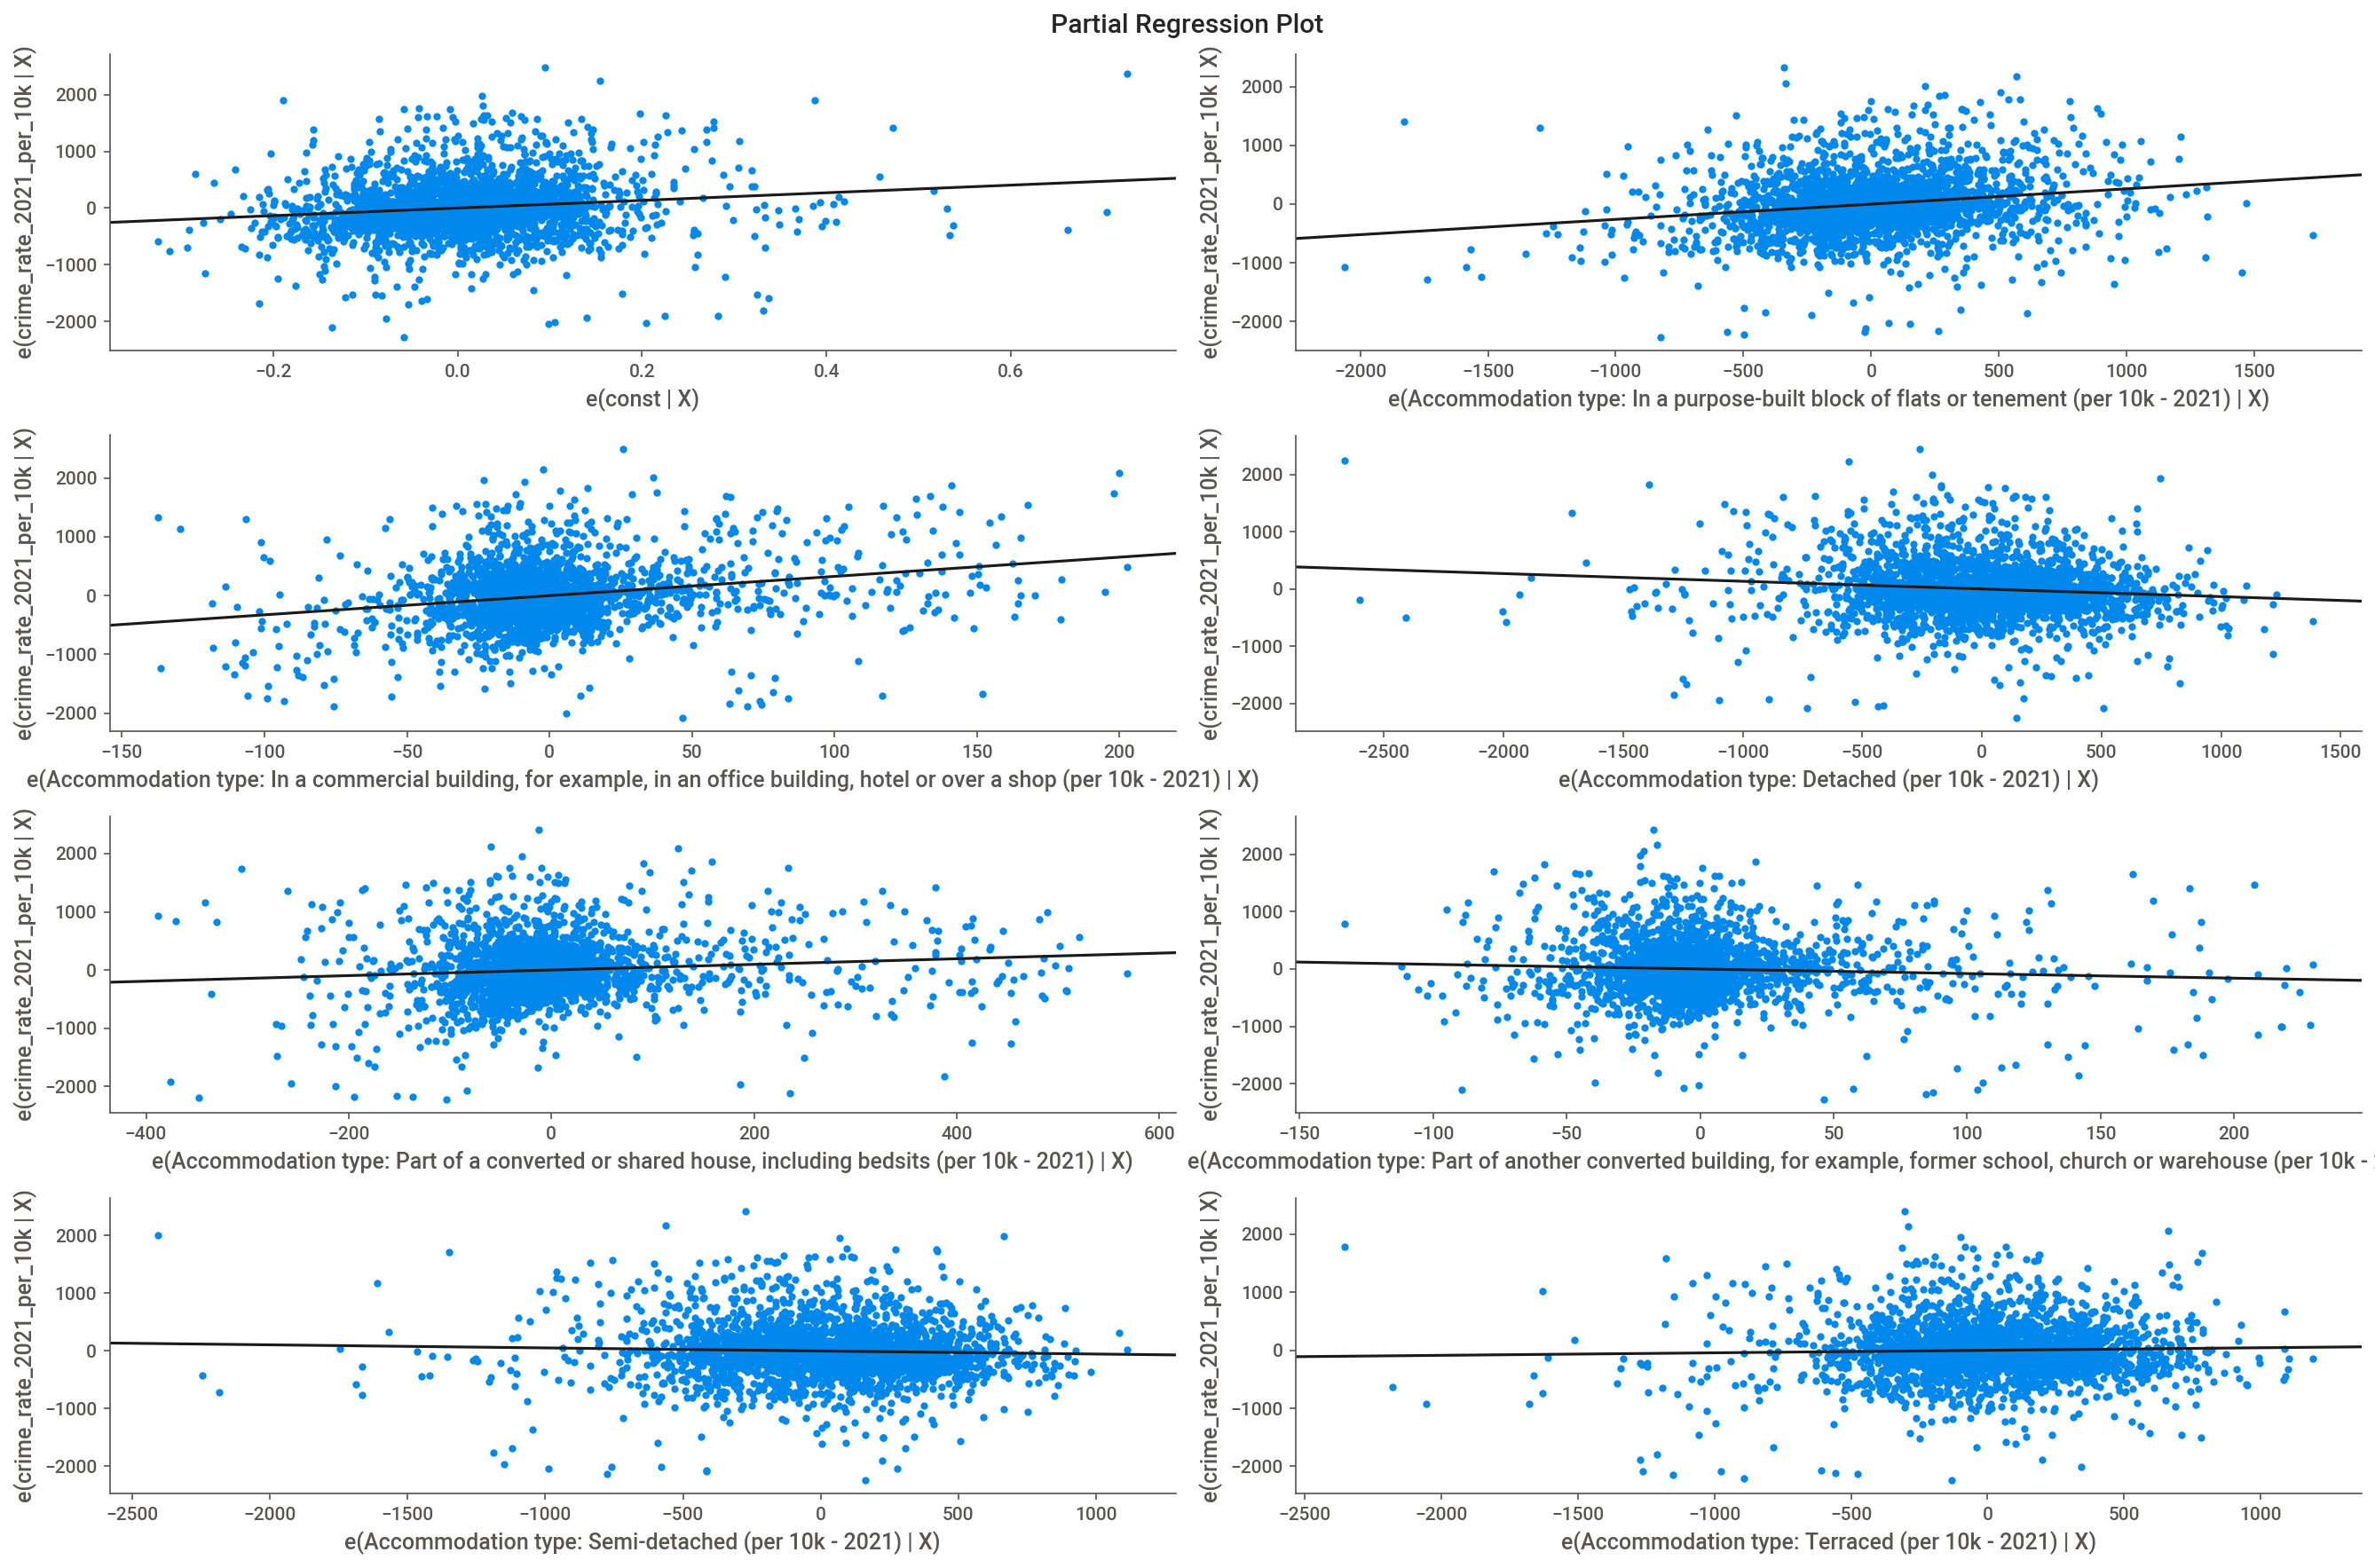

In [197]:
# choose top-K by absolute HC3 coefficient (or by ElasticNet if prefered)
K = 7
top_feats = (
    ols_hc3.params.drop("const").abs().sort_values(ascending=False).index[:K].tolist()
    # alternatively: pd.Index(FEATURE_EN)[:K].tolist()
)

# build a reduced model with the top-K features
X_top = sm.add_constant(mod_all[top_feats].astype(float))
ols_top = sm.OLS(y, X_top).fit()

# draw larger partial-regress grid
fig = sm.graphics.plot_partregress_grid(
    ols_top, fig=plt.figure(figsize=(18, 12), dpi=150)
)
for ax in fig.axes:
    ax.tick_params(labelsize=10)
plt.tight_layout()
plt.show()


## Scale-location plot
Detect non-constant variance.

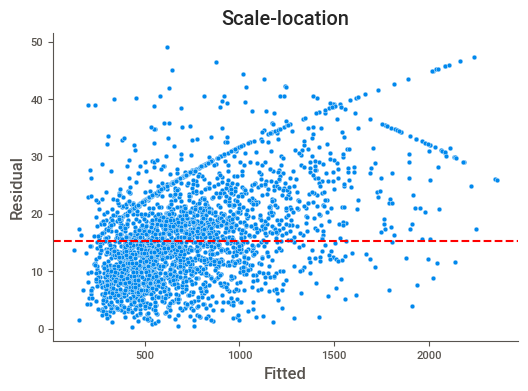

In [198]:
resid = ols_hc3.resid
fitted = ols_hc3.fittedvalues
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=np.sqrt(np.abs(resid)), s=12)
plt.title("Scale-location"); plt.xlabel("Fitted"); plt.ylabel("Residual")
plt.axhline(np.sqrt(np.median(np.abs(resid))), color="red", ls="--"); plt.show()

## Influence and Cook’s distance
Find influential LSOAs.

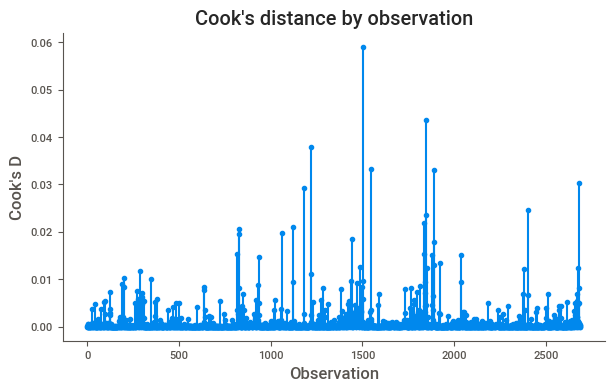

In [199]:
infl = ols_classic.get_influence()
cooks = infl.cooks_distance[0]
plt.figure(figsize=(7,4))
plt.stem(range(len(cooks)), cooks, basefmt=" ")
plt.title("Cook's distance by observation"); plt.xlabel("Observation"); plt.ylabel("Cook's D")
plt.show()

## Look at coefficient importance
Sort by magnitude (absolute value):

In [200]:
coef_df = pd.DataFrame({
    "feature": ["Intercept"] + list(X_scaled.columns),
    "coef": final_model.params.values
}).assign(abs_coef=lambda d: d["coef"].abs()).sort_values("abs_coef", ascending=False)

display(coef_df.head(20))

,feature,coef,abs_coef
0,Intercept,755.502763,755.502763
3,Accommodation type: In a purpose-built block o...,176.507151,176.507151
2,"Accommodation type: In a commercial building, ...",154.295111,154.295111
1,Accommodation type: Detached (per 10k - 2021),-121.399878,121.399878
4,Accommodation type: Part of a converted or sha...,61.926930,61.926930
5,Accommodation type: Part of another converted ...,-39.103887,39.103887
6,Accommodation type: Semi-detached (per 10k - 2...,-31.184061,31.184061
7,Accommodation type: Terraced (per 10k - 2021),30.372871,30.372871
8,Under 16 (2021),2.396857,2.396857


## Sanity check residuals
Residuals vs Fitted, Residual Distribution, Quantile–Quantile Plot

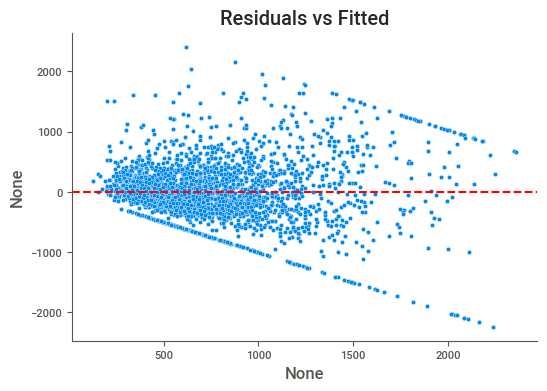

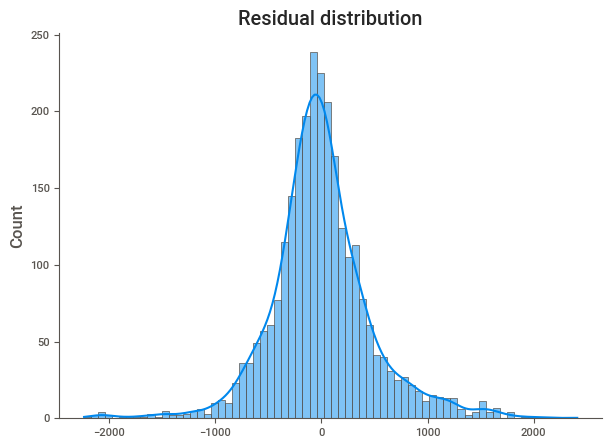

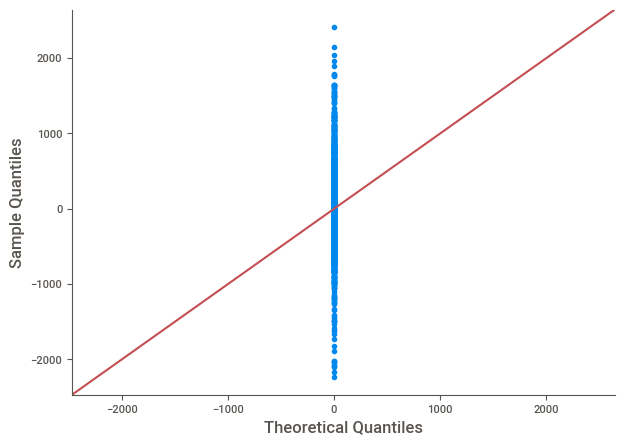

In [201]:
resid = final_model.resid
fitted = final_model.fittedvalues

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=resid, s=10)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted")
plt.show()

sns.histplot(resid, kde=True)
plt.title("Residual distribution")
plt.show()

sm.qqplot(resid, line='45')
plt.show()

The LinAlgError: Singular matrix in ML_Lag means design matrix X is not full‑rank. In practice this is caused by one or more of:

a constant or duplicate column
perfectly (or near‑perfectly) collinear features (e.g., category sets that sum to a total)
more features than effective observations after filtering

In [202]:
# # Reuse pruned FEATURE_COLS from step 1
# TARGET_COL = "crime_rate_2021_per_10k"

# # Align data to weights id order
# order = list(w.id_order)
# mod_sub = mod.set_index(mod[ID_COL].astype(str).str.strip()).reindex(order)

# # Drop rows where target or any feature is missing
# cols_needed = [TARGET_COL] + FEATURE_COLS
# valid_mask = ~mod_sub[cols_needed].isna().any(axis=1)
# mod_sub = mod_sub.loc[valid_mask]

# # Subset weights to valid ids (manual subset function already have)
# w = subset_weights_manual(w, mod_sub.index.tolist())

# # Final rank check before fitting
# print("Final X shape:", mod_sub[FEATURE_COLS].shape,
#       "rank:", np.linalg.matrix_rank(mod_sub[FEATURE_COLS].astype(float).values))

# y = mod_sub[TARGET_COL].astype(float).values.reshape(-1, 1)
# X = mod_sub[FEATURE_COLS].astype(float).values


In [203]:
# #    Use consolidated table (you set earlier):
# mod = df_census_with_crime_rates.copy()

# # Target and predictors
# TARGET_COL   = "crime_rate_2021_per_10k"     # <-- or another year’s rate
# FEATURE_COLS = feature_cols                   # <-- from earlier feature selection


# Spatial dependence (SAR) to test spillover hypothesis
Requirement: an LSOA spatial weights matrix W (adjacency).
Data: ONS LSOA 2021 boundaries (GeoJSON/Shapefile).
Method: queen contiguity or k-nearest neighbours.

Notes and guidance


Weights: Queen contiguity captures polygon adjacency; KNN fallback ensures that “islands” (LSOAs with no neighbours) still get neighbours (k=6 is typical; adjust if needed).


Alignment: SAR requires y, X, and W to be in identical observation order. The code reindexes mod to w.id_order and sub‑selects W to match dropped rows.


Target: I used crime_rate_2021_per_10k. Can swap in another year’s rate or a count with an offset (for Poisson/NB).


Features: FEATURE_COLS should be numeric predictors (e.g., per‑10k socio‑economic indicators). Exclude identifiers and target columns.


Diagnostics:

LM tests (spat_diag=True) are printed in the PySAL summary.
Moran’s I of residuals checks remaining spatial autocorrelation. If still significant, consider SEM (spatial error), SAC (lag+error), or different features.



Model comparison: Use AIC/BIC and residual Moran’s I to compare OLS vs SAR. For predictive comparison, OOS CV for SAR is non‑trivial because predictions depend on neighbours; if needed, we can implement blocked spatial CV that refits SAR per fold and evaluates in‑fold fit or uses a reduced WWW on the held‑out graph.

## Spatial Analysis

In [204]:
# Pre GDF setup
mod_modelling = df_census_with_crime_rates.copy()  # ensure 'mod' exists before filtering boundaries

BOUNDARY_PATH = r"C:\Users\cxputte\Crime\Source\LSOA_2021_Boundaries\england_lsoa_2021.shp"
CODE_FIELD    = "lsoa21cd"  # check this matches the shapefile's field name exactly

gdf = gpd.read_file(BOUNDARY_PATH)
gdf[CODE_FIELD] = gdf[CODE_FIELD].astype(str).str.strip()

print("Boundary columns:", gdf.columns.tolist())
print("Boundary CRS:", gdf.crs)
print(gdf.head(2))


Boundary columns: ['label', 'lsoa21cd', 'lsoa21nm', 'name', 'geometry']
Boundary CRS: EPSG:27700
                                           label   lsoa21cd        lsoa21nm  \
0  E92000001E12000003E08000036E02002465E01011905  E01011905  Wakefield 028C   
1  E92000001E12000008E07000178E02007116E01035743  E01035743     Oxford 019C   

             name                                           geometry  
0  Wakefield 028C  POLYGON ((431757.944 419643.827, 431759.407 41...  
1     Oxford 019C  POLYGON ((453387.909 205065.742, 453391.704 20...  


In [205]:
#Filter boundaries to modelling IDs and set CRS
ID_COL = "geography code" if "geography code" in mod_modelling.columns else "LSOA code"
needed_ids = mod_modelling[ID_COL].astype(str).str.strip().unique()

gdf = gdf[gdf[CODE_FIELD].isin(needed_ids)].copy()
try:
    gdf = gdf.to_crs(4326)                  # WGS84 system used
except Exception:
    pass

# ids in boundary order (used later to align data)
ids = gdf[CODE_FIELD].astype(str).str.strip().tolist()
print("Shapefile loaded. Number of LSOAs after filtering:", len(gdf))


Shapefile loaded. Number of LSOAs after filtering: 2689


In [206]:
#    Use consolidated table
mod_spatial = df_census_with_crime_rates.copy()

# Target and predictors
TARGET_COL   = "crime_rate_2021_per_10k"     # <-- or another year’s rate
FEATURE_COLS = feature_cols                   # <-- from earlier feature selection


In [207]:

# def build_weights_for_ids(gdf, code_field, ids, k_fallback=6):
#     """
#     Rebuild Queen weights for the given id list (order preserved).
#     Adds KNN fallback for islands, then row-standardises.
#     """
#     # subset gdf to requested ids, preserving order
#     sub = gdf.set_index(code_field).loc[ids].reset_index()
#     wq = Queen.from_dataframe(sub, ids=ids)
#     islands = [k for k, v in wq.cardinalities.items() if v == 0]
#     if islands:
#         wkn = KNN.from_dataframe(sub, k=k_fallback, ids=ids)
#         # manual union (see Fix B) or use the union function below
#         w = union_weights(wq, wkn)
#     else:
#         w = wq
#     w.transform = "r"
#     return w


In [208]:
# Keep only LSOAs present in modelling table to speed-up
ids_needed = set(mod_spatial[ID_COL].astype(str).str.strip().unique())
gdf = gdf[gdf[CODE_FIELD].astype(str).str.strip().isin(ids_needed)].copy()
gdf = gdf.to_crs(4326) if gdf.crs is not None else gdf  # WSG84

# Build queen + knn
wq  = weights.Queen.from_dataframe(gdf, ids=ids)
wkn = weights.KNN.from_dataframe(gdf, k=6, ids=ids)

def union_weights(w1: weights.W, w2: weights.W) -> weights.W:
    if list(w1.id_order) != list(w2.id_order):
        # align w2 to w1 order
        w2 = weights.W({i: w2.neighbors.get(i, []) for i in w1.id_order}, id_order=w1.id_order)
    id_order = list(w1.id_order)
    neigh = {i: sorted(set(w1.neighbors.get(i, [])) | set(w2.neighbors.get(i, []))) for i in id_order}
    return weights.W(neigh, id_order=id_order)

islands = [k for k, v in wq.cardinalities.items() if v == 0]
w = union_weights(wq, wkn) if islands else wq
w.transform = "r"

# Verify weights cardinalities after union:
deg = pd.Series(w.cardinalities)
assert (deg > 0).all(), "Islands remain after KNN fallback"

# Start with candidate features
X_df = mod_spatial[FEATURE_COLS].astype(float)

# Drop constants and duplicates
const_cols = [c for c in X_df.columns if X_df[c].nunique(dropna=True) <= 1]
dup_mask   = X_df.round(12).T.duplicated()
dup_cols   = X_df.columns[dup_mask].tolist()

# Drop accommodation total and one small subcategory
accom_cols = [c for c in X_df.columns if "Accommodation type:" in c and "(per 10k - 2021)" in c]
drop_cols  = [c for c in accom_cols if "Total: All households" in c]
for candidate in [
    "A caravan or other mobile or temporary structure",
    "In a commercial building",
    "Part of another converted building",
]:
    match = [c for c in accom_cols if candidate in c]
    if match:
        drop_cols += match[:1]
        break

# Qualification safety: drop any 'Total:' rate variable if present
qual_cols = [c for c in X_df.columns if "Highest level of qualification:" in c and "(per 10k - 2021)" in c]
drop_cols += [c for c in qual_cols if ": Total:" in c]

# Add constants and duplicates to drop list
drop_cols += const_cols + dup_cols
drop_cols  = sorted(set(drop_cols))
FEATURE_COLS = [c for c in FEATURE_COLS if c not in drop_cols]
X_df = X_df.drop(columns=[c for c in drop_cols if c in X_df.columns])

# Optional VIF pruning
def vif_iterative(X, thresh=10.0, max_iter=20):
    cols = list(X.columns)
    for _ in range(max_iter):
        Xn = X[cols].dropna()
        if Xn.shape[1] <= 1:
            break
        vifs = [variance_inflation_factor(Xn.values, i) for i in range(Xn.shape[1])]
        worst_idx = int(np.nanargmax(vifs))
        worst_vif = vifs[worst_idx]
        if worst_vif < thresh or not np.isfinite(worst_vif):
            break
        drop = cols[worst_idx]
        cols.remove(drop)
        print(f"Dropping by VIF: {drop} (VIF={worst_vif:.2f})")
    return cols

FEATURE_COLS = vif_iterative(X_df, thresh=10.0)
print("Kept features:", FEATURE_COLS)

# Align data to weights id order
order = list(w.id_order)
mod_sub = mod_spatial.set_index(mod_spatial[ID_COL].astype(str).str.strip()).reindex(order)

# Drop rows where target or any feature is missing
cols_needed = [TARGET_COL] + FEATURE_COLS
valid_mask = ~mod_sub[cols_needed].isna().any(axis=1)
mod_sub = mod_sub.loc[valid_mask]

# Subset weights to valid ids (manual subset)
def subset_weights_manual(w_obj: weights.W, keep_ids: list) -> weights.W:
    keep = set(keep_ids)
    id_order = list(keep_ids)
    neigh = {i: [j for j in w_obj.neighbors.get(i, []) if j in keep] for i in id_order}
    w_sub = weights.W(neigh, id_order=id_order)
    w_sub.transform = "r"
    return w_sub

order = list(w.id_order)
mod_sub = mod_spatial.set_index(mod_spatial[ID_COL].astype(str).str.strip()).reindex(order)
valid_mask = ~mod_sub[[TARGET_COL] + FEATURE_COLS].isna().any(axis=1)
mod_sub = mod_sub.loc[valid_mask]
w = subset_weights_manual(w, mod_sub.index.tolist())

# Confirm alignment before fitting:
assert list(mod_sub.index) == list(w.id_order)

# Build y and X matrices
# Ensure X is full rank at this point
print("Final X shape:", mod_sub[FEATURE_COLS].shape,
      "rank:", np.linalg.matrix_rank(mod_sub[FEATURE_COLS].astype(float).values))

y = mod_sub[TARGET_COL].astype(float).values.reshape(-1, 1)
X = mod_sub[FEATURE_COLS].astype(float).values  # no constant; ML_Lag adds it when constant=True

# OLS baseline
ols = sm.OLS(y, sm.add_constant(X)).fit()
print("\n=== OLS baseline ===")
print(ols.summary())

# SAR lag
sar = ML_Lag(y, X, w,
             name_y=TARGET_COL,
             name_x=FEATURE_COLS,
             spat_diag=True,
             name_w="W_QueenKNN",
             constant=True)
print("\n=== SAR (ML_Lag) summary ===")
print(sar.summary)

print("\n=== SAR (ML_Lag) summary ===")
# The PySAL models expose a text summary via `summary` or `summary` property
try:
    print(sar.summary)
except Exception:
    # Fallback: print key pieces
    betas = np.asarray(sar.betas).ravel()
    names = ["Intercept"] + FEATURE_COLS
    print("Coefficients:")
    for n, b in zip(names, betas):
        print(f"{n:30s} {b: .6f}")
    print(f"AIC: {getattr(sar, 'aic', np.nan)}   BIC: {getattr(sar, 'schwarz', np.nan)}   pseudo-R2: {getattr(sar, 'pr2', np.nan)}")

#  Residual diagnostics: Moran's I on SAR residuals 
# Common residual attribute names in spreg: `u` (residuals), `resid`, or y - predy
resid = getattr(sar, "u", None)
if resid is None:
    resid = getattr(sar, "resid", None)
if resid is None:
    predy = getattr(sar, "predy", None)
    resid = (y.ravel() - predy.ravel()) if predy is not None else (y.ravel() - ols.fittedvalues.ravel())

mi = Moran(resid, w)
print("\n=== Residual spatial autocorrelation (Moran's I) ===")
print(f"I = {mi.I: .5f},  p_norm = {mi.p_norm: .5f}")
if mi.p_norm < 0.05:
    print("Residuals still show significant spatial autocorrelation (p<0.05). Consider alternative specs (e.g., SEM, SAC) or different features.")
else:
    print("No significant residual spatial autocorrelation detected at 5% level.")

#  Model comparison quick view 
def safe(val, default=np.nan):
    try:
        return float(val)
    except Exception:
        return default

sar_aic = safe(getattr(sar, "aic", np.nan))
sar_bic = safe(getattr(sar, "schwarz", np.nan))
sar_pr2 = safe(getattr(sar, "pr2", np.nan))

print("\n=== Model comparison (in-sample) ===")
print(f"OLS:  AIC={ols.aic:.2f},  BIC={ols.bic:.2f},  R²={ols.rsquared:.3f}")
print(f"SAR:  AIC={sar_aic:.2f},  BIC={sar_bic:.2f},  pseudo-R²={sar_pr2:.3f}")


sem = ML_Error(y, X, w, name_y=TARGET_COL, name_x=FEATURE_COLS, spat_diag=True, constant=True)
print("\n=== SEM (ML_Error) summary ===")
print(sem.summary)

#  Coefficient table 
try:
    betas = np.asarray(sar.betas).ravel()
    names = ["Intercept"] + FEATURE_COLS
    coef_df = pd.DataFrame({"feature": names, "coef": betas})
    display(coef_df.sort_values("coef", key=np.abs, ascending=False).head(20))
except Exception:
    pass

output_path_features_used = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_features_used.csv"
pd.Series(FEATURE_COLS, name="feature").to_csv(output_path_features_used, index=False)
print(f"Saved: {output_path_features_used}")
# pd.Series(FEATURE_COLS, name="feature").to_csv(outpath("features_used.csv"), index=False)

output_path_coef_df = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_coef_df.csv"
coef_df.to_csv(output_path_coef_df, index=False)
print(f"Saved: {output_path_coef_df}")
# coef_df.to_csv(outpath("ols_coefficients.csv"), index=False)



Dropping by VIF: Population 2019 (VIF=5248.20)
Dropping by VIF: Population 2017 (VIF=3745.79)
Dropping by VIF: Population 2021 (VIF=3156.89)
Dropping by VIF: Population 2018 (VIF=1860.78)
Dropping by VIF: Population 2020 (VIF=717.46)
Dropping by VIF: Population 2015 (VIF=123.43)
Dropping by VIF: Highest level of qualification: Level 2 qualifications (per 10k - 2021) (VIF=75.39)
Dropping by VIF: Highest level of qualification: Level 4 qualifications and above (per 10k - 2021) (VIF=54.08)
Dropping by VIF: Highest level of qualification: Level 1 and entry level qualifications (per 10k - 2021) (VIF=42.26)
Dropping by VIF: Population 2016 (VIF=38.44)
Dropping by VIF: Highest level of qualification: Apprenticeship (per 10k - 2021) (VIF=20.47)
Dropping by VIF: Highest level of qualification: Level 3 qualifications (per 10k - 2021) (VIF=16.75)
Dropping by VIF: Highest level of qualification: No qualifications (per 10k - 2021) (VIF=14.48)
Dropping by VIF: Highest level of qualification: Other q

Saved: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_202959_mod_sub_all.csv


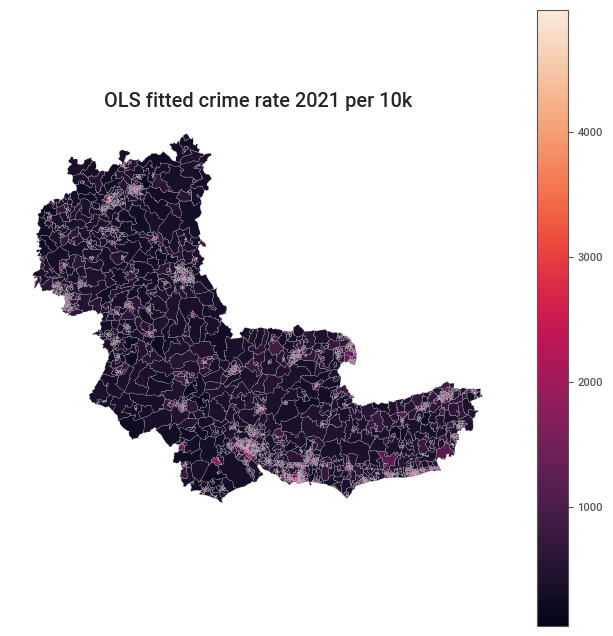

Saved: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_203002_lsoa_subset.geojson
Saved: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_203008_model_table_aligned.csv
Saved: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_203008_mod_sub.csv


In [209]:
# alignment (safe against duplicate ID column)
ID_COL = "geography code" if "geography code" in mod_spatial.columns else "LSOA code"
order = list(w.id_order)

mod_sub = (
    mod_spatial.copy()
    .assign(**{ID_COL: mod_spatial[ID_COL].astype(str).str.strip()})
    .set_index(ID_COL)
    .reindex(order)
)

output_path_mod_sub_all = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_mod_sub_all.csv"
# mod_sub.to_csv(output_path_mod_sub_all, index=False)
mod_sub.reset_index(names=CODE_FIELD).to_csv(output_path_mod_sub_all, index=False)
print(f"Saved: {output_path_mod_sub_all}")

# if the ID remains as a column, drop it to avoid duplicates
if ID_COL in mod_sub.columns:
    mod_sub = mod_sub.drop(columns=[ID_COL])

# Ensure the GeoDataFrame index carries the correct name
gdf_mod = gdf.set_index(CODE_FIELD).loc[mod_sub.index].copy()
gdf_mod.index.name = CODE_FIELD  
# Attach measures
gdf_mod["crime_rate_2021_per_10k"] = mod_sub["crime_rate_2021_per_10k"].values
gdf_mod["fitted_ols"] = ols.fittedvalues
gdf_mod["resid_ols"]  = ols.resid

# Visual
ax = gdf_mod.plot(column="fitted_ols", legend=True, figsize=(8,8), linewidth=0.1, edgecolor="#f0f0f0")   # very light grey

ax.set_axis_off()
plt.title("OLS fitted crime rate 2021 per 10k"); plt.show()

# Export .geojson
lsoa_subset_filename = f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_lsoa_subset.geojson"
output_path_lsoa_subset = OUTPUTS_PATH / lsoa_subset_filename
gdf_mod.to_file(output_path_lsoa_subset, driver="GeoJSON")
print(f"Saved: {output_path_lsoa_subset}")

# # Export .shp
# lsoa_subset_filename_s = f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_lsoasub.shp"
# output_path_lsoa_subset_s = OUTPUTS_PATH / lsoa_subset_filename_s
# gdf_mod.to_file(output_path_lsoa_subset_s, driver="ESRI Shapefile")
# print(f"Saved: {output_path_lsoa_subset_s}")

# # model table aligned (index -> column named CODE_FIELD)
# output_path_model_table_aligned = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_model_table_aligned.csv"

# gdf_mod.reset_index()[[CODE_FIELD, "crime_rate_2021_per_10k", "fitted_ols", "resid_ols"]].to_csv(
#     output_path_model_table_aligned, index=False
# )

# print(f"Saved: {output_path_model_table_aligned}")

 # Robust column selection after reset_index
cols_needed = [CODE_FIELD, "crime_rate_2021_per_10k", "fitted_ols", "resid_ols"]
df_out = gdf_mod.reset_index()

# If for any reason the index column comes out as 'index', rename it to CODE_FIELD
if CODE_FIELD not in df_out.columns and "index" in df_out.columns:
    df_out = df_out.rename(columns={"index": CODE_FIELD})

missing = [c for c in cols_needed if c not in df_out.columns]
if missing:
    raise KeyError(f"Missing columns in export: {missing}")

output_path_model_table_aligned = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_model_table_aligned.csv"
df_out[cols_needed].to_csv(output_path_model_table_aligned, index=False)
print(f"Saved: {output_path_model_table_aligned}")

output_path_mod_sub = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_mod_sub.csv"
mod_sub.to_csv(output_path_mod_sub, index=False)
print(f"Saved: {output_path_mod_sub}")

In [210]:
mod_sub.head()

,date,geography,Population 2015,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020,Population 2021,Population 2022,...,crime_count_2018,crime_rate_2018_per_10k,crime_count_2019,crime_rate_2019_per_10k,crime_count_2020,crime_rate_2020_per_10k,crime_count_2021,crime_rate_2021_per_10k,crime_count_2022,crime_rate_2022_per_10k
geography code,,,,,,,,,,,,,,,,,,,,,
E01031931,2021,Wiltshire 018A,2140,1699,1669,1679,1702,1807,1943,2140,...,124,738.53,135,793.18,120,664.08,128,658.78,142,663.55
E01035233,2021,South Gloucestershire 036C,2388,1133,1205,1334,1531,1725,1825,2388,...,0,0.0,0,0.0,0,0.0,0,0.0,2,8.38
E01022878,2021,Hart 004B,1675,1723,1696,1695,1667,1677,1682,1675,...,38,224.19,37,221.96,43,256.41,45,267.54,27,161.19
E01022185,2021,Cotswold 001E,1986,1436,1653,1768,1890,1936,1991,1986,...,67,378.96,51,269.84,110,568.18,91,457.06,74,372.61
E01032032,2021,Wiltshire 049B,1569,1571,1526,1513,1529,1528,1527,1569,...,50,330.47,45,294.31,39,255.24,41,268.5,53,337.79


In [211]:
# gdf_mod = gdf.set_index(CODE_FIELD).loc[mod_sub.index]
# gdf_mod["fitted_ols"] = ols.fittedvalues
# gdf_mod["resid_ols"]  = ols.resid
# ax = gdf_mod.plot(column="fitted_ols", cmap="viridis", legend=True, figsize=(8,8))
# ax.set_axis_off()
# plt.title("OLS fitted crime rate 2021 per 10k"); plt.show()

# output_path_lsoa_subset = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_lsoa_subset.geojson"
# gdf_mod.to_file(output_path_lsoa_subset, driver="GeoJSON")
# print(f"Saved: {output_path_lsoa_subset}")

# output_path_model_table_aligned = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_model_table_aligned.csv"
# gdf_mod.reset_index()[[CODE_FIELD, "crime_rate_2021_per_10k", "fitted_ols", "resid_ols"]].to_csv(output_path_model_table_aligned, index=False)
# # mod_sub.reset_index().to_csv(output_path_model_table_aligned, index=False)
# print(f"Saved: {output_path_model_table_aligned}")

In [212]:
# Export Diagnostic results from spatial models, including Moran’s I values and LM tests

output_path_spatial_metrics = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_spatial_metrics.csv"
pd.DataFrame(
    {"stat": ["moran_I", "moran_p_norm", "ols_aic", "ols_bic", "ols_r2",
              "sar_aic", "sar_bic", "sar_pseudo_r2"],
     "value": [mi.I, mi.p_norm, ols.aic, ols.bic, ols.rsquared,
               getattr(sar, "aic", np.nan), getattr(sar, "schwarz", np.nan), getattr(sar, "pr2", np.nan)]}
).to_csv(output_path_spatial_metrics, index=False)
print(f"Saved: {output_path_spatial_metrics}")

Saved: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_203008_spatial_metrics.csv


## Spatial diagnostics visuals
Moran scatter of OLS residuals to complement numeric Moran’s I.
Choropleth of residuals quantiles for spatial patterns.

In [213]:
# res = ols_classic.resid.values
# mi = Moran(res, w)
# fig, _ = moran_scatterplot(mi)
# plt.show()

# gdf_mod["resid_q"] = pd.qcut(gdf_mod["resid_ols"], 5, labels=False, duplicates="drop")
# ax = gdf_mod.plot(column="resid_q", legend=True, figsize=(8,8))
# ax.set_axis_off(); plt.title("OLS residuals - quintiles"); plt.show()


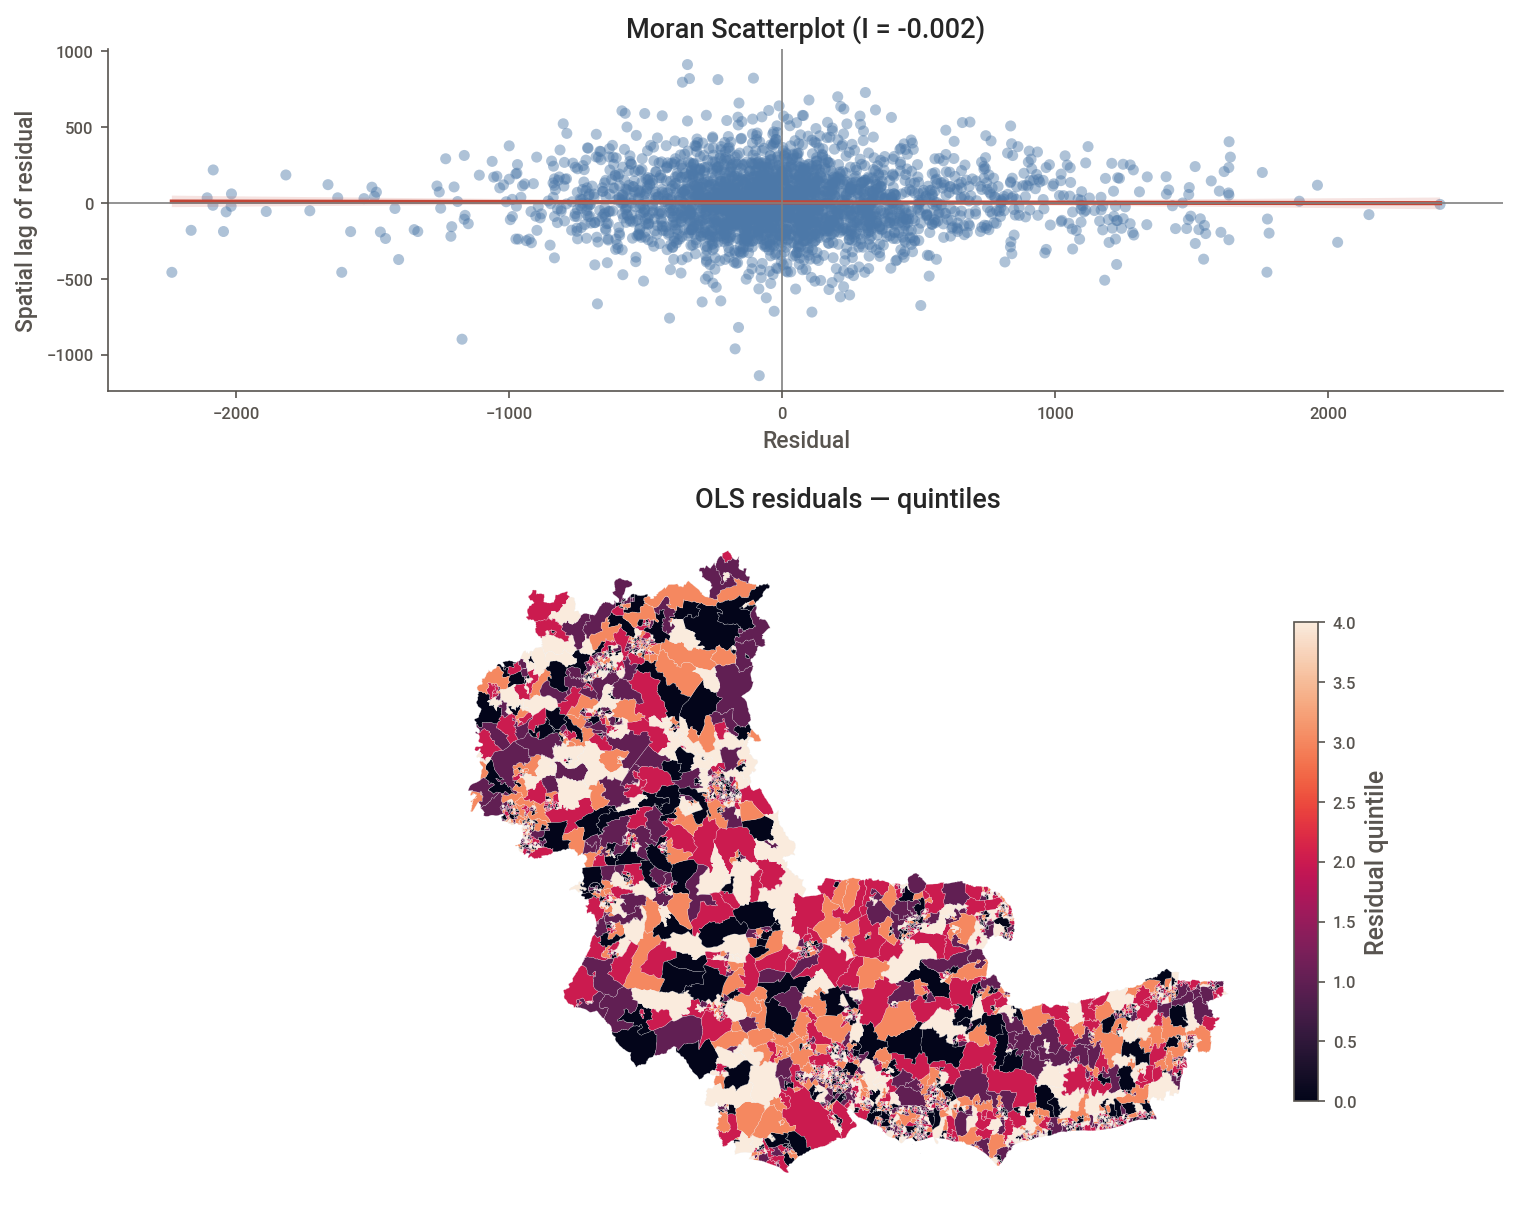

In [214]:
res = ols_classic.resid.values
mi = Moran(res, w)

res_lag = weights.lag_spatial(w, res)

# Layout
fig = plt.figure(figsize=(12, 10), dpi=150)
gs = fig.add_gridspec(2, 1, height_ratios=[1, 2], hspace=0.25)

# PANEL 1
ax1 = fig.add_subplot(gs[0])

sns.regplot(
    x=res,
    y=res_lag,
    scatter_kws=dict(alpha=0.45, s=28, color="#4c78a8", edgecolor="none"),
    line_kws=dict(color="#c44536", linewidth=2),
    ax=ax1
)

ax1.axhline(0, color="grey", linewidth=0.8)
ax1.axvline(0, color="grey", linewidth=0.8)
ax1.set_title(f"Moran Scatterplot (I = {mi.I:.3f})", fontsize=13)
ax1.set_xlabel("Residual", fontsize=11)
ax1.set_ylabel("Spatial lag of residual", fontsize=11)

# PANEL 2 — residual map
gdf_mod["resid_q"] = pd.qcut(res, 5, labels=False, duplicates="drop")
ax2 = fig.add_subplot(gs[1])

gdf_mod.plot(
    column="resid_q",
    linewidth=0.1,
    edgecolor="#f0f0f0",
    legend=True,
    legend_kwds=dict(
        label="Residual quintile",
        orientation="vertical",
        shrink=0.7,
        pad=0.02
    ),
    ax=ax2
)

ax2.set_axis_off()
ax2.set_title("OLS residuals — quintiles", fontsize=13)

plt.show()


## Predicted vs observed with calibration band

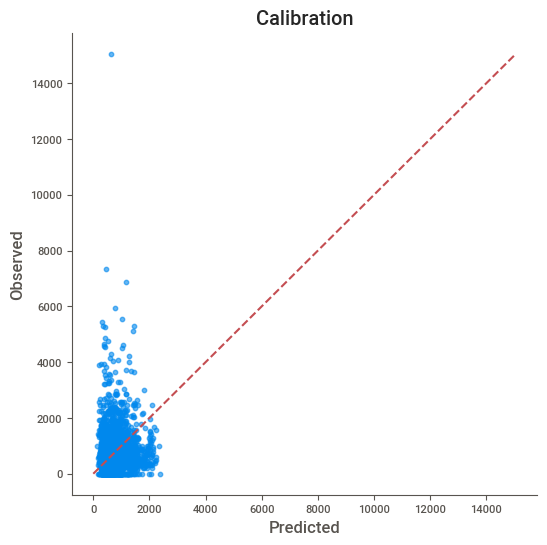

In [215]:

plt.figure(figsize=(6,6))
plt.scatter(ols_hc3.fittedvalues, y, s=10, alpha=0.6)
lims = [min(y.min(), ols_hc3.fittedvalues.min()), max(y.max(), ols_hc3.fittedvalues.max())]
plt.plot(lims, lims, "r--"); plt.xlabel("Predicted"); plt.ylabel("Observed"); plt.title("Calibration"); plt.show()


## Regularised linear baseline
Helps with multicollinearity and yields a sparse, readable model.

Accommodation type: Detached (per 10k - 2021)                                                                              -0.000000
Accommodation type: In a purpose-built block of flats or tenement (per 10k - 2021)                                          0.000000
Accommodation type: Part of a converted or shared house, including bedsits (per 10k - 2021)                                 0.000000
Accommodation type: Semi-detached (per 10k - 2021)                                                                          0.000000
Under 16 (2021)                                                                                                             0.000000
Accommodation type: Terraced (per 10k - 2021)                                                                              -0.000000
Accommodation type: Part of another converted building, for example, former school, church or warehouse (per 10k - 2021)    0.037425
Accommodation type: In a commercial building, for example, in an offi

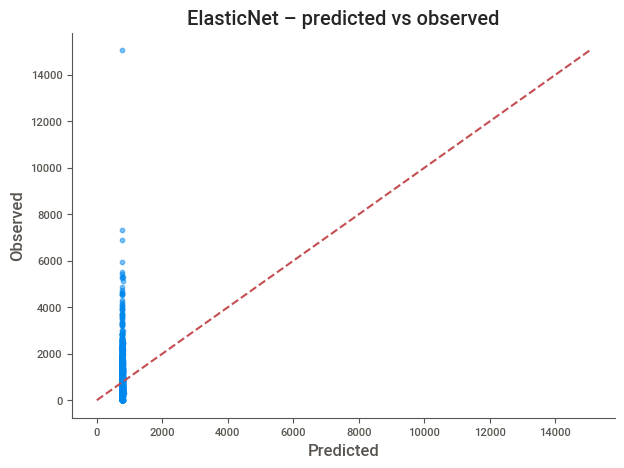

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.534
Date:                Tue, 13 Jan 2026   Prob (F-statistic):              0.216
Time:                        20:30:10   Log-Likelihood:                -21664.
No. Observations:                2689   AIC:                         4.333e+04
Df Residuals:                    2686   BIC:                         4.335e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                                                                                                                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------

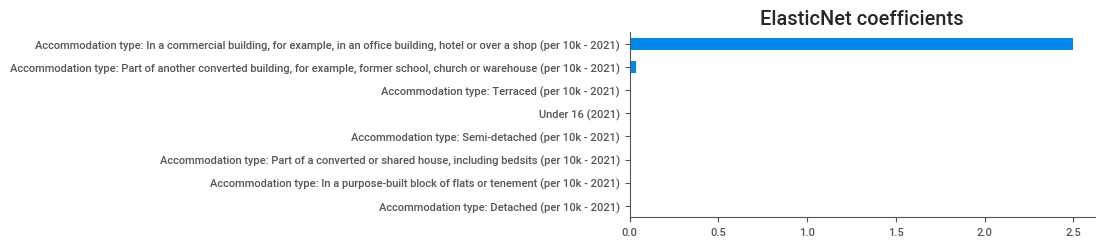

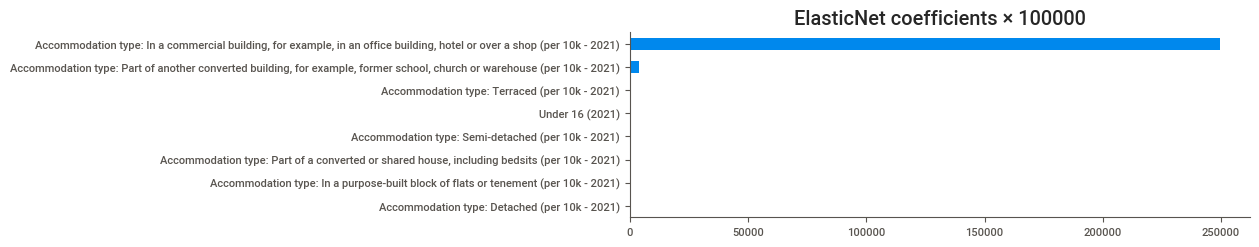

Saved: C:\Users\cxputte\Crime\20260113_193303_Outputs\20260113_203012_elasticnet_selected_features.csv


In [216]:
enet = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  ElasticNetCV(l1_ratio=[0.1,0.5,0.9], cv=5, random_state=42))
])

enet.fit(mod_spatial[FEATURE_COLS].astype(float), y.ravel())
coef_en = pd.Series(enet.named_steps["model"].coef_, index=FEATURE_COLS).sort_values()
selected = coef_en[coef_en != 0].index.tolist()

coef_sorted = coef_en.sort_values()
print(coef_sorted)

selected = coef_en[coef_en != 0].index.tolist()
print(selected)

y_pred = enet.predict(mod_spatial[FEATURE_COLS].astype(float))
resid = y - y_pred

rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
print('RMSE: ', rmse, 'MAE: ', mae)


plt.scatter(y_pred, y, s=10, alpha=0.5)
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.title("ElasticNet – predicted vs observed")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.show()

FEATURE_EN = selected   # ElasticNet-selected predictors

#OLS with HC3 robust SE
X_en = sm.add_constant(mod_spatial[FEATURE_EN].astype(float))
ols_en = sm.OLS(y, X_en).fit(cov_type="HC3")
print(ols_en.summary())

#SAR with reduced features

# ensure ndarray with correct shape
y_sar = np.asarray(y, dtype=float).reshape(-1, 1)


# predictors matrix

# use sparse LU for stable logdet; optionally tune epsilon
X_sar = mod_spatial[FEATURE_EN].astype(float).values
sar_en = ML_Lag(y_sar, X_sar, w,
                method="LU",            
                epsilon=1e-6,           # optional: solver tolerance
                name_y="crime_rate_2021_per_10k",
                name_x=FEATURE_EN,
                constant=True)

# X_sar = mod_spatial[FEATURE_EN].astype(float).values

# sar_en = ML_Lag(y_sar, X_sar, w, name_y="crime_rate_2021_per_10k", name_x=FEATURE_EN, constant=True)

# X_sar = mod_spatial[FEATURE_EN].astype(float).values
# sar_en = ML_Lag(y.values.reshape(-1,1), X_sar, w,
#                 name_y="crime_rate_2021", name_x=FEATURE_EN,
#                 constant=True)
print(sar_en.summary)

#simple coefficient plot
coef_sorted.plot(kind="barh", figsize=(6,0.3*len(coef_sorted)))
plt.title("ElasticNet coefficients")
plt.show()

(coef_en * 100000).plot(kind="barh", figsize=(8, 0.3*len(coef_en)))
plt.title("ElasticNet coefficients × 100000")
plt.show()


output_path_elasticnet_sf = OUTPUTS_PATH / f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_elasticnet_selected_features.csv"
pd.Series(selected).to_csv(output_path_elasticnet_sf, index=False)
print(f"Saved: {output_path_elasticnet_sf}")


## Panel formulation across years
Exploit all years by stacking counts and using an offset.

In [217]:
rate_cols  = [c for c in mod_spatial.columns if c.startswith("crime_rate_") and c.endswith("_per_10k")]
count_cols = [c for c in mod_spatial.columns if c.startswith("crime_count_")]
pop_cols   = [c for c in mod_spatial.columns if c.startswith("Population ")]

long = []
for yr in sorted(int(c.split("_")[2]) for c in rate_cols):
    tmp = mod_spatial[["geography code"] + FEATURE_COLS + [f"crime_count_{yr}", f"Population {yr}"]].copy()
    tmp["year"] = yr
    long.append(tmp.rename(columns={f"crime_count_{yr}":"count", f"Population {yr}":"pop"}))
panel = pd.concat(long, axis=0, ignore_index=True).dropna()

X_nb = sm.add_constant(panel[FEATURE_COLS].astype(float))
y_nb = panel["count"].astype(float)
offset = np.log(panel["pop"].clip(lower=1))
nb_panel = sm.GLM(y_nb, X_nb, family=sm.families.NegativeBinomial(alpha=1.0), offset=offset).fit()
print(nb_panel.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                21512
Model:                            GLM   Df Residuals:                    21503
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2217e+05
Date:                Tue, 13 Jan 2026   Deviance:                       20979.
Time:                        20:30:12   Pearson chi2:                 1.03e+04
No. Iterations:                    13   Pseudo R-squ. (CS):             0.2277
Covariance Type:            nonrobust                                         
                                                                                                                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [218]:
# Open Power BI Desktop
# Go to Options → Preview Features
# Turn on Shape Map Visual.
# Restart Power BI.
# Add the Shape Map visual.
# Import the TopoJSON (lsoa_2021_subset.topojson).
# _lsoa_subset.geojson
# Add CSV:
# _model_table_aligned.csv
# lsoa21cd, crime_rate_2021_per_10k, fitted_ols, resid_ols


# Create a relationship:

# TopoJSON field: lsoa21cd
# CSV field: lsoa21cd


# Use crime_rate_2021_per_10k or fitted_ols as Colour.

Important notes


Prediction on a held-out graph uses only within‑fold neighbours. If there are cross‑border links between train and test areas in the full graph, they are intentionally excluded here to avoid leakage. That is the standard approach for blocked spatial CV.


Grouping choice affects difficulty. Group by LAD if available to hold out whole areas. If LAD is not present, the k‑means centroids fallback creates spatially coherent folds.


Convergence. If SAR fails on some folds due to singularity, reduce features or apply regularisation in the feature selection stage (e.g., drop highly collinear indicators using VIF results).


Targets. The example uses a rate target. For crime counts, consider Poisson or NB with offsets rather than SAR lag OLS.

# Plan

In [219]:
   


# 5) Ethics, bias, and privacy

# Measurement bias: policing intensity varies by area → include proxy controls (e.g., number of officers per LAD if available) or caution in interpretation.
# Statistical parity: compare residuals or rates by LAD to ensure no systematic over/under-estimation for specific areas.
# Privacy: all data are aggregate; continue to exclude personal identifiers; retain only LSOA-level outputs.
# GDPR lawful basis: document public task / research basis; store outputs in timestamped OUTPUTS_PATH; avoid row-level joins to any sensitive sources.

# 6) Limitations and multicollinearity handling

# Imputed census variables: flag rows where imputation occurred; sensitivity analysis excluding those.
# VIF: drop or combine highly collinear features; consider PCA as an alternative (report explained variance).
# Robustness: try robust SE (HC3) in OLS:
# # ols_robust = sm.OLS(y, sm.add_constant(X)).fit(cov_type="HC3")

